# ENCUESTA DE CURSADA
## Primer Cuatrimestre de 2020
### Departamento de Computación FIUBA

Se recomienda ejecutar este notebook con [jupyterlab](https://jupyterlab.readthedocs.io/en/stable/).

Para ver mejor el árbol de contenidos se recomienda usar:

```bash
jupyter labextension install @jupyterlab/toc
```

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid');
import sys
from IPython.display import display, Markdown
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

pd.options.display.max_colwidth = -1

/home/nox/repos/encuesta_depto/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
comp = pd.read_csv('../datasets/encuesta_1C2020.csv')

# Análisis de respuestas

## Total de Encuestas Procesadas

In [3]:
comp.pipe(len)

756

## Encoding de preguntas de opción múltiple

In [4]:
map_opinion = {"Excelente": 5, "Muy Bueno": 4, "Bueno": 3, "Regular": 2, "Malo": 1}
map_sino = {"Sí": 5, "No": 0}
map_temas = {
    "Muy Interesantes": 5,
    "Interesantes": 4,
    "Poco Interesantes": 2,
    "Nada Interesantes": 1,
}
map_clases_teoricas = {
    "Excelentes": 5,
    "Muy Buenas": 4,
    "Buenas": 3,
    "Regulares": 2,
    "Malas": 1,
    "No hay clases teóricas": np.nan,
    "No hay clase teóricas": np.nan,
}
map_clases_practicas = {
    "Excelentes": 5,
    "Muy Buenas": 4,
    "Buenas": 3,
    "Regulares": 2,
    "Malas": 1,
    "No Hay Clases Prácticas": np.NaN,
}
map_dificultad_curso = {
    "Muy Facil": 5,
    "Facil": 4,
    "Fácil": 4,
    "Normal": 3,
    "Dificil": 2,
    "Difícil": 2,
    "Muy Dificil": 1,
    "Muy Difícil": 1,
}
map_dificultad_tp = {
    "Muy dificil": 1,
    "Muy difícil": 1,
    "Dificil": 2,
    "Difícil": 2,
    "Normal": 3,
    "Fácil": 4,
    "Muy Fácil": 5,
    "No hay TP": np.NaN,
}

comp.replace(
    {
        "Opinión General Sobre el Curso": map_opinion,
        "¿Aprobó la Cursada?": map_sino,
        "¿Cómo te Resultaron los Temas de la Materia?": map_temas,
        "¿Los Temas de la Materia Están Actualizados?": map_sino,
        "Nivel de las Clases Teóricas del Curso": map_clases_teoricas,
        "Nivel de las Clases Prácticas del Curso": map_clases_practicas,
        "Dificultad del Curso": map_dificultad_curso,
        "Dificultad del TP": map_dificultad_tp,
    },
    inplace=True,
)

cols_sino = ["¿Aprobó la Cursada?", "¿Los Temas de la Materia Están Actualizados?"]

#comp['¿Aprobó la Cursada?'] = comp['¿Aprobó la Cursada?'].astype('category')
#comp['¿Los Temas de la Materia Están Actualizados?'] = comp['¿Los Temas de la Materia Están Actualizados?'].astype('category')

In [5]:
comp['Promedio nivel teóricas y prácticas'] = (comp["Nivel de las Clases Teóricas del Curso"] + comp["Nivel de las Clases Prácticas del Curso"]) / 2

In [6]:
comp.dtypes

Marca temporal                                                                         object 
Email (opcional)                                                                       object 
Elige el curso                                                                         object 
Opinión General Sobre el Curso                                                         int64  
¿Aprobó la Cursada?                                                                    int64  
¿Cómo te Resultaron los Temas de la Materia?                                           int64  
¿Los Temas de la Materia Están Actualizados?                                           int64  
Nivel de las Clases Teóricas del Curso                                                 float64
Nivel de las Clases Prácticas del Curso                                                float64
Dificultad del Curso                                                                   int64  
Dificultad del TP                                 

## Opinión general del curso

In [7]:
def reverse_map(m):
    return {v:k for k,v in m.items()}

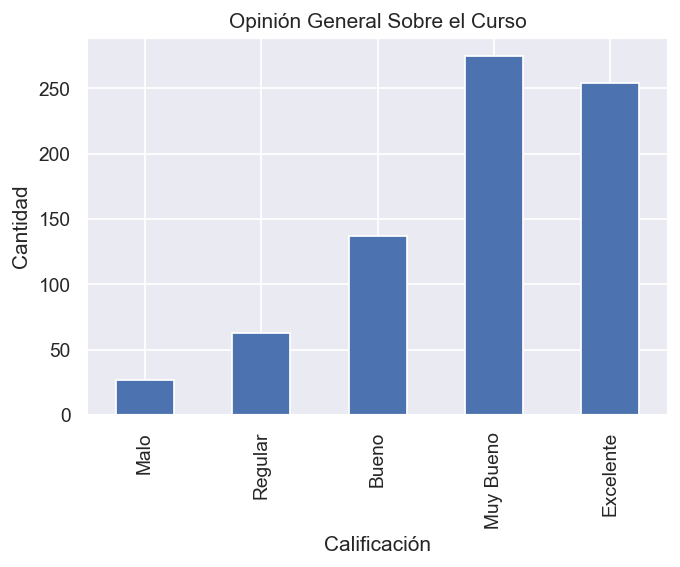

In [8]:
plt.figure(dpi=125)
plt.title('Opinión General Sobre el Curso')
ax = comp['Opinión General Sobre el Curso'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels([reverse_map(map_opinion)[int(x.get_text())] for x in ax.get_xticklabels()])
plt.xlabel("Calificación")
plt.ylabel("Cantidad")
plt.show()

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

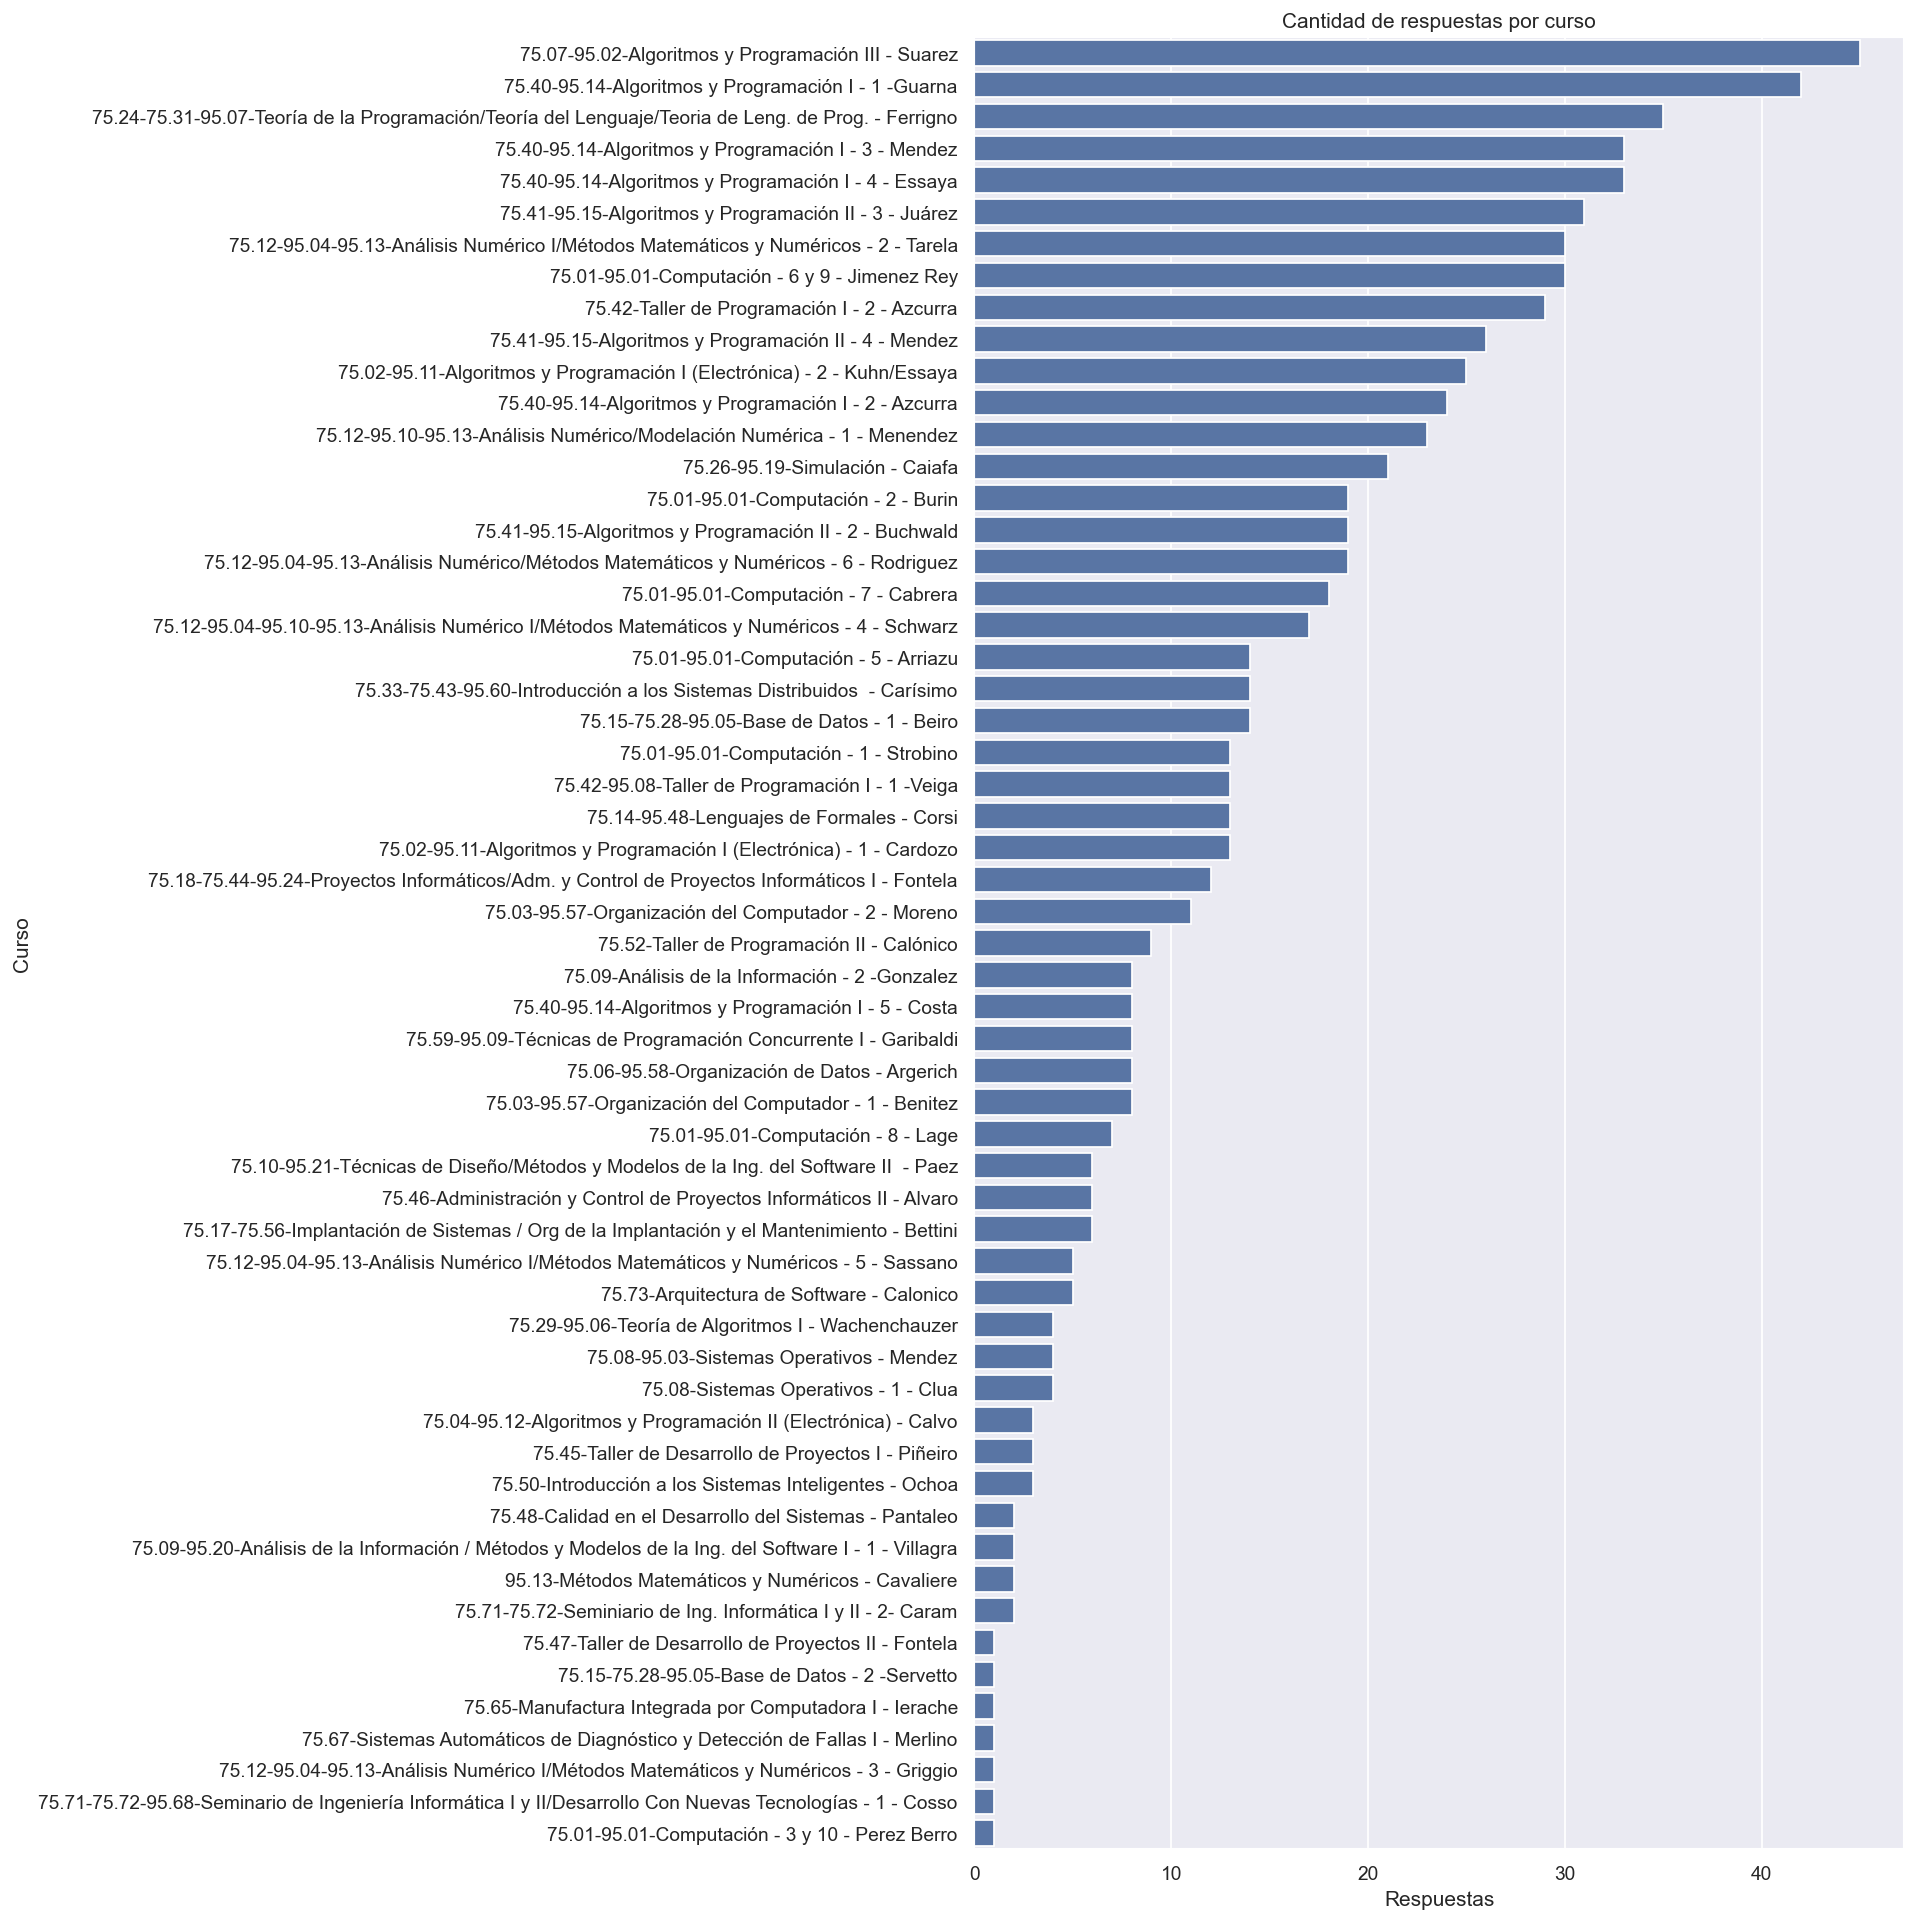

In [9]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

data = comp['Elige el curso'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=data.values, y=data.index, color='b')

plt.title("Cantidad de respuestas por curso")
plt.xlabel("Respuestas")
plt.ylabel("Curso")

plt.show()

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

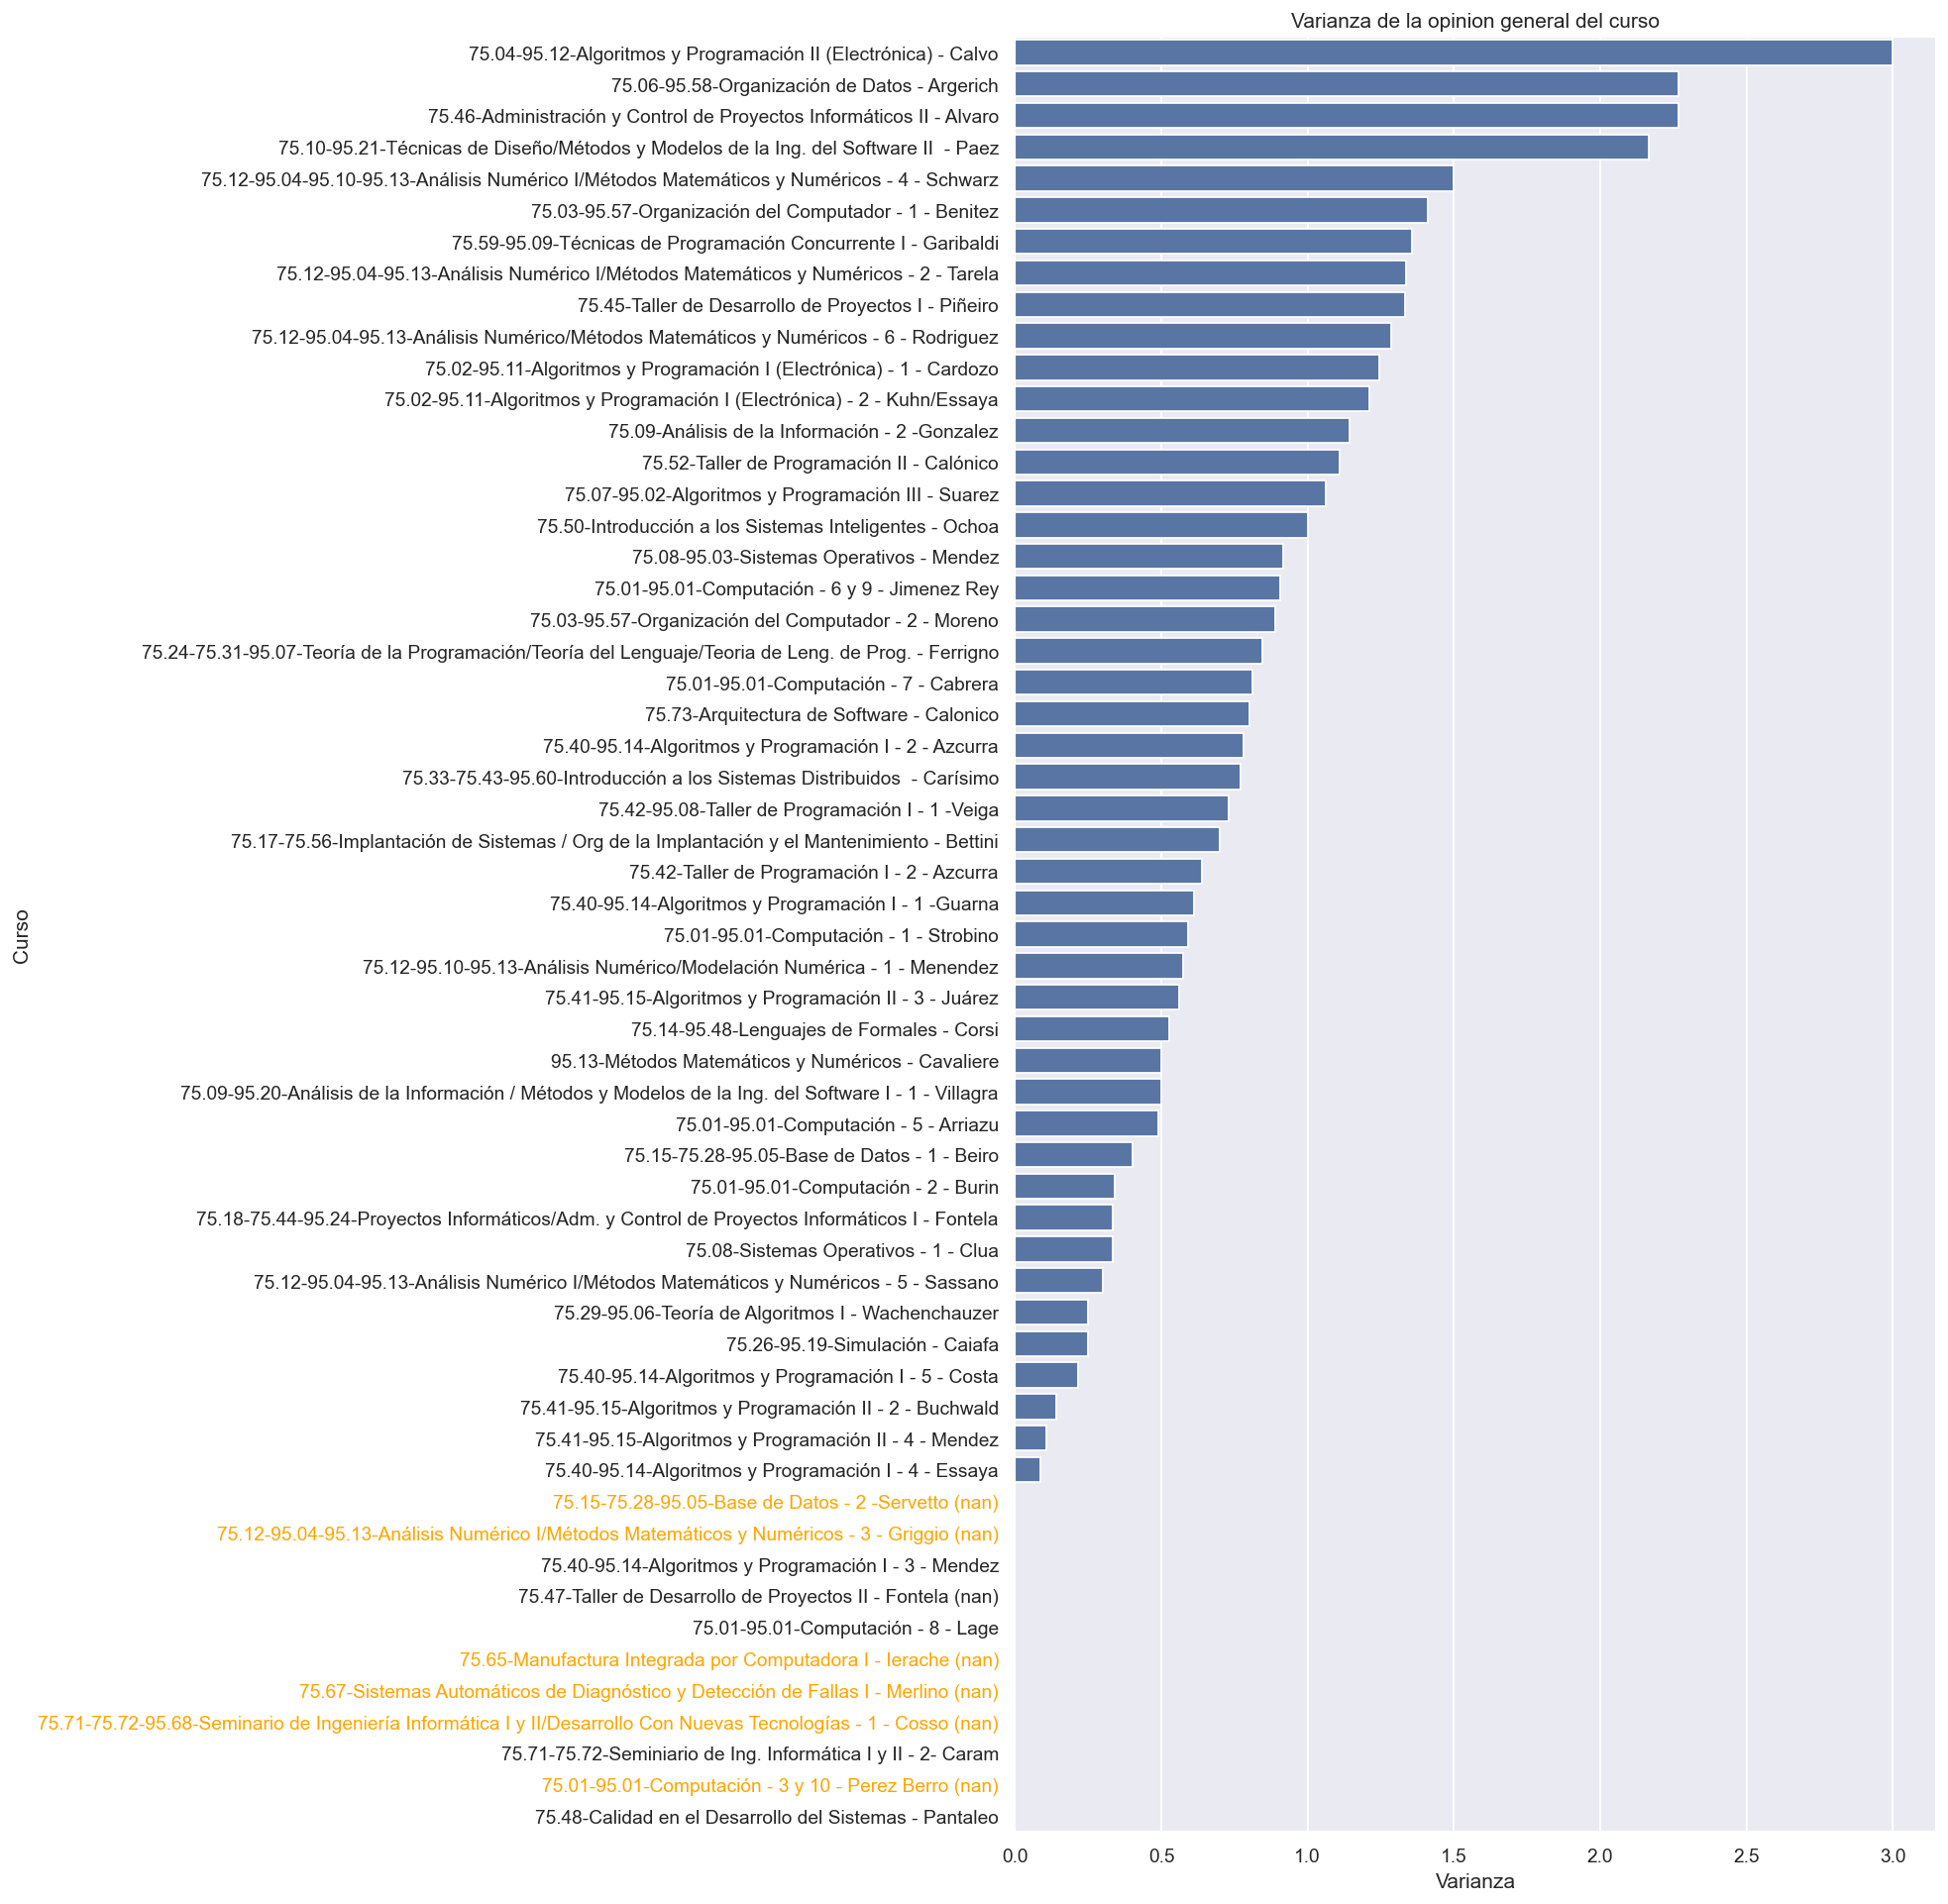

In [10]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

var_curso = comp.groupby('Elige el curso')['Opinión General Sobre el Curso'].var()
nan_var = var_curso[var_curso.isna()].index.tolist()

data = var_curso.fillna(0).sort_values(ascending=False)

ax = sns.barplot(x=data.values, y=data.index, color='b')

ax.set_yticklabels([x if x.get_text() not in nan_var else f"{x.get_text()} (nan)" for x in ax.get_yticklabels()])

for yticklabel in ax.get_yticklabels():
    if yticklabel.get_text().rstrip(" (na)") in nan_var:
        yticklabel.set_color("orange")
    
plt.title("Varianza de la opinion general del curso")
plt.xlabel("Varianza")
plt.ylabel("Curso")

plt.show()

## Comparativa de promedios por pregunta
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

In [11]:
num_cols = ['Opinión General Sobre el Curso',
 '¿Aprobó la Cursada?',
 '¿Cómo te Resultaron los Temas de la Materia?',
 '¿Los Temas de la Materia Están Actualizados?',
 'Nivel de las Clases Teóricas del Curso',
 'Nivel de las Clases Prácticas del Curso',
 'Dificultad del Curso',
 'Dificultad del TP',
 'Promedio nivel teóricas y prácticas']

In [12]:
cursos_5p_respuestas = comp['Elige el curso'].value_counts().where(lambda x: x >= 5).dropna().index.tolist()
comp_5p = comp[comp['Elige el curso'].isin(cursos_5p_respuestas)].sort_values(by='Elige el curso')
comp_5p_mean = comp_5p.groupby('Elige el curso')[num_cols].mean()

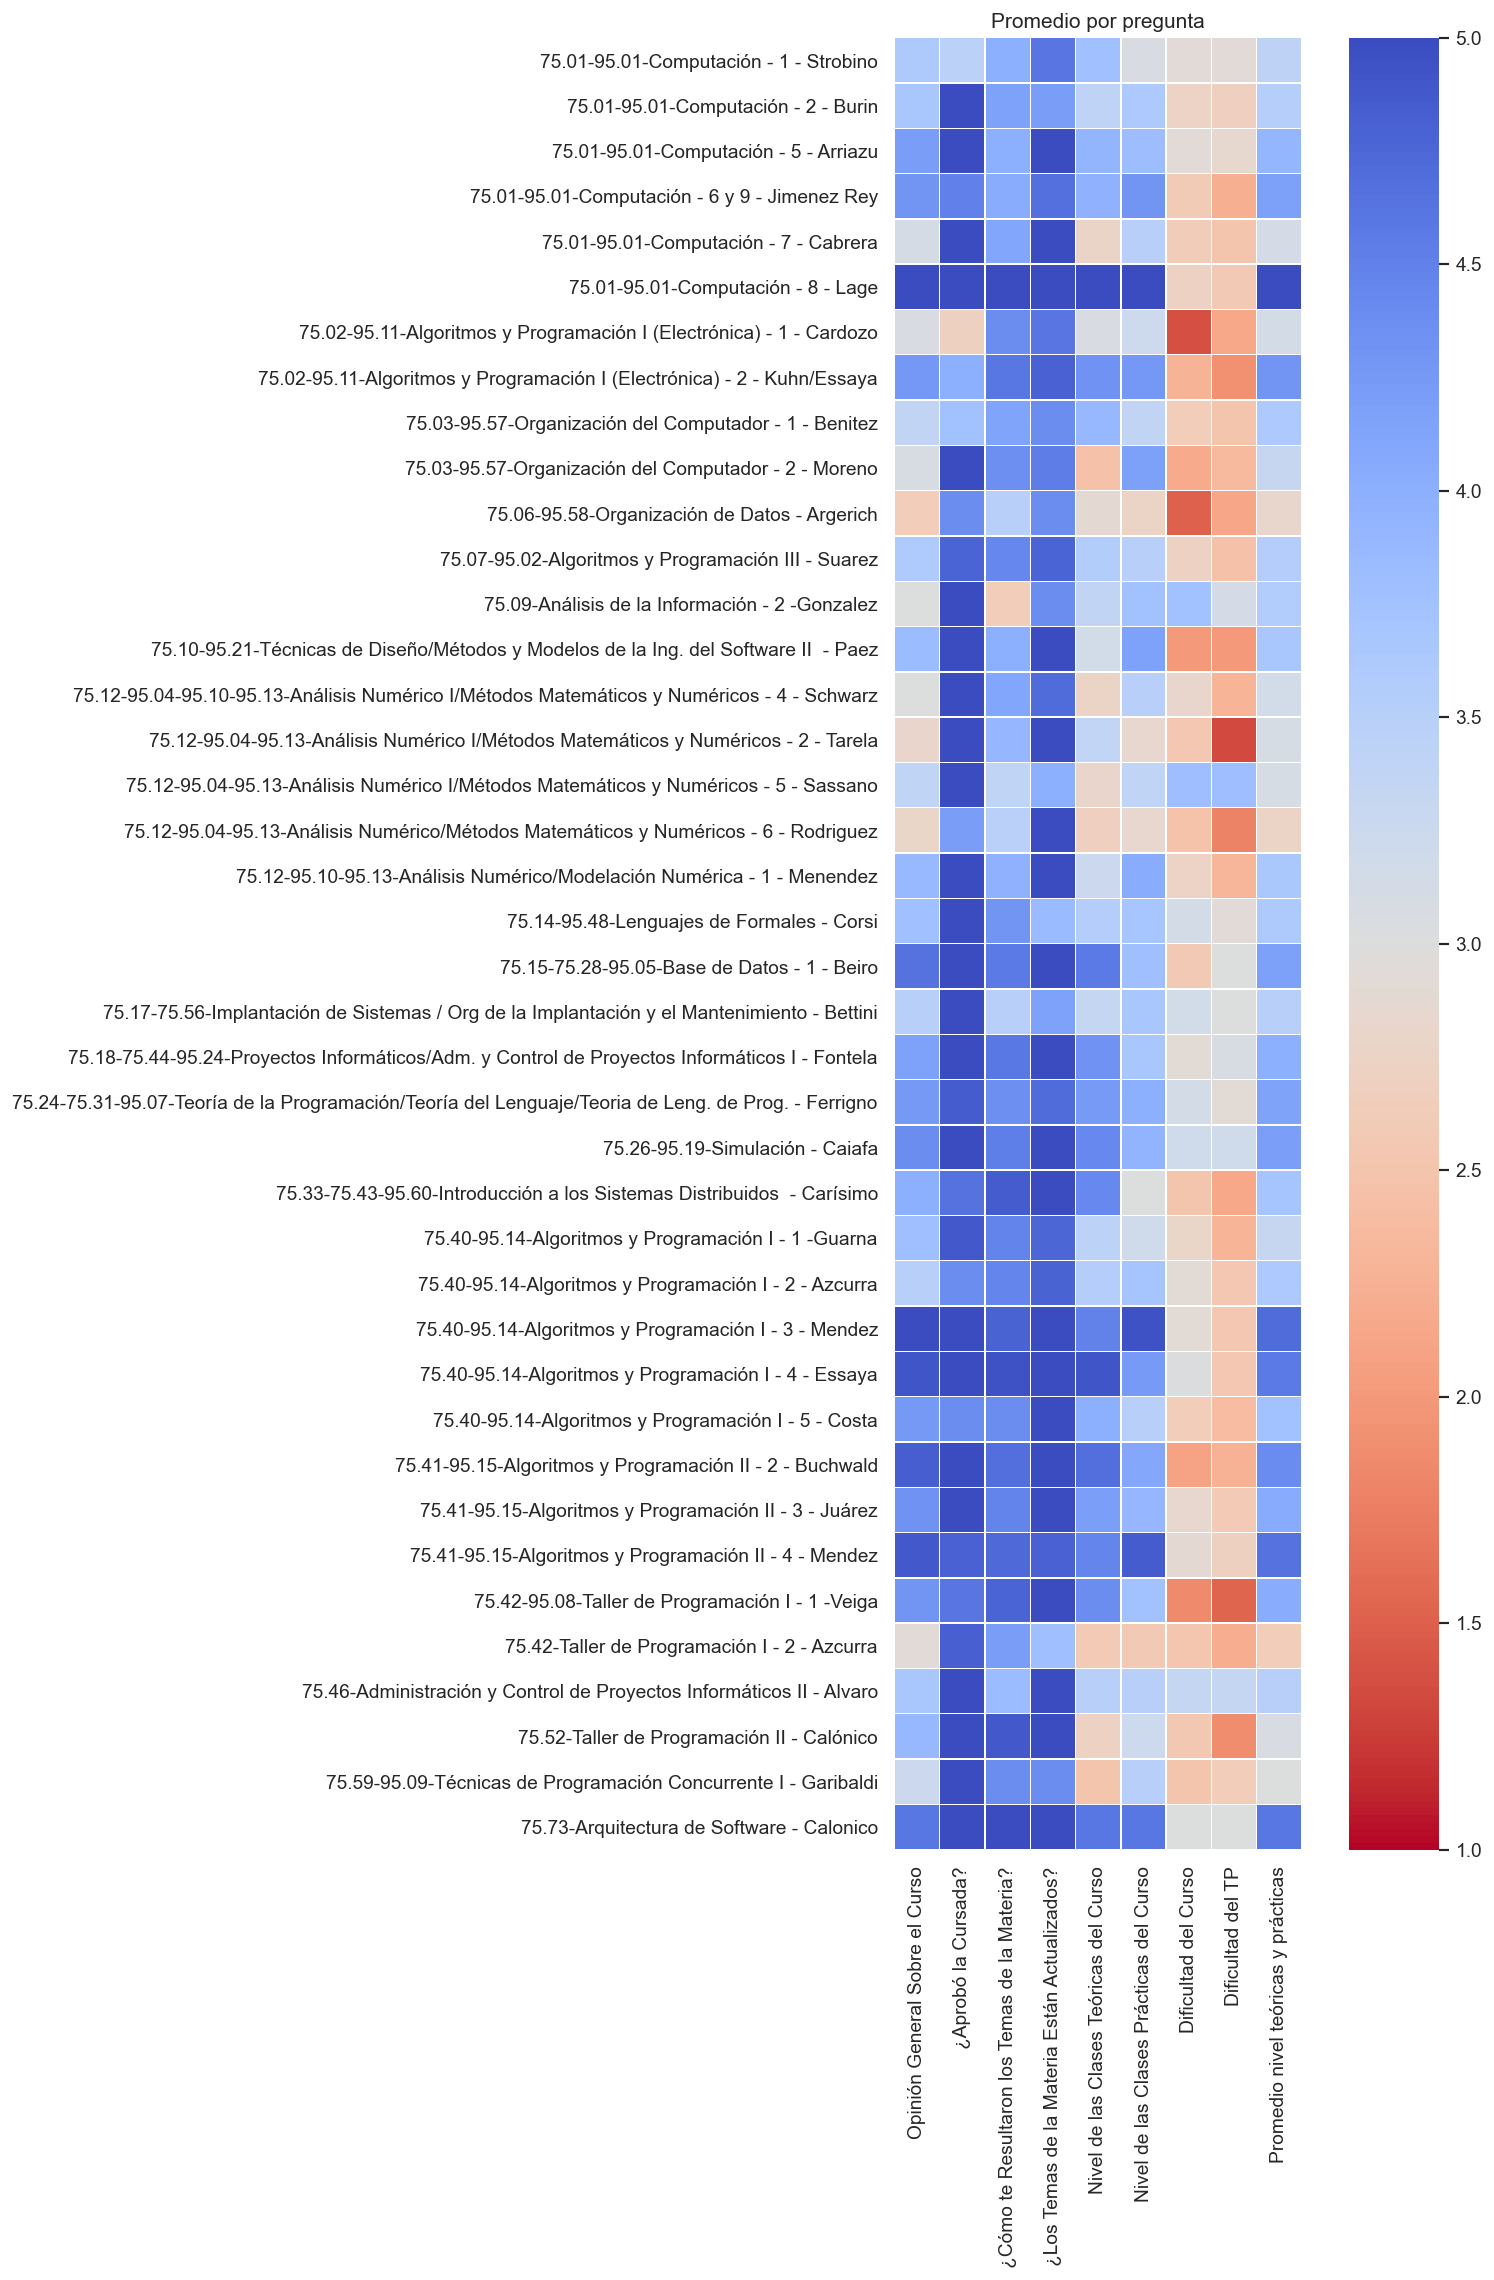

In [13]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

sns.heatmap(data=comp_5p_mean, cmap='coolwarm_r',linewidths=.2, square=True, vmin=1, vmax=5)
plt.ylabel("")
plt.title("Promedio por pregunta")
plt.show()

## Histograma de promedios por pregunta
Por cada curso se calcula el promedio de cada pregunta numérica y luego se hace un histograma de esos promedios.

### Histograma de promedios de Opinión General Sobre el Curso

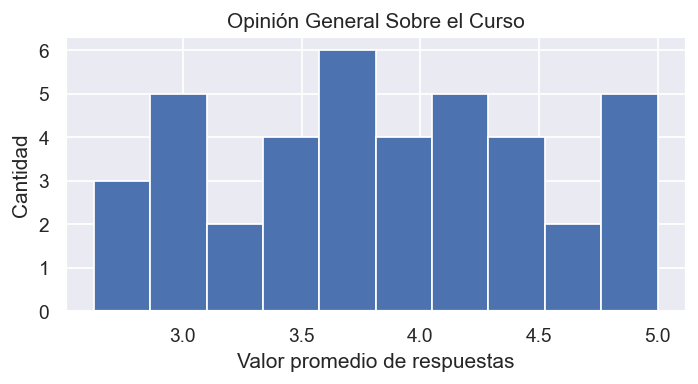

### Histograma de promedios de ¿Aprobó la Cursada?

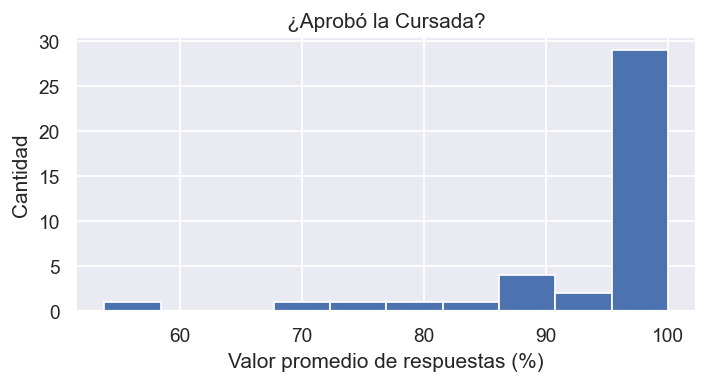

### Histograma de promedios de ¿Cómo te Resultaron los Temas de la Materia?

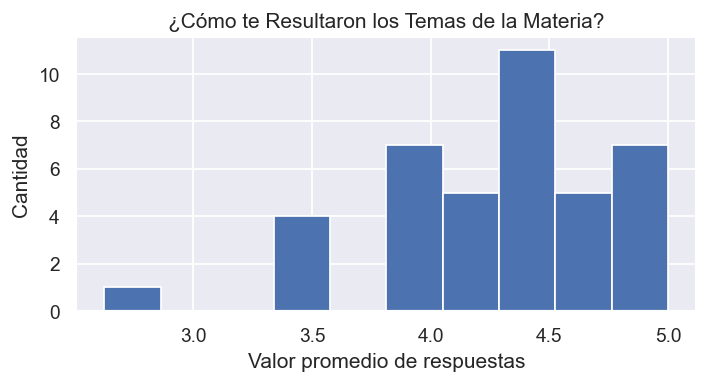

### Histograma de promedios de ¿Los Temas de la Materia Están Actualizados?

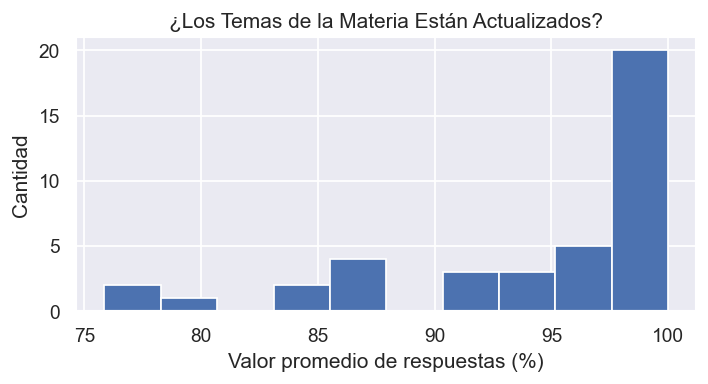

### Histograma de promedios de Nivel de las Clases Teóricas del Curso

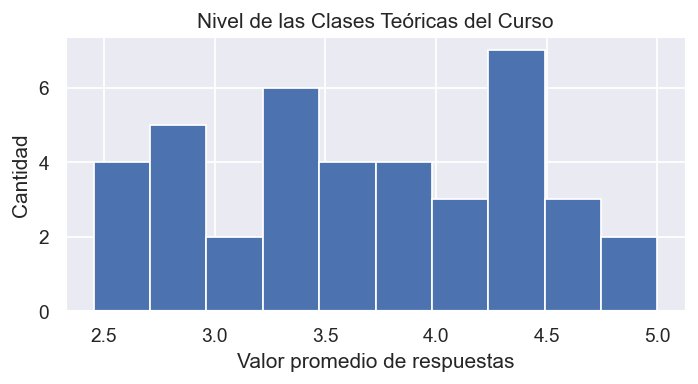

### Histograma de promedios de Nivel de las Clases Prácticas del Curso

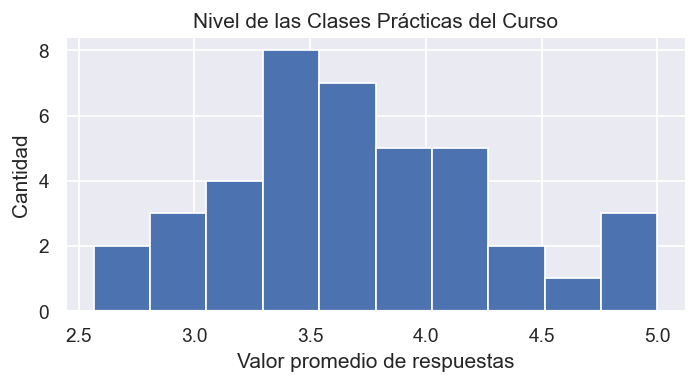

### Histograma de promedios de Dificultad del Curso

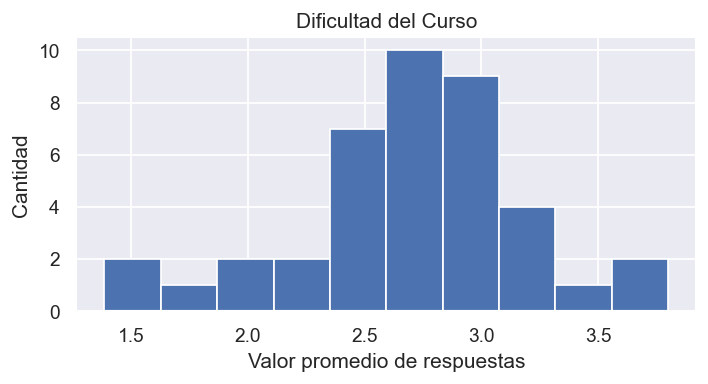

### Histograma de promedios de Dificultad del TP

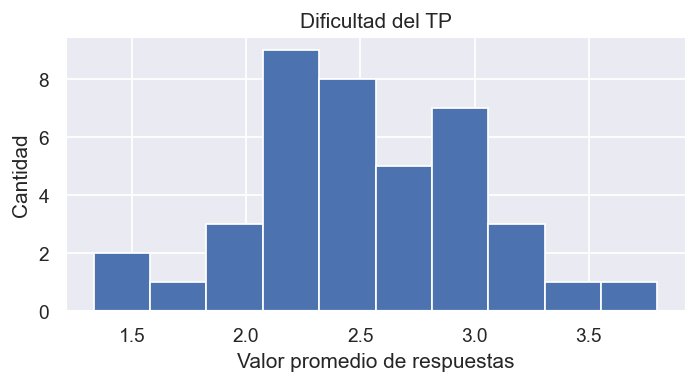

### Histograma de promedios de Promedio nivel teóricas y prácticas

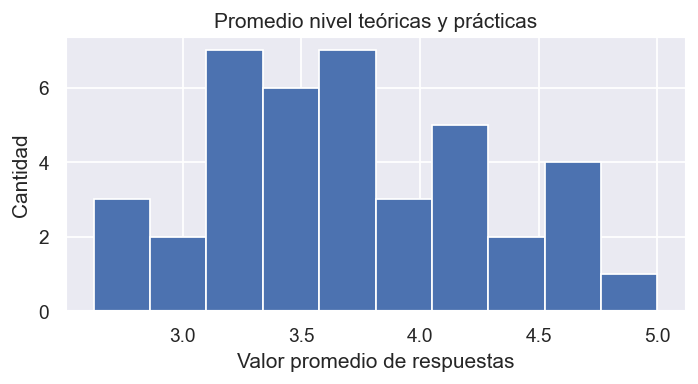

In [14]:
for col in num_cols:
    
    display(Markdown(f"### Histograma de promedios de {col}"))
    fig = plt.figure(dpi=125, figsize=(6.4, 2.9))
    
    values = comp_5p_mean[col].copy()
    if col in cols_sino:
        values *= 20
    
    plt.hist(values, bins=10)
    plt.title(col)
    plt.ylabel("Cantidad")
    
    xlabel = "Valor promedio de respuestas"
    if col in cols_sino:
        xlabel = f"{xlabel} (%)"
    
    plt.xlabel(xlabel)

    plt.show()

## Ranking de cursos por promedio

### Opinión General Sobre el Curso

Se analizan los promedios por curso de Opinión General Sobre el Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

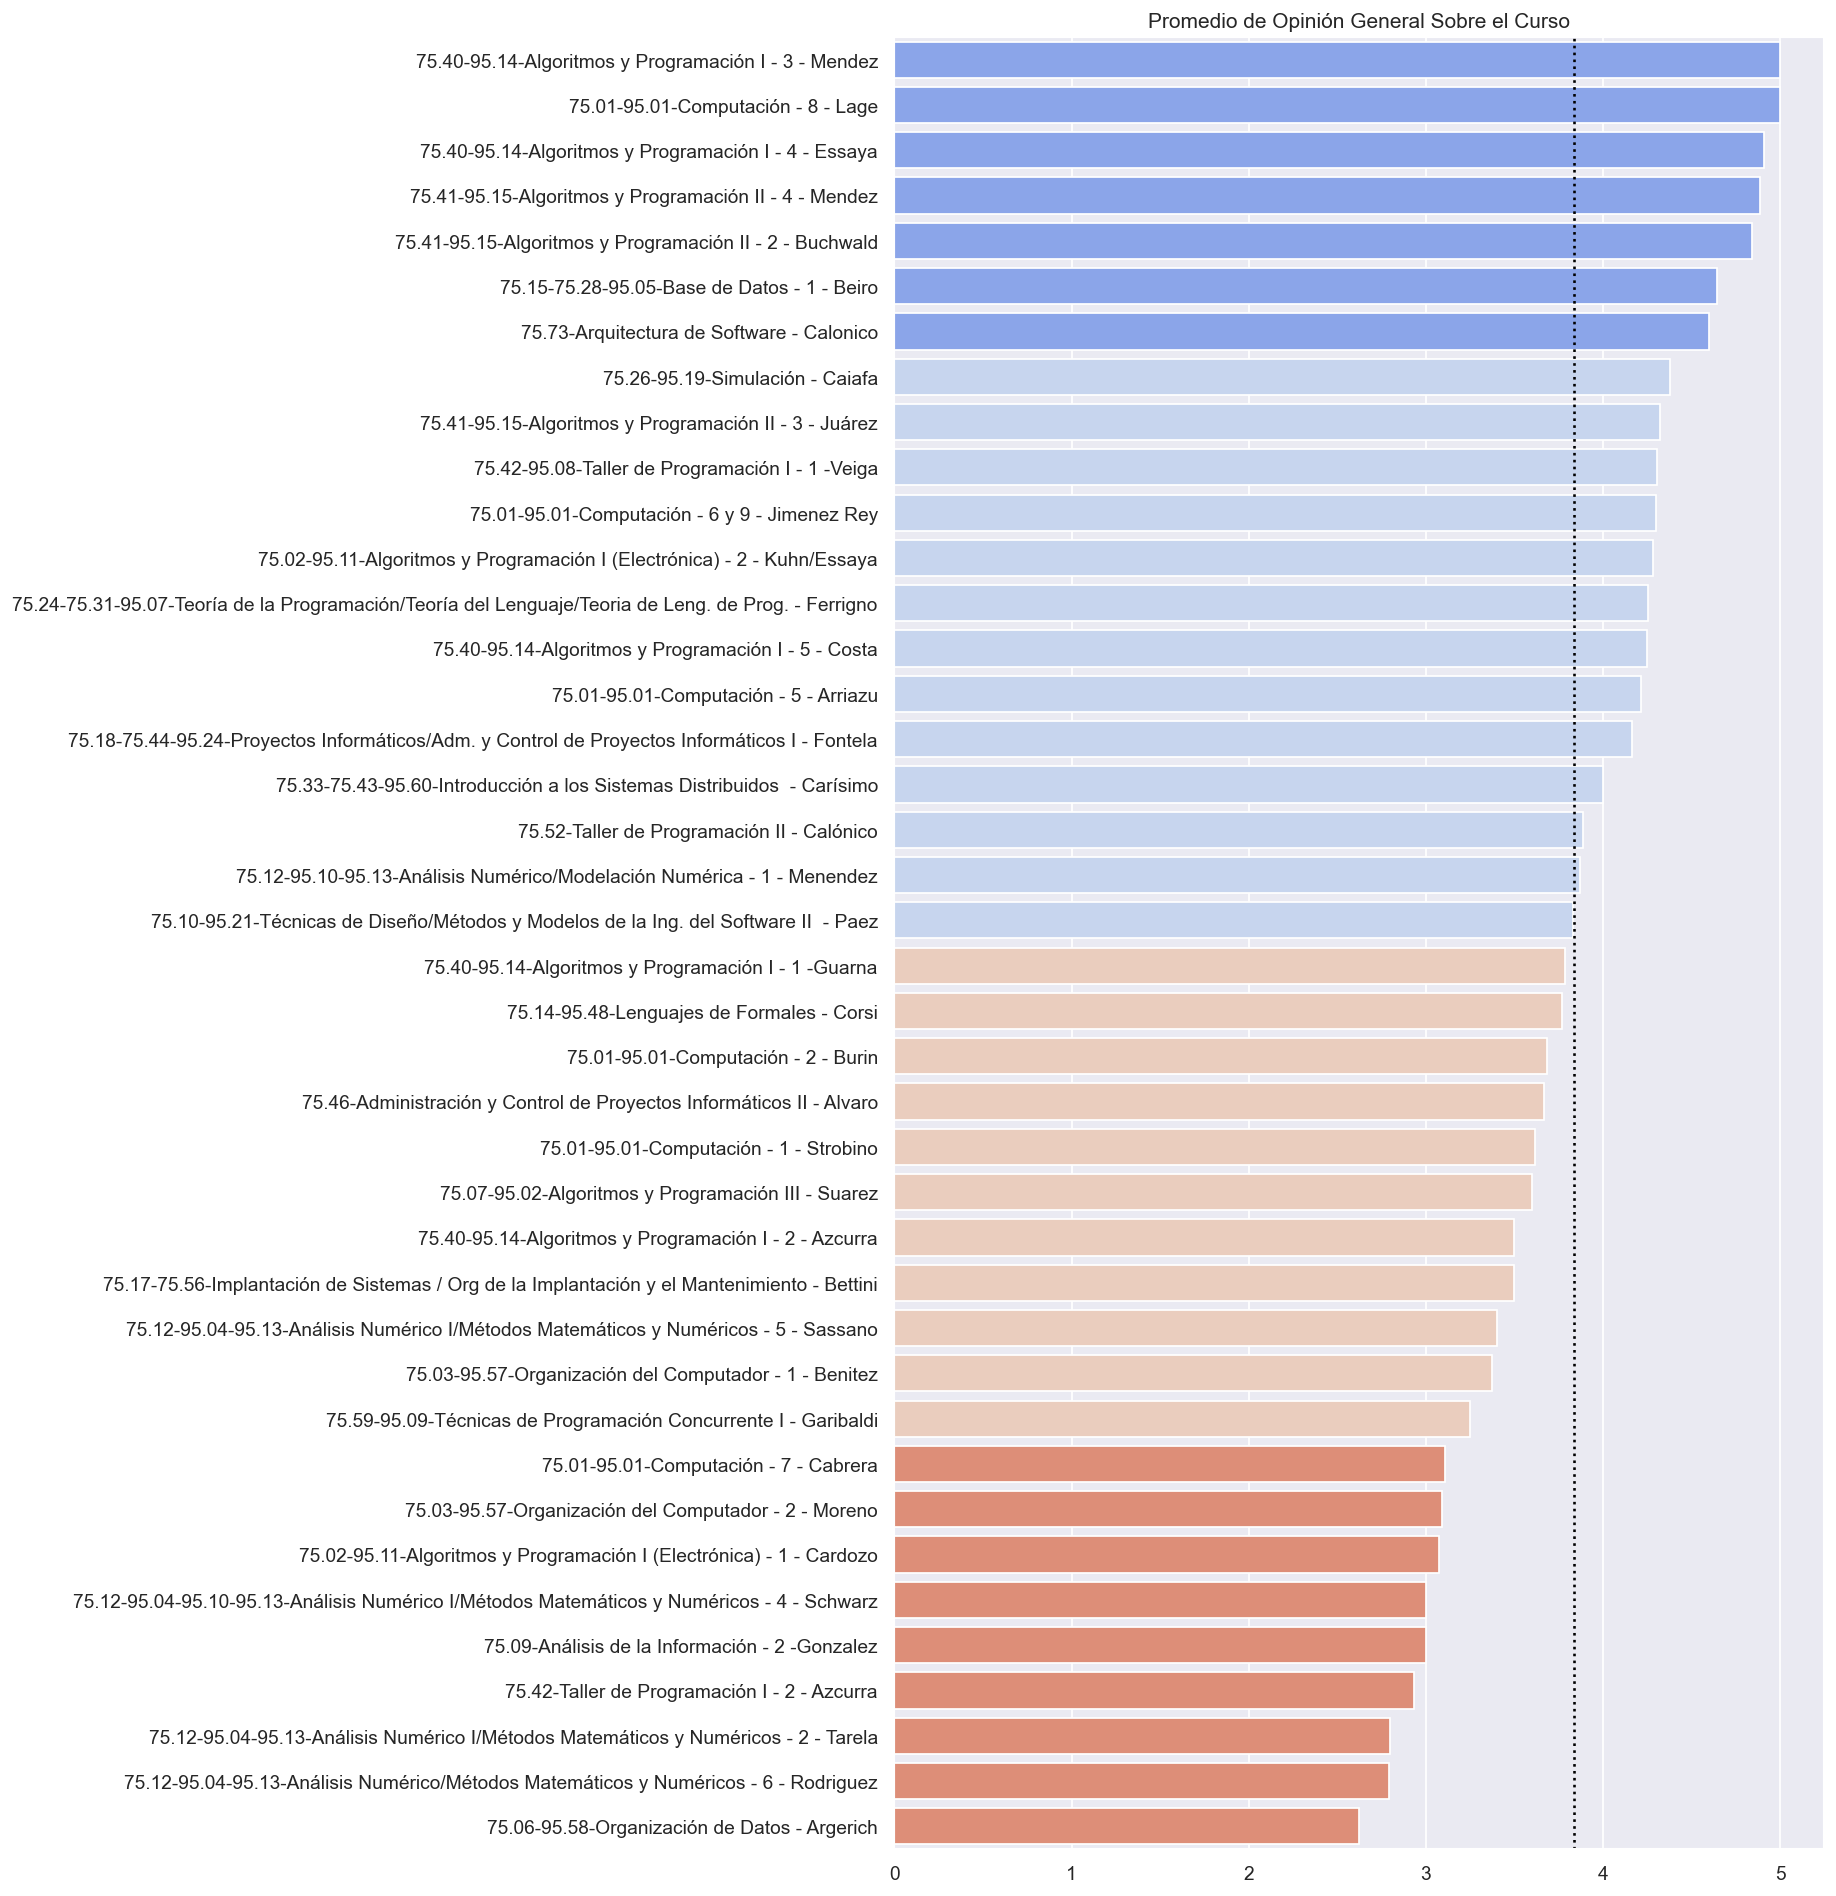

### ¿Aprobó la Cursada?

Se analizan los promedios por curso de ¿Aprobó la Cursada?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

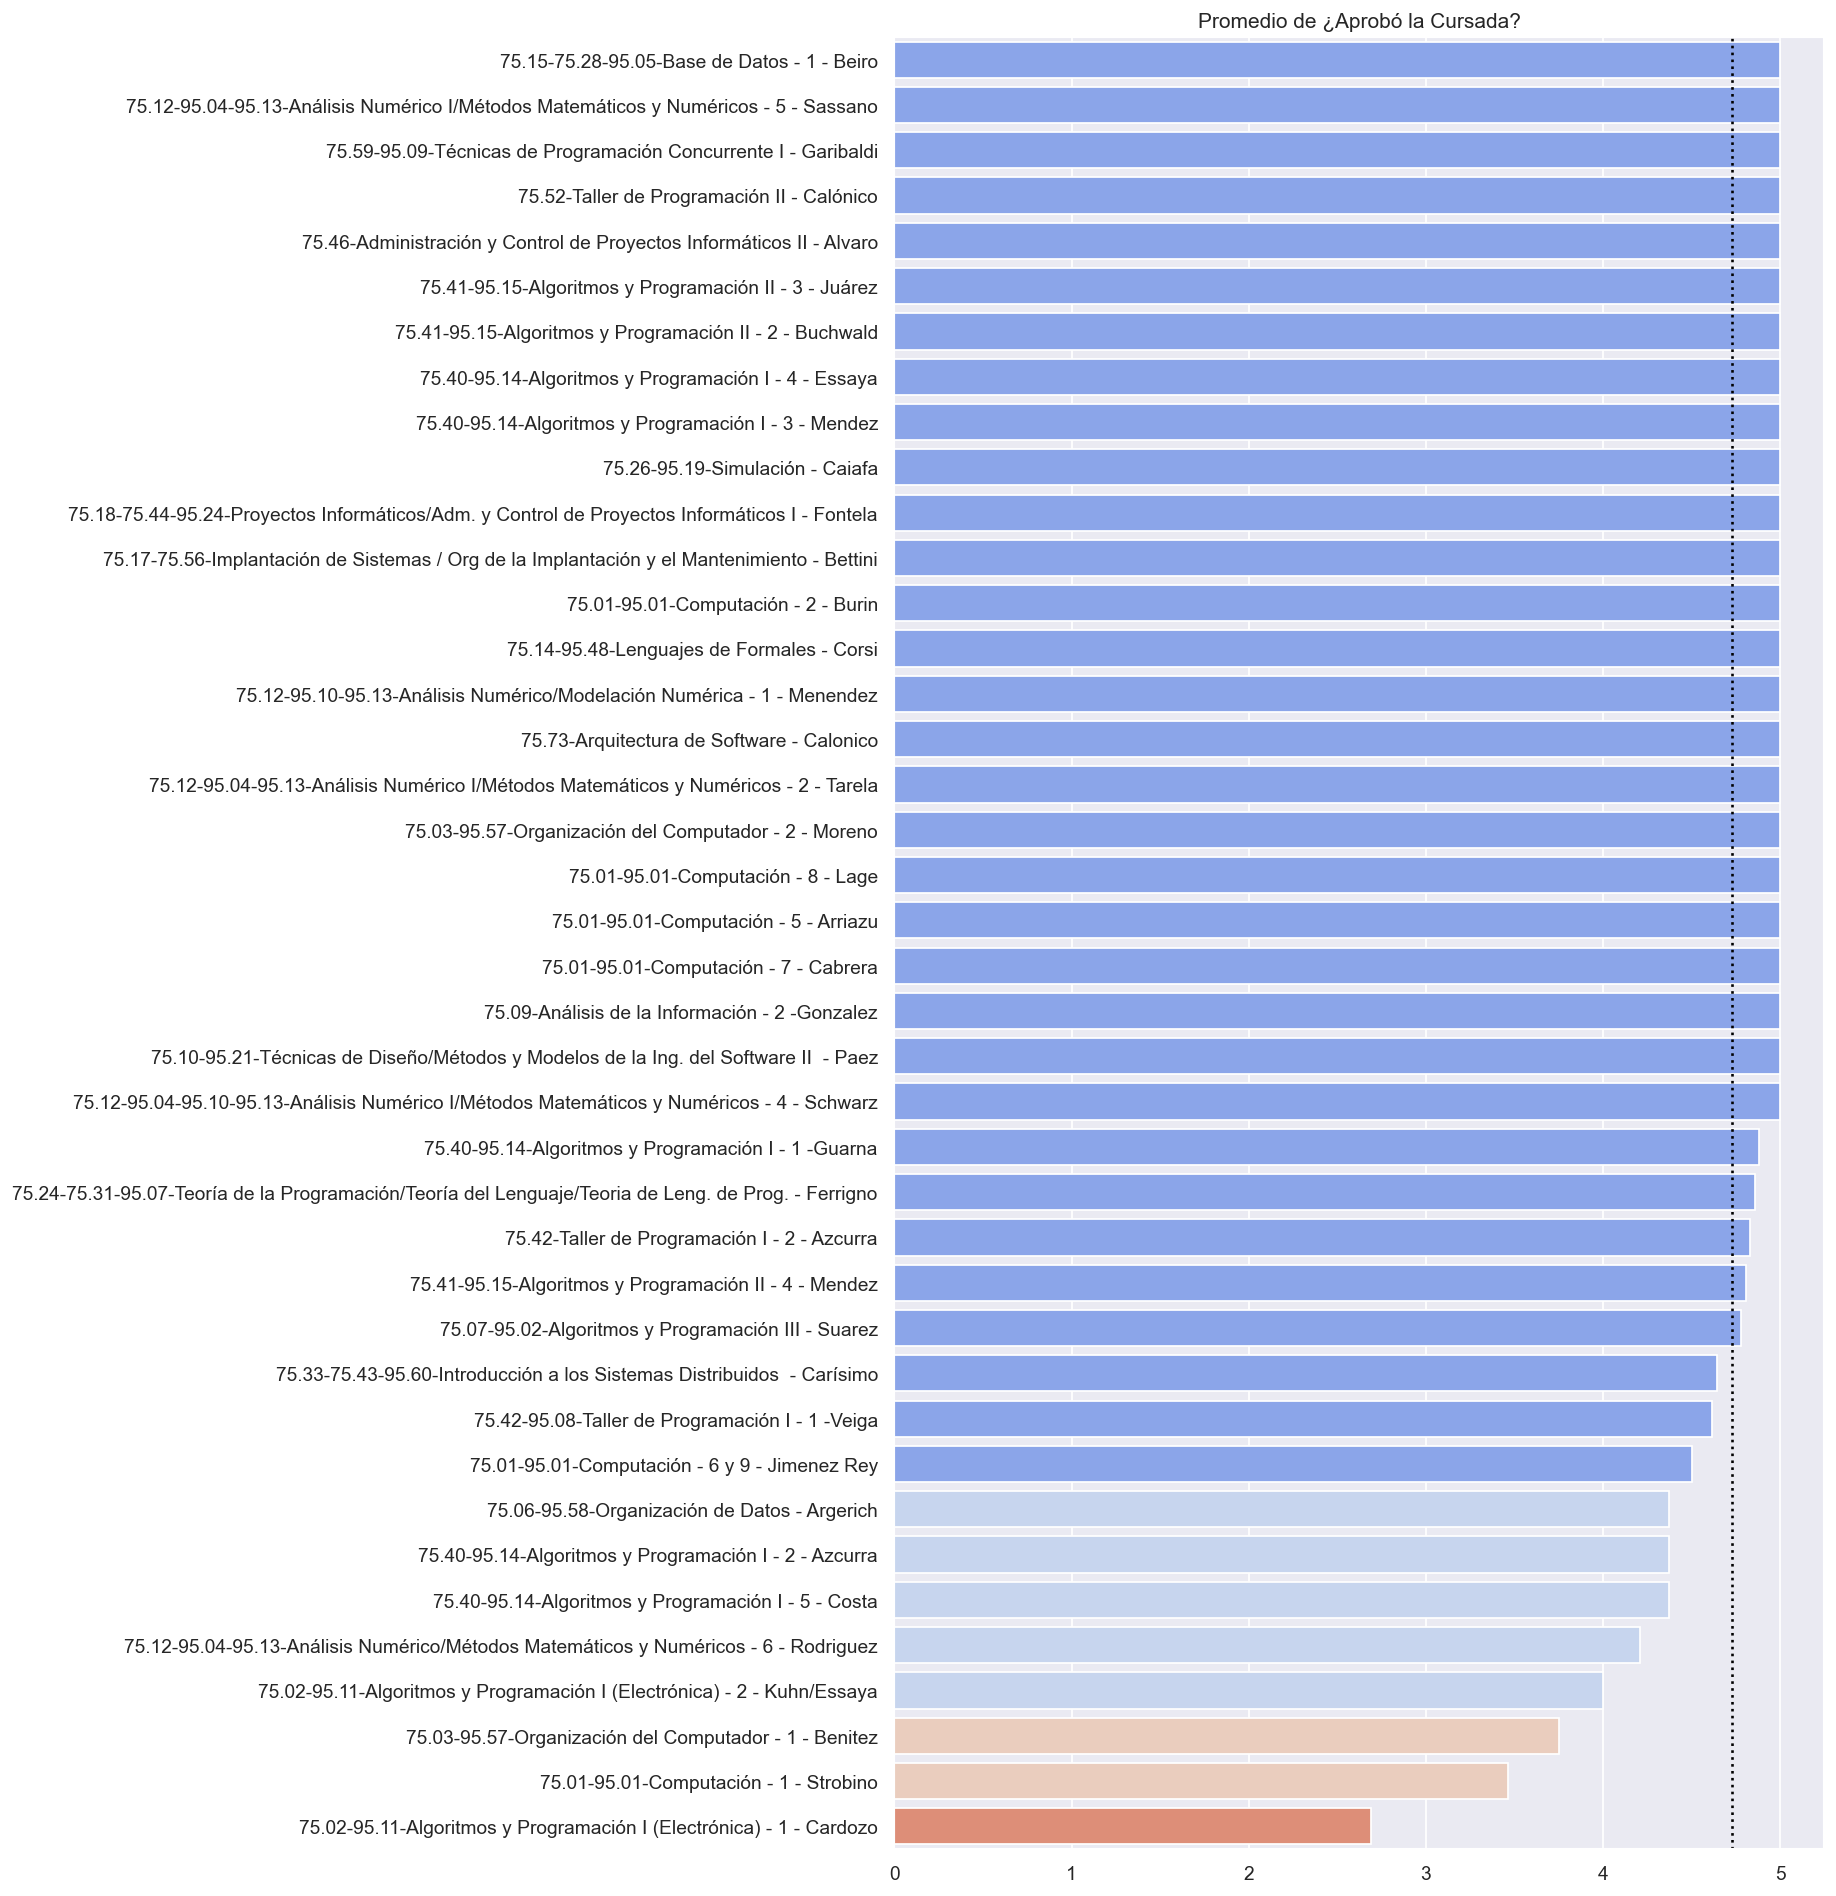

### ¿Cómo te Resultaron los Temas de la Materia?

Se analizan los promedios por curso de ¿Cómo te Resultaron los Temas de la Materia?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

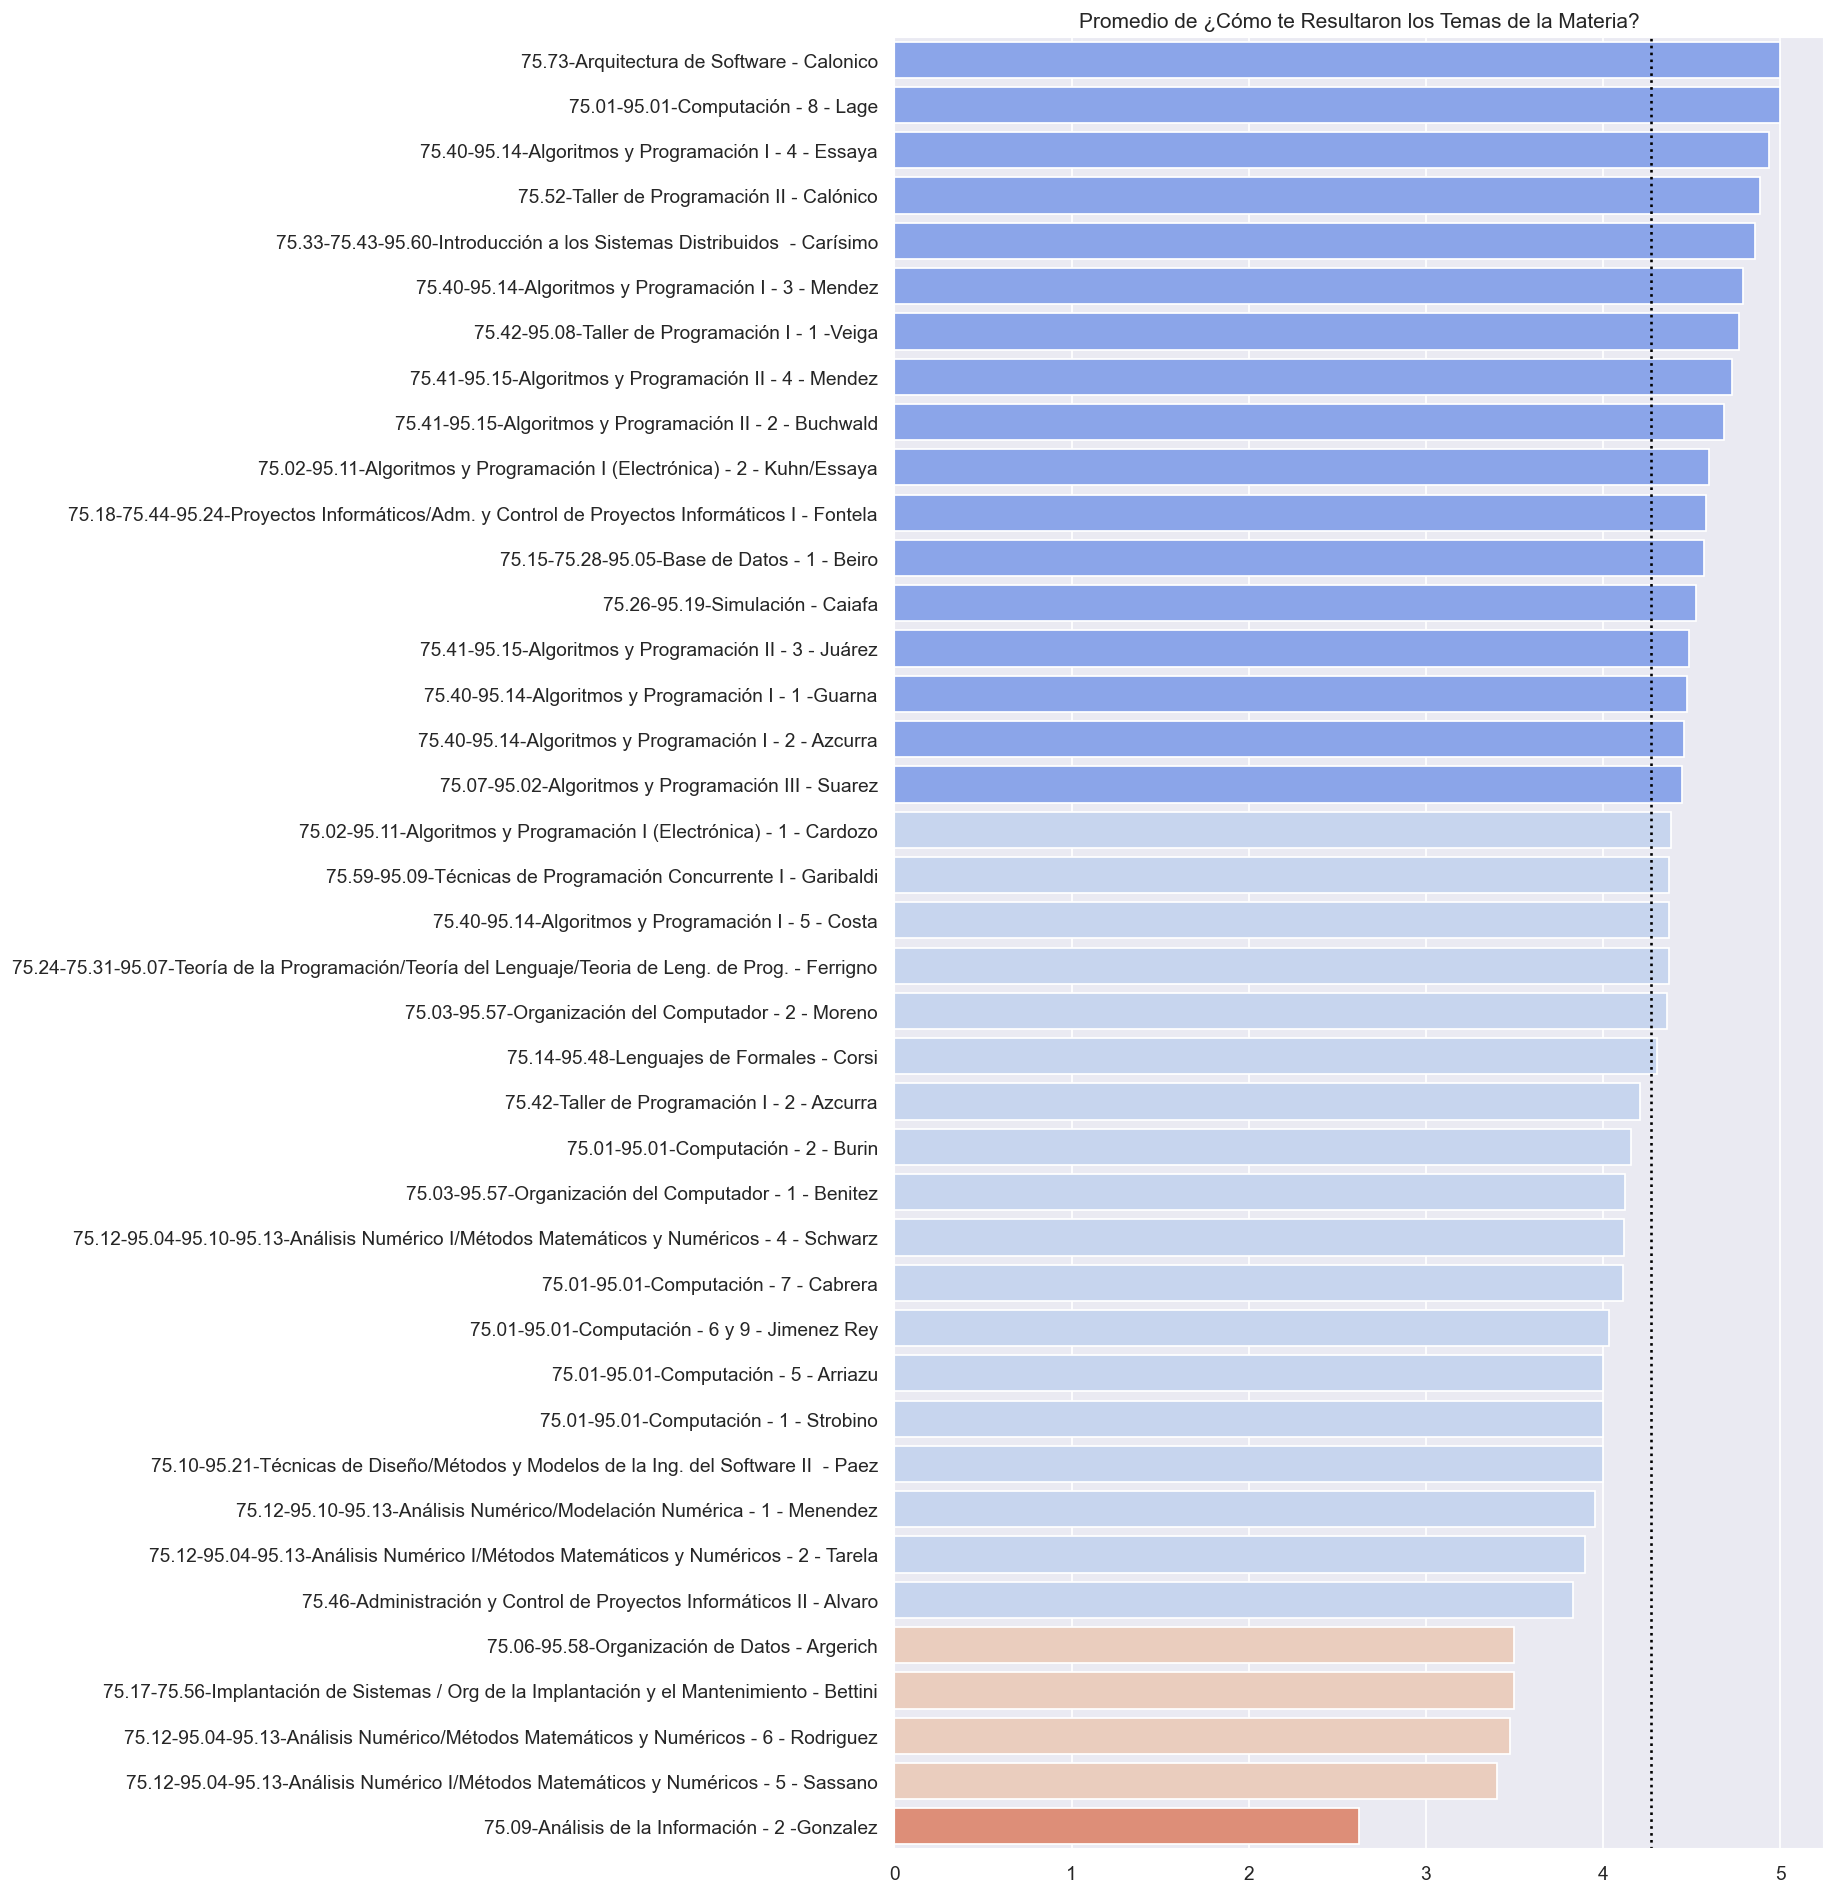

### ¿Los Temas de la Materia Están Actualizados?

Se analizan los promedios por curso de ¿Los Temas de la Materia Están Actualizados?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

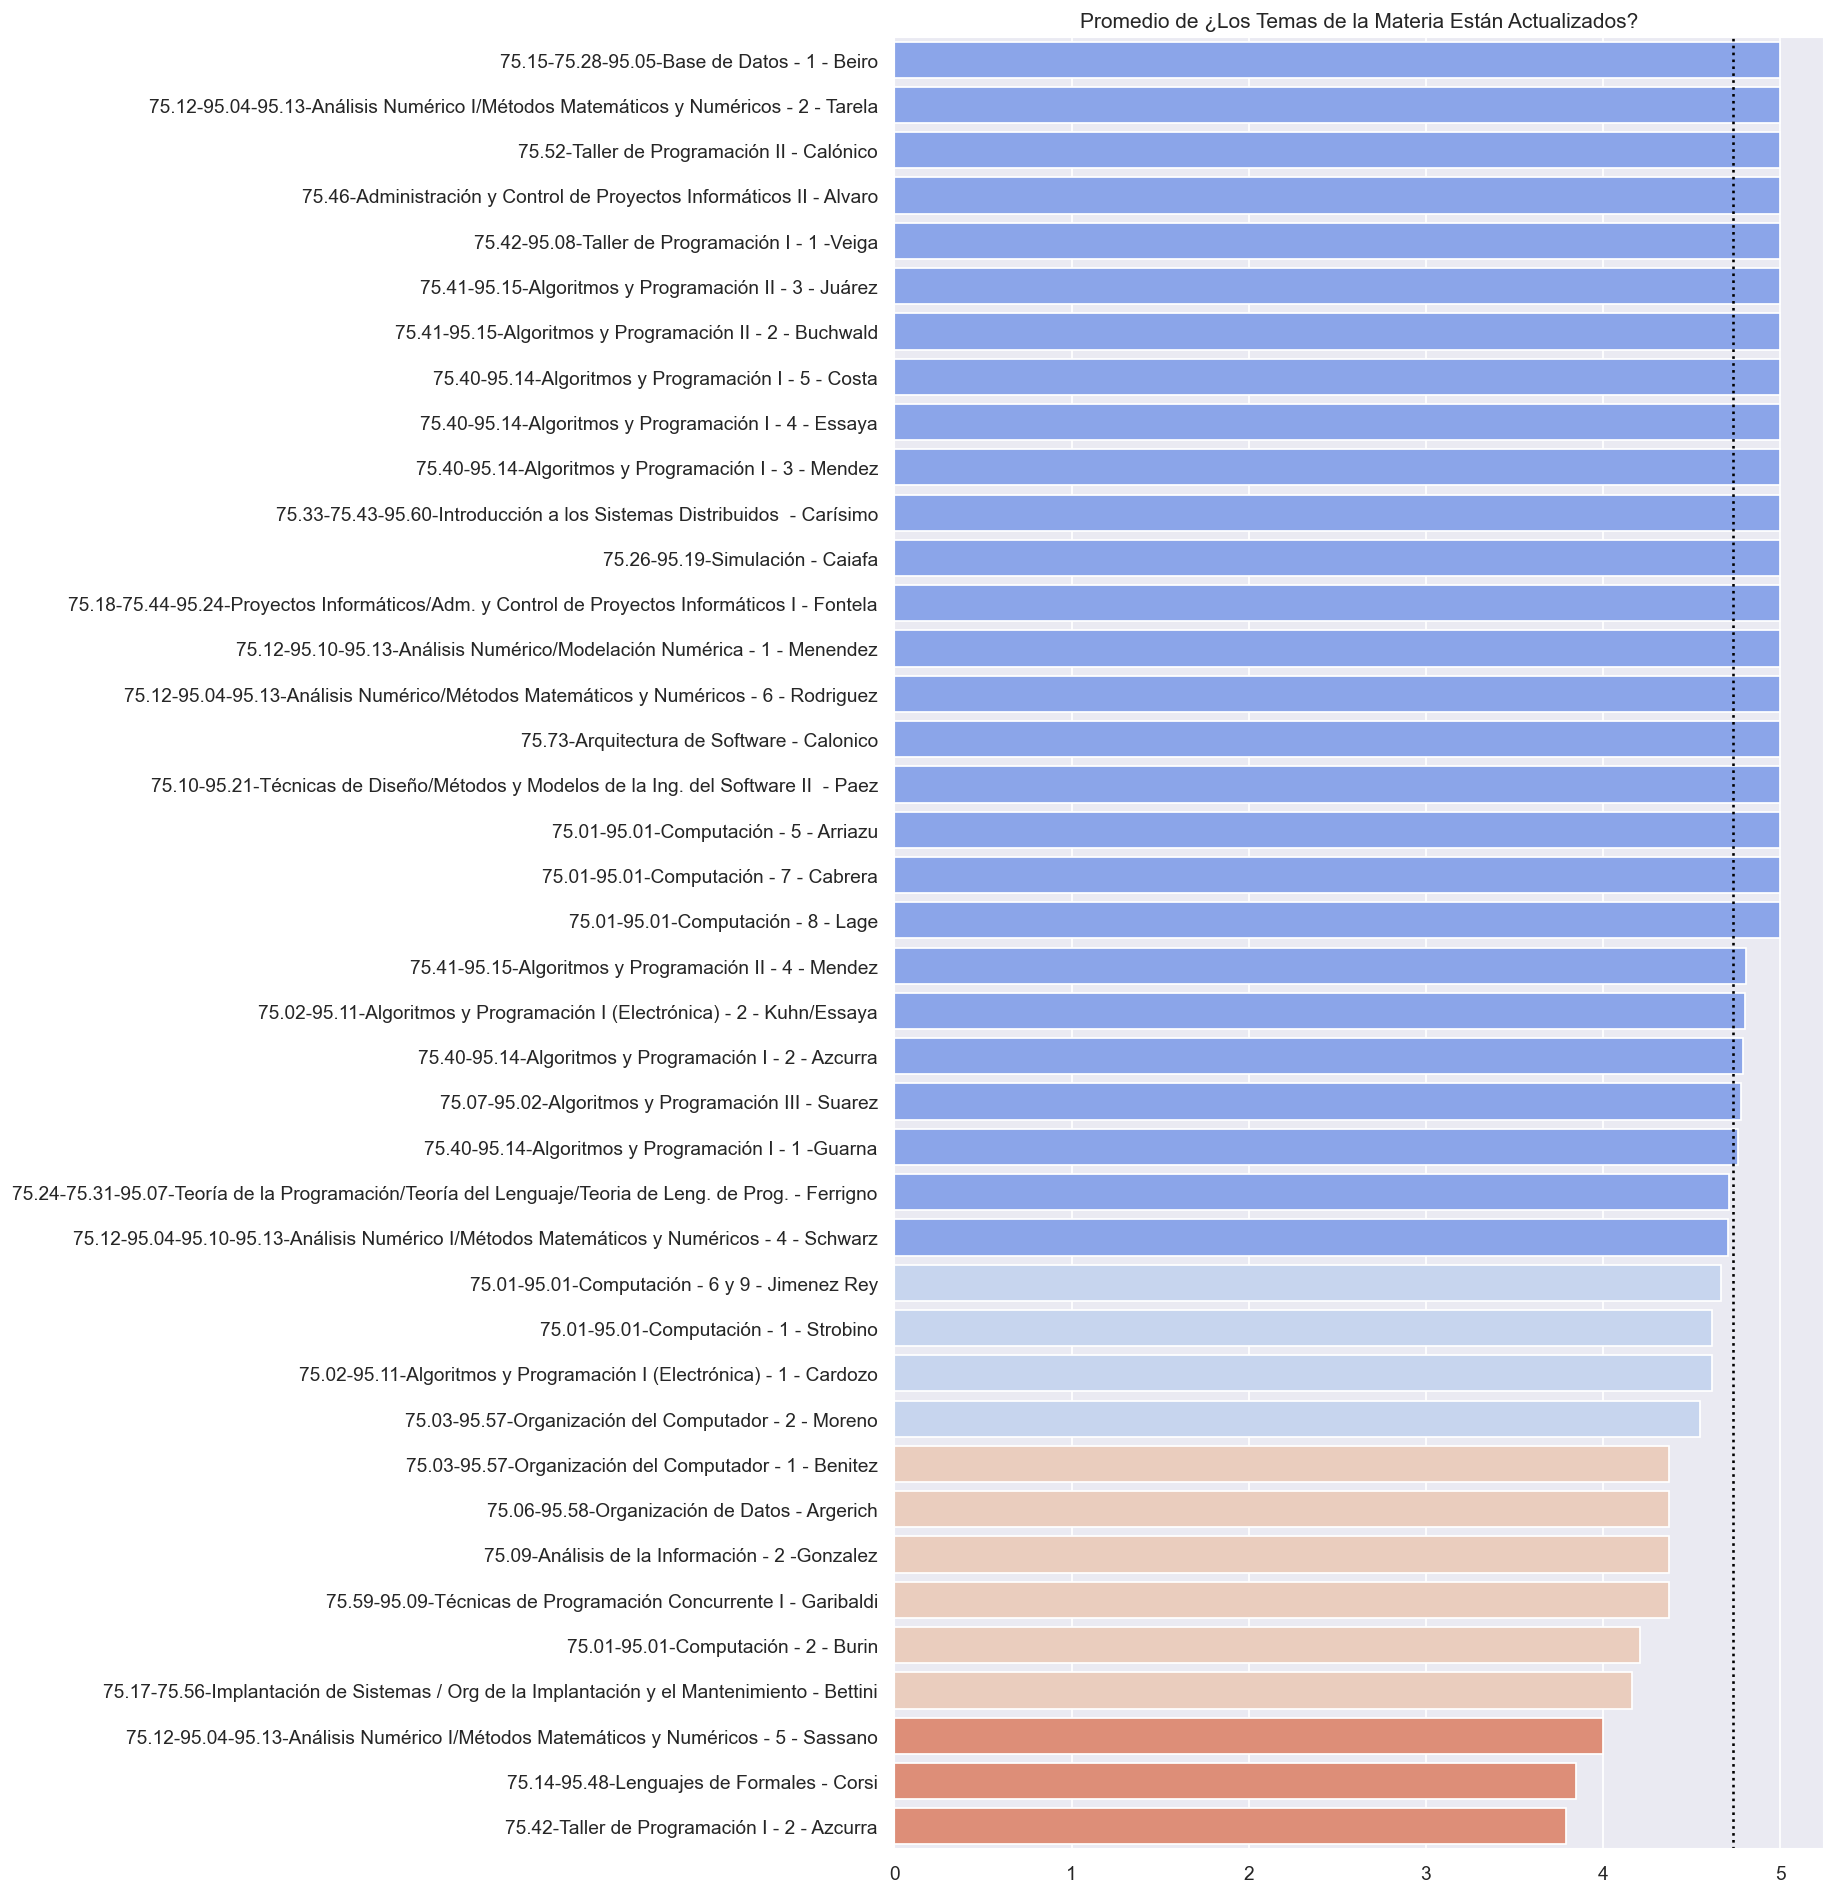

### Nivel de las Clases Teóricas del Curso

Se analizan los promedios por curso de Nivel de las Clases Teóricas del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

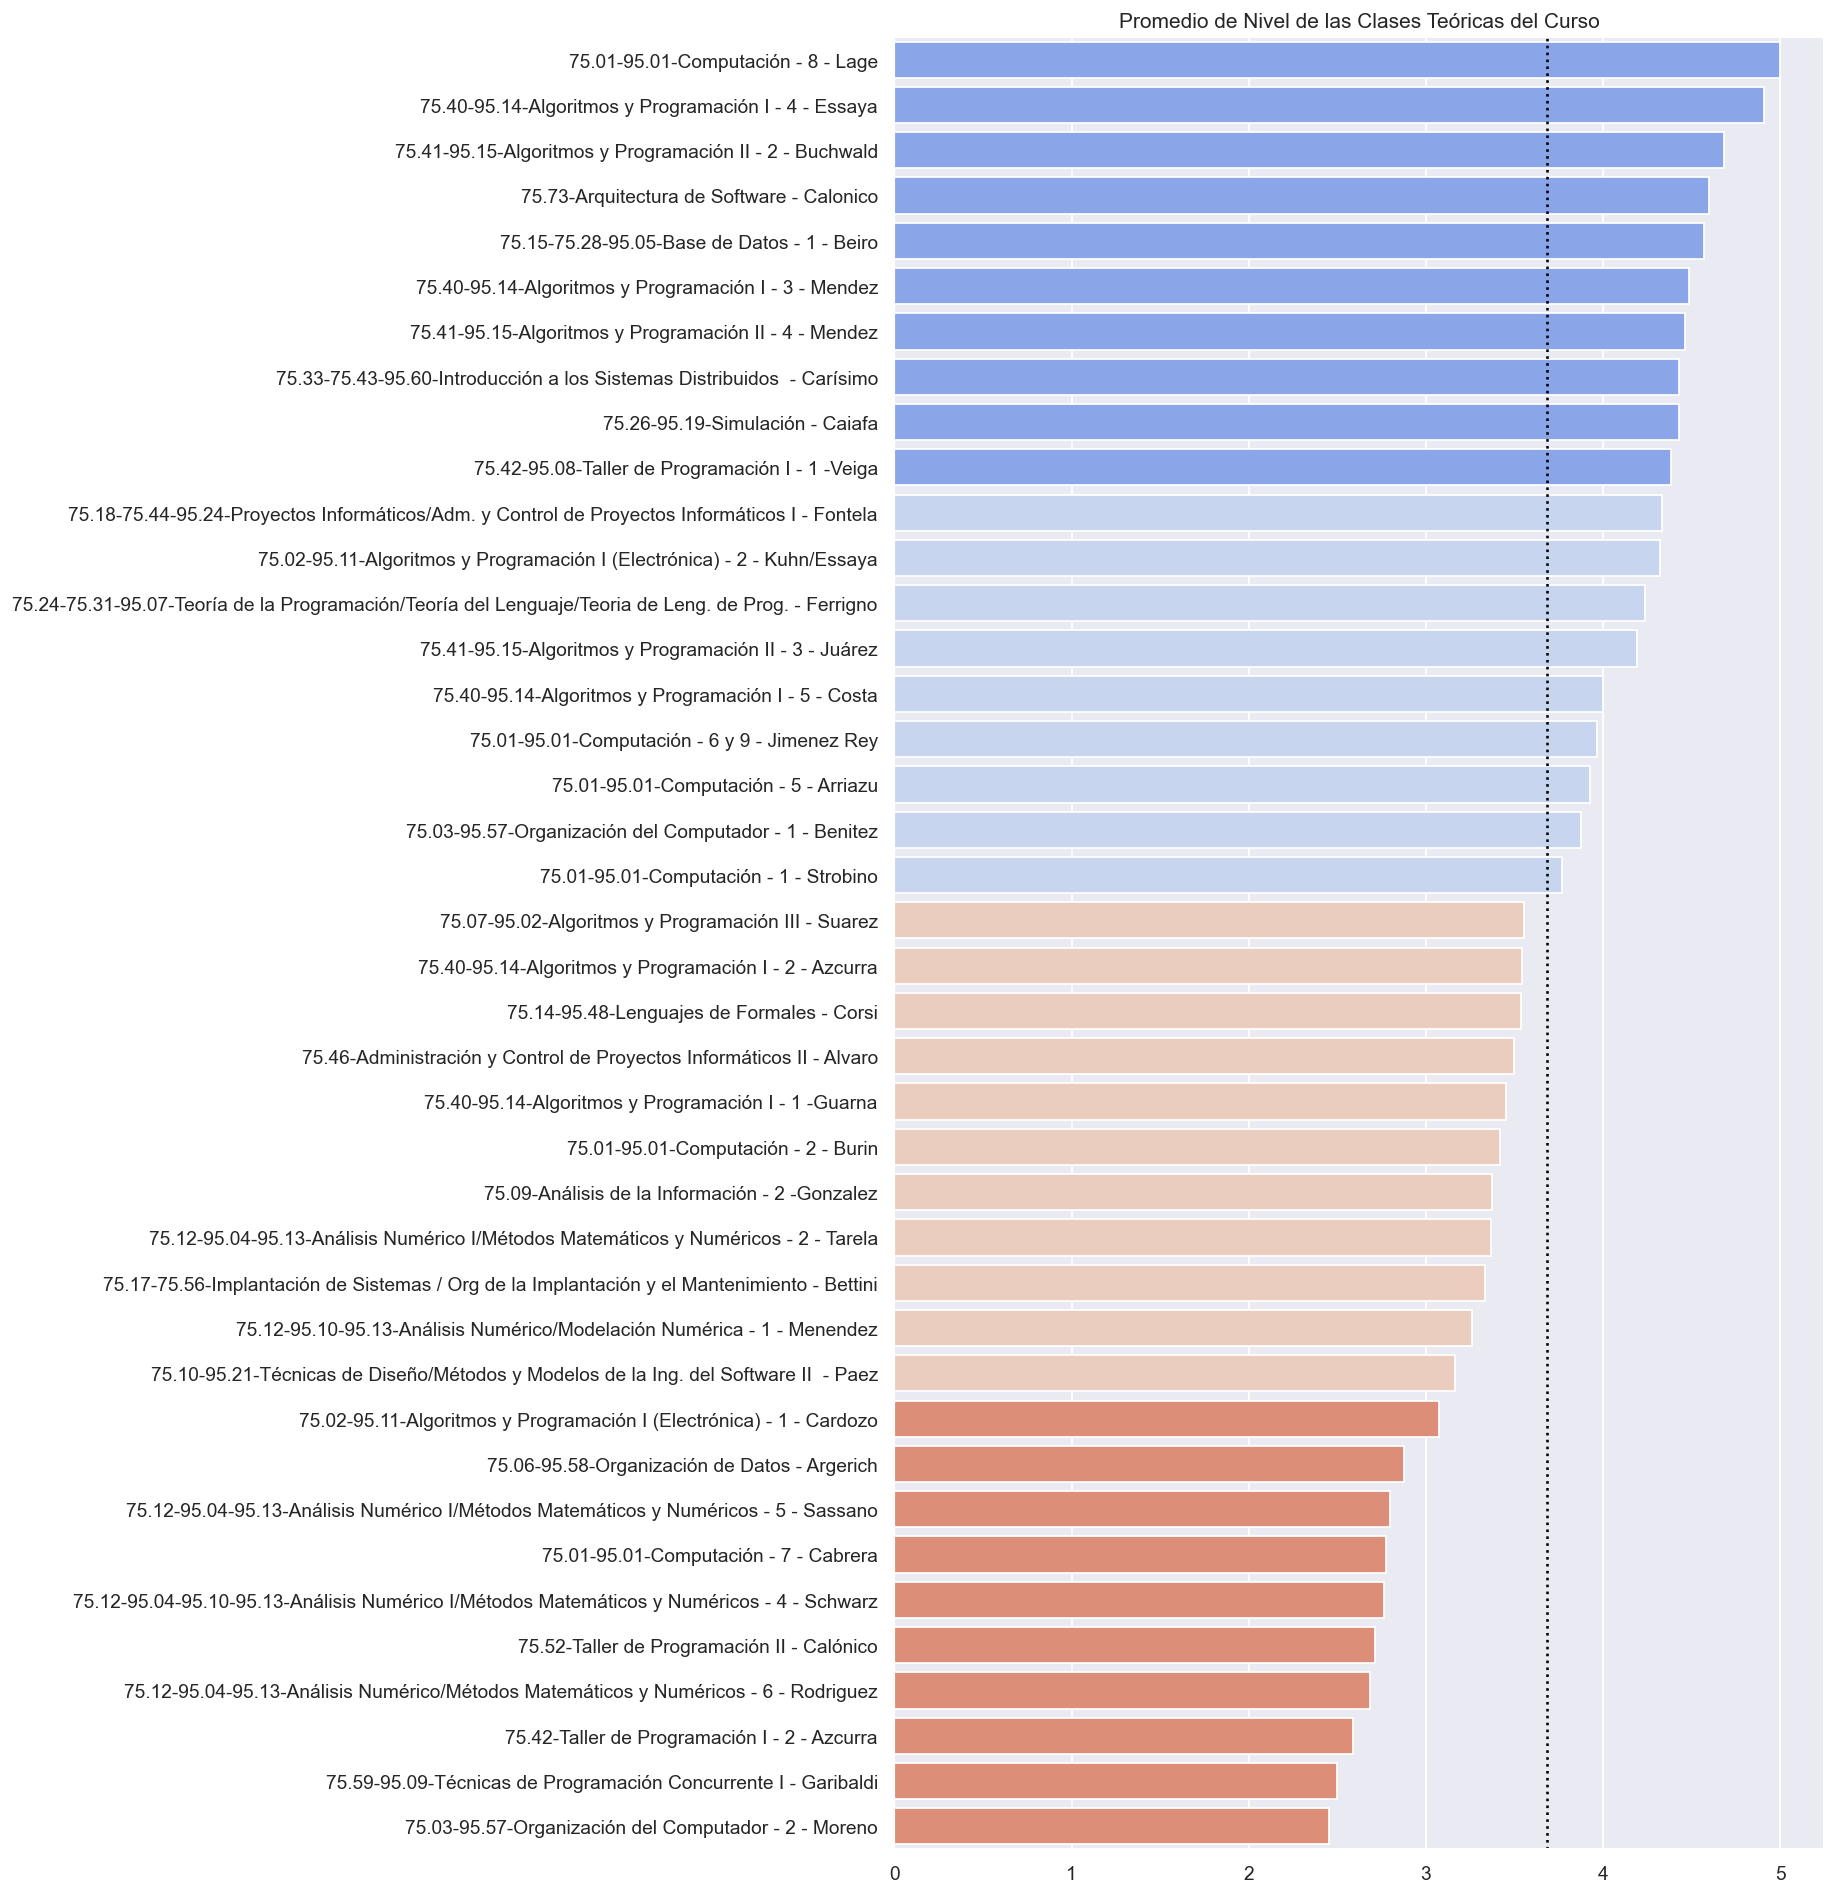

### Nivel de las Clases Prácticas del Curso

Se analizan los promedios por curso de Nivel de las Clases Prácticas del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

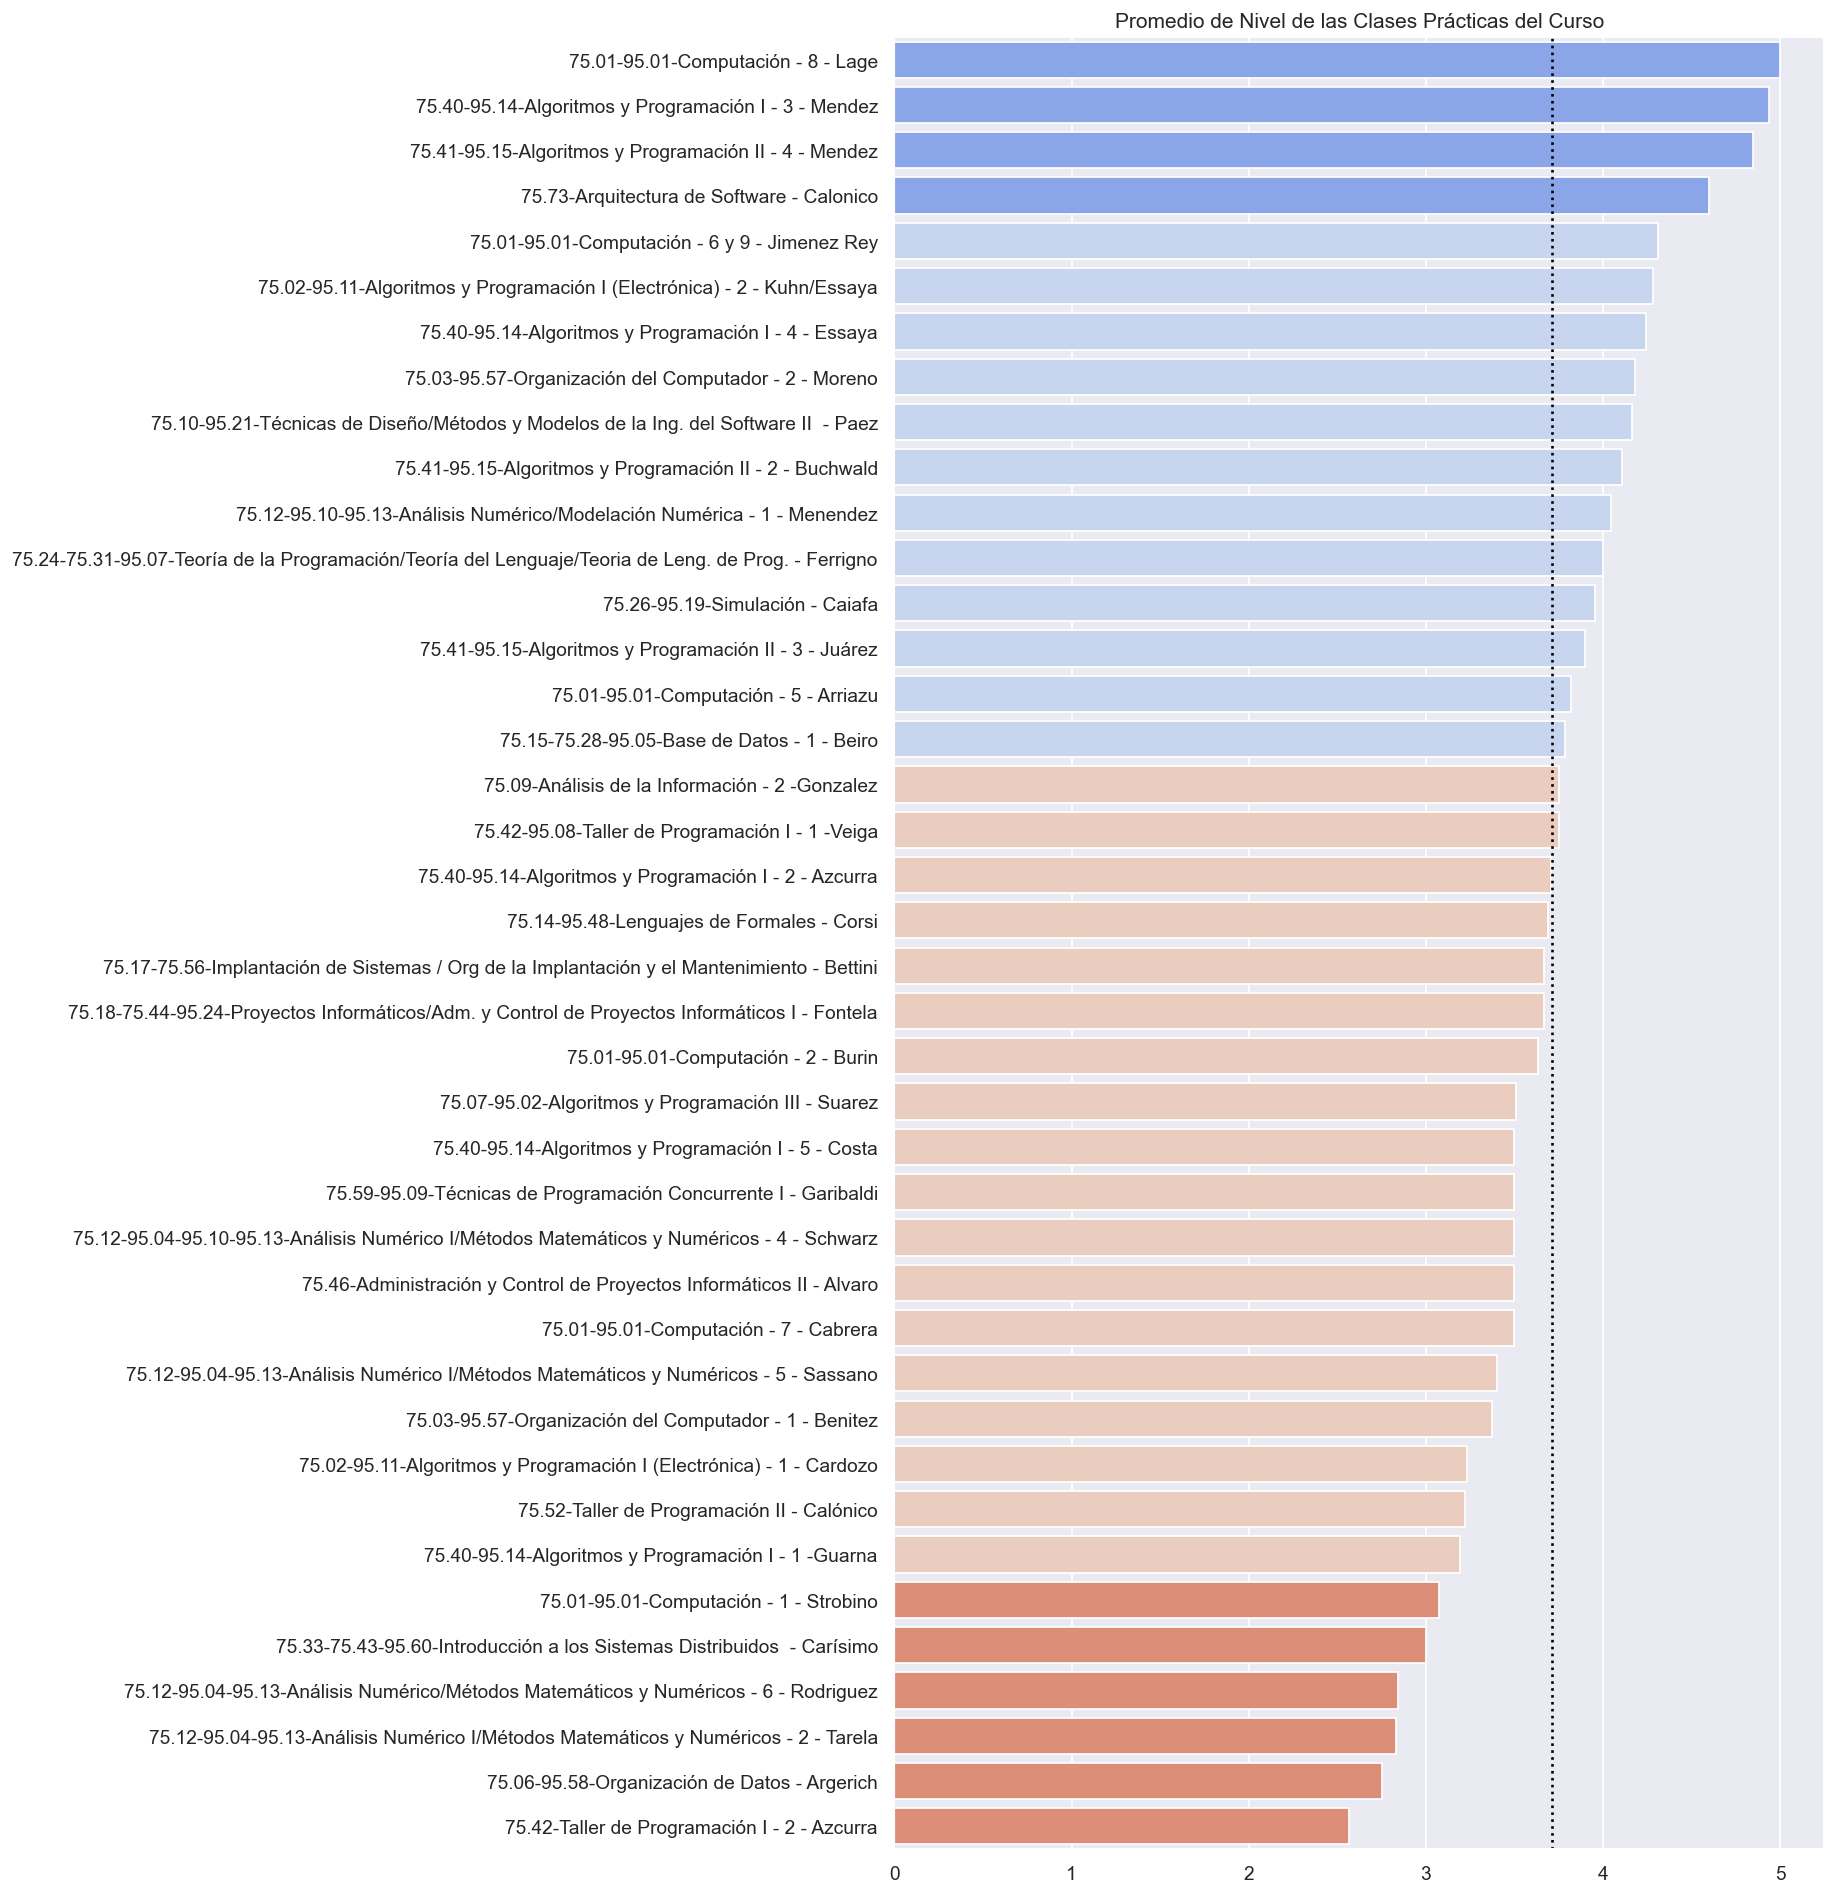

### Dificultad del Curso

Se analizan los promedios por curso de Dificultad del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

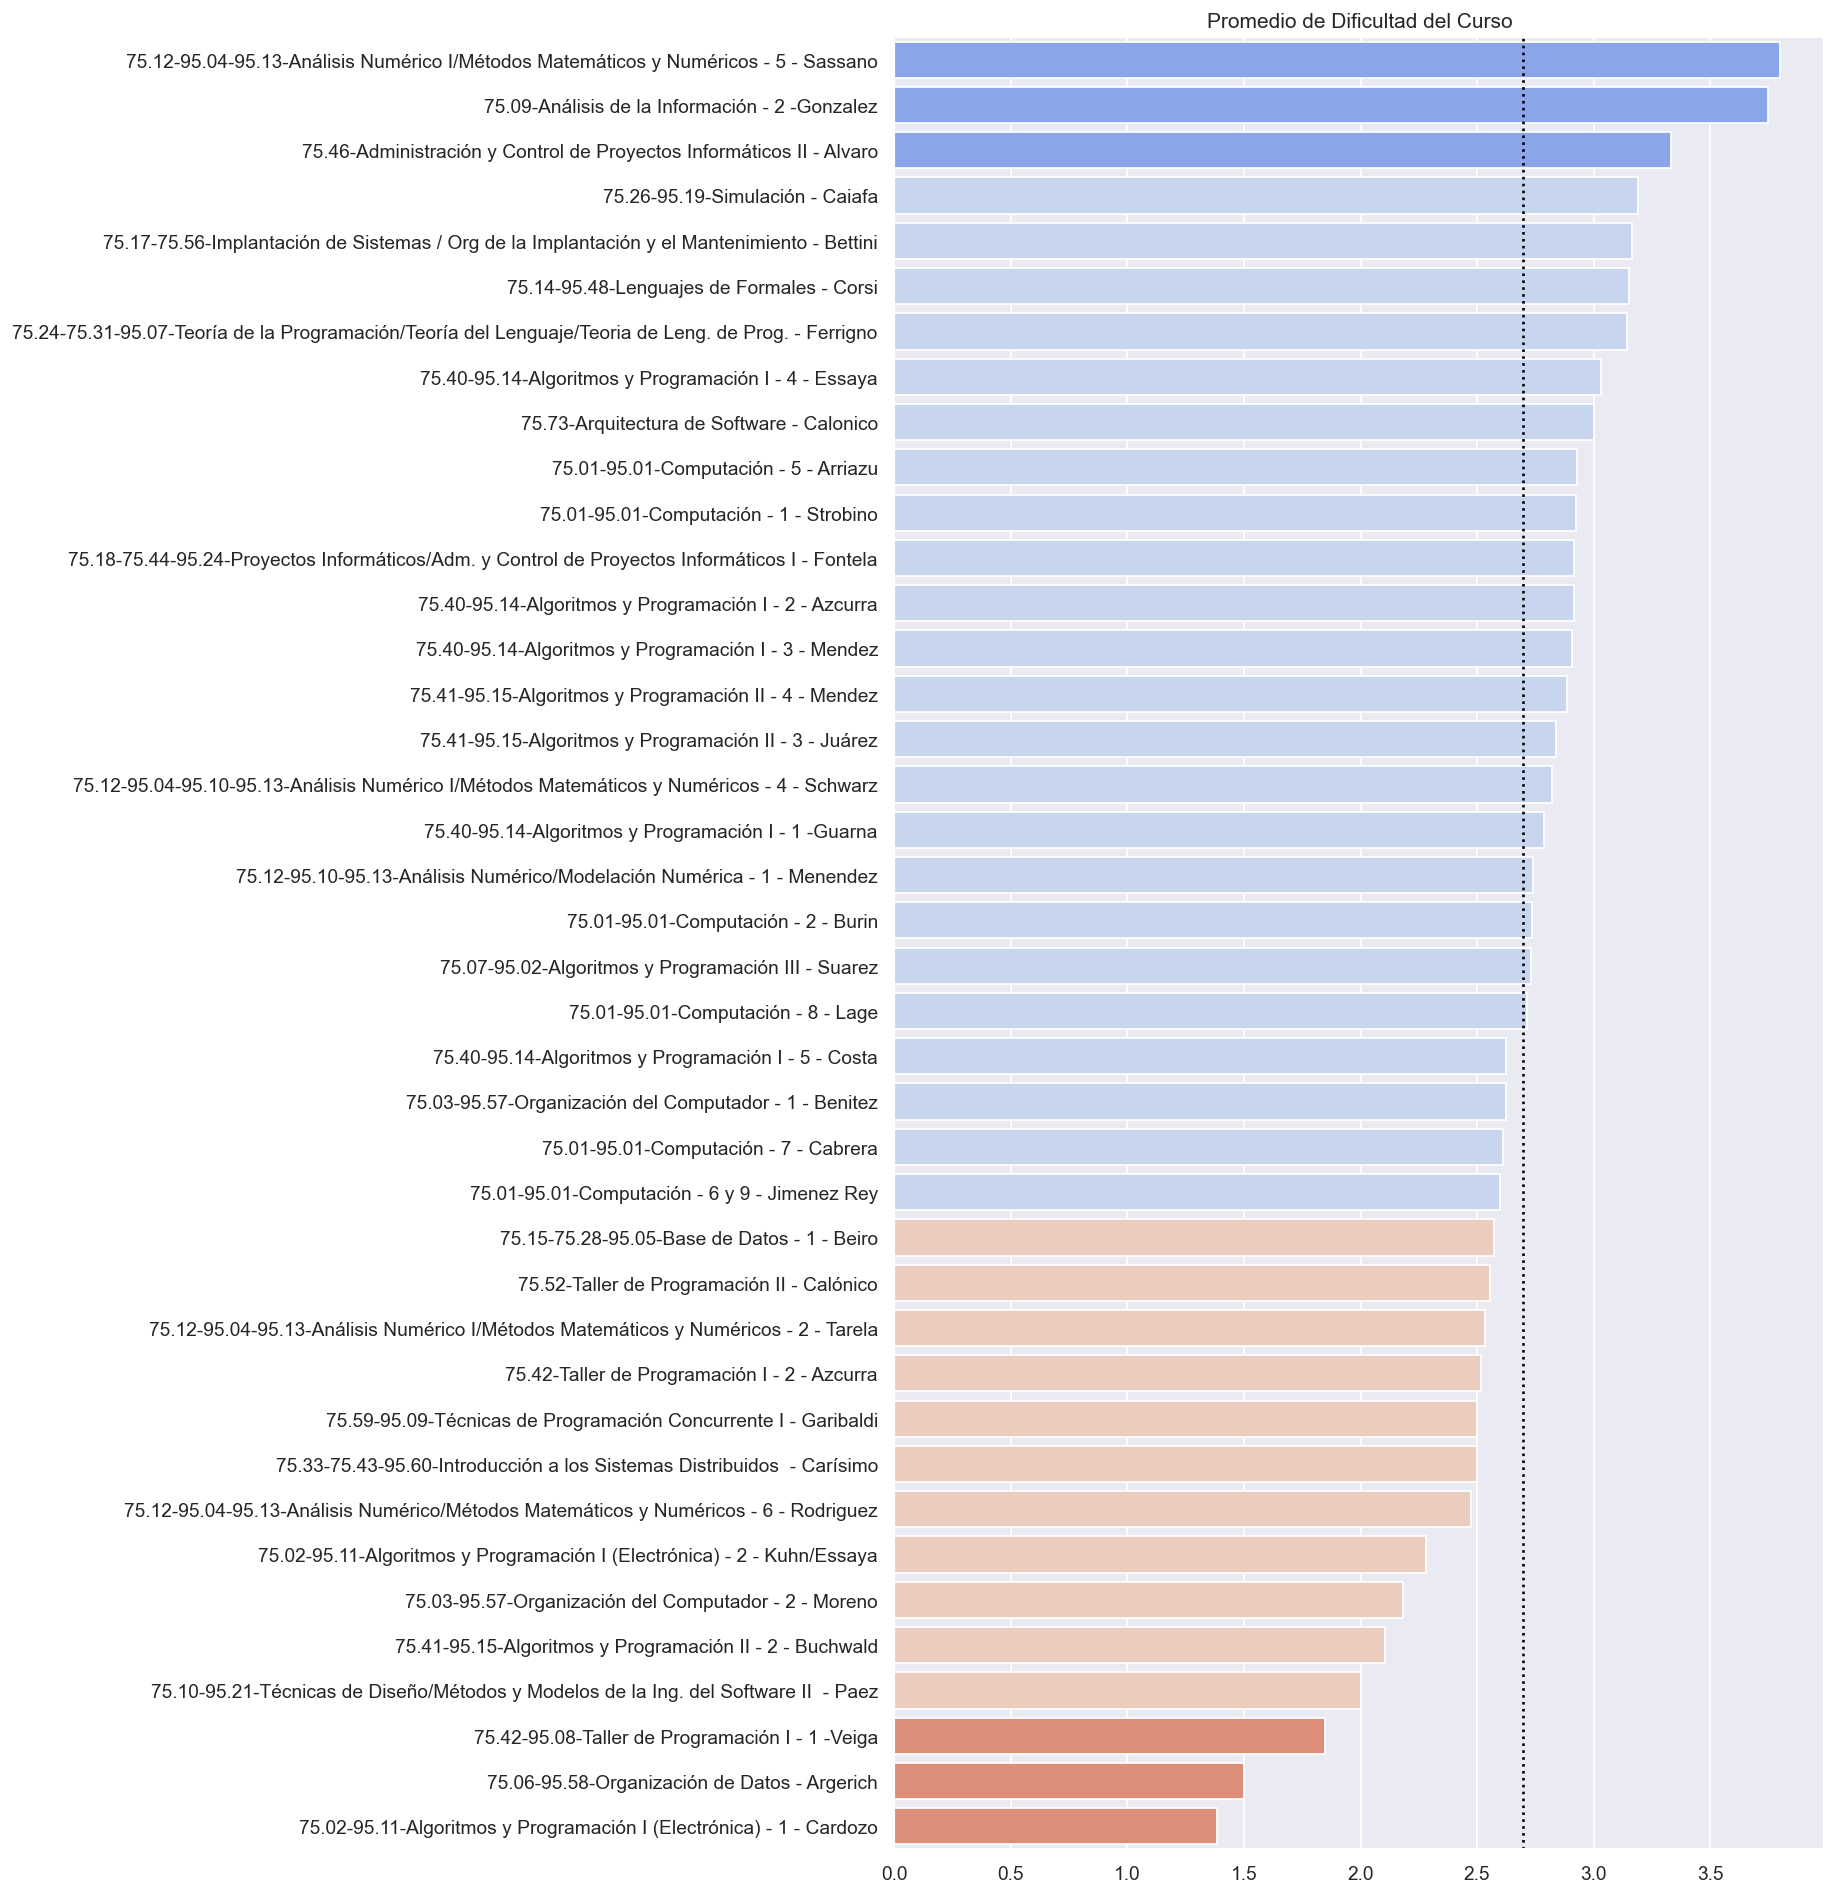

### Dificultad del TP

Se analizan los promedios por curso de Dificultad del TP. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

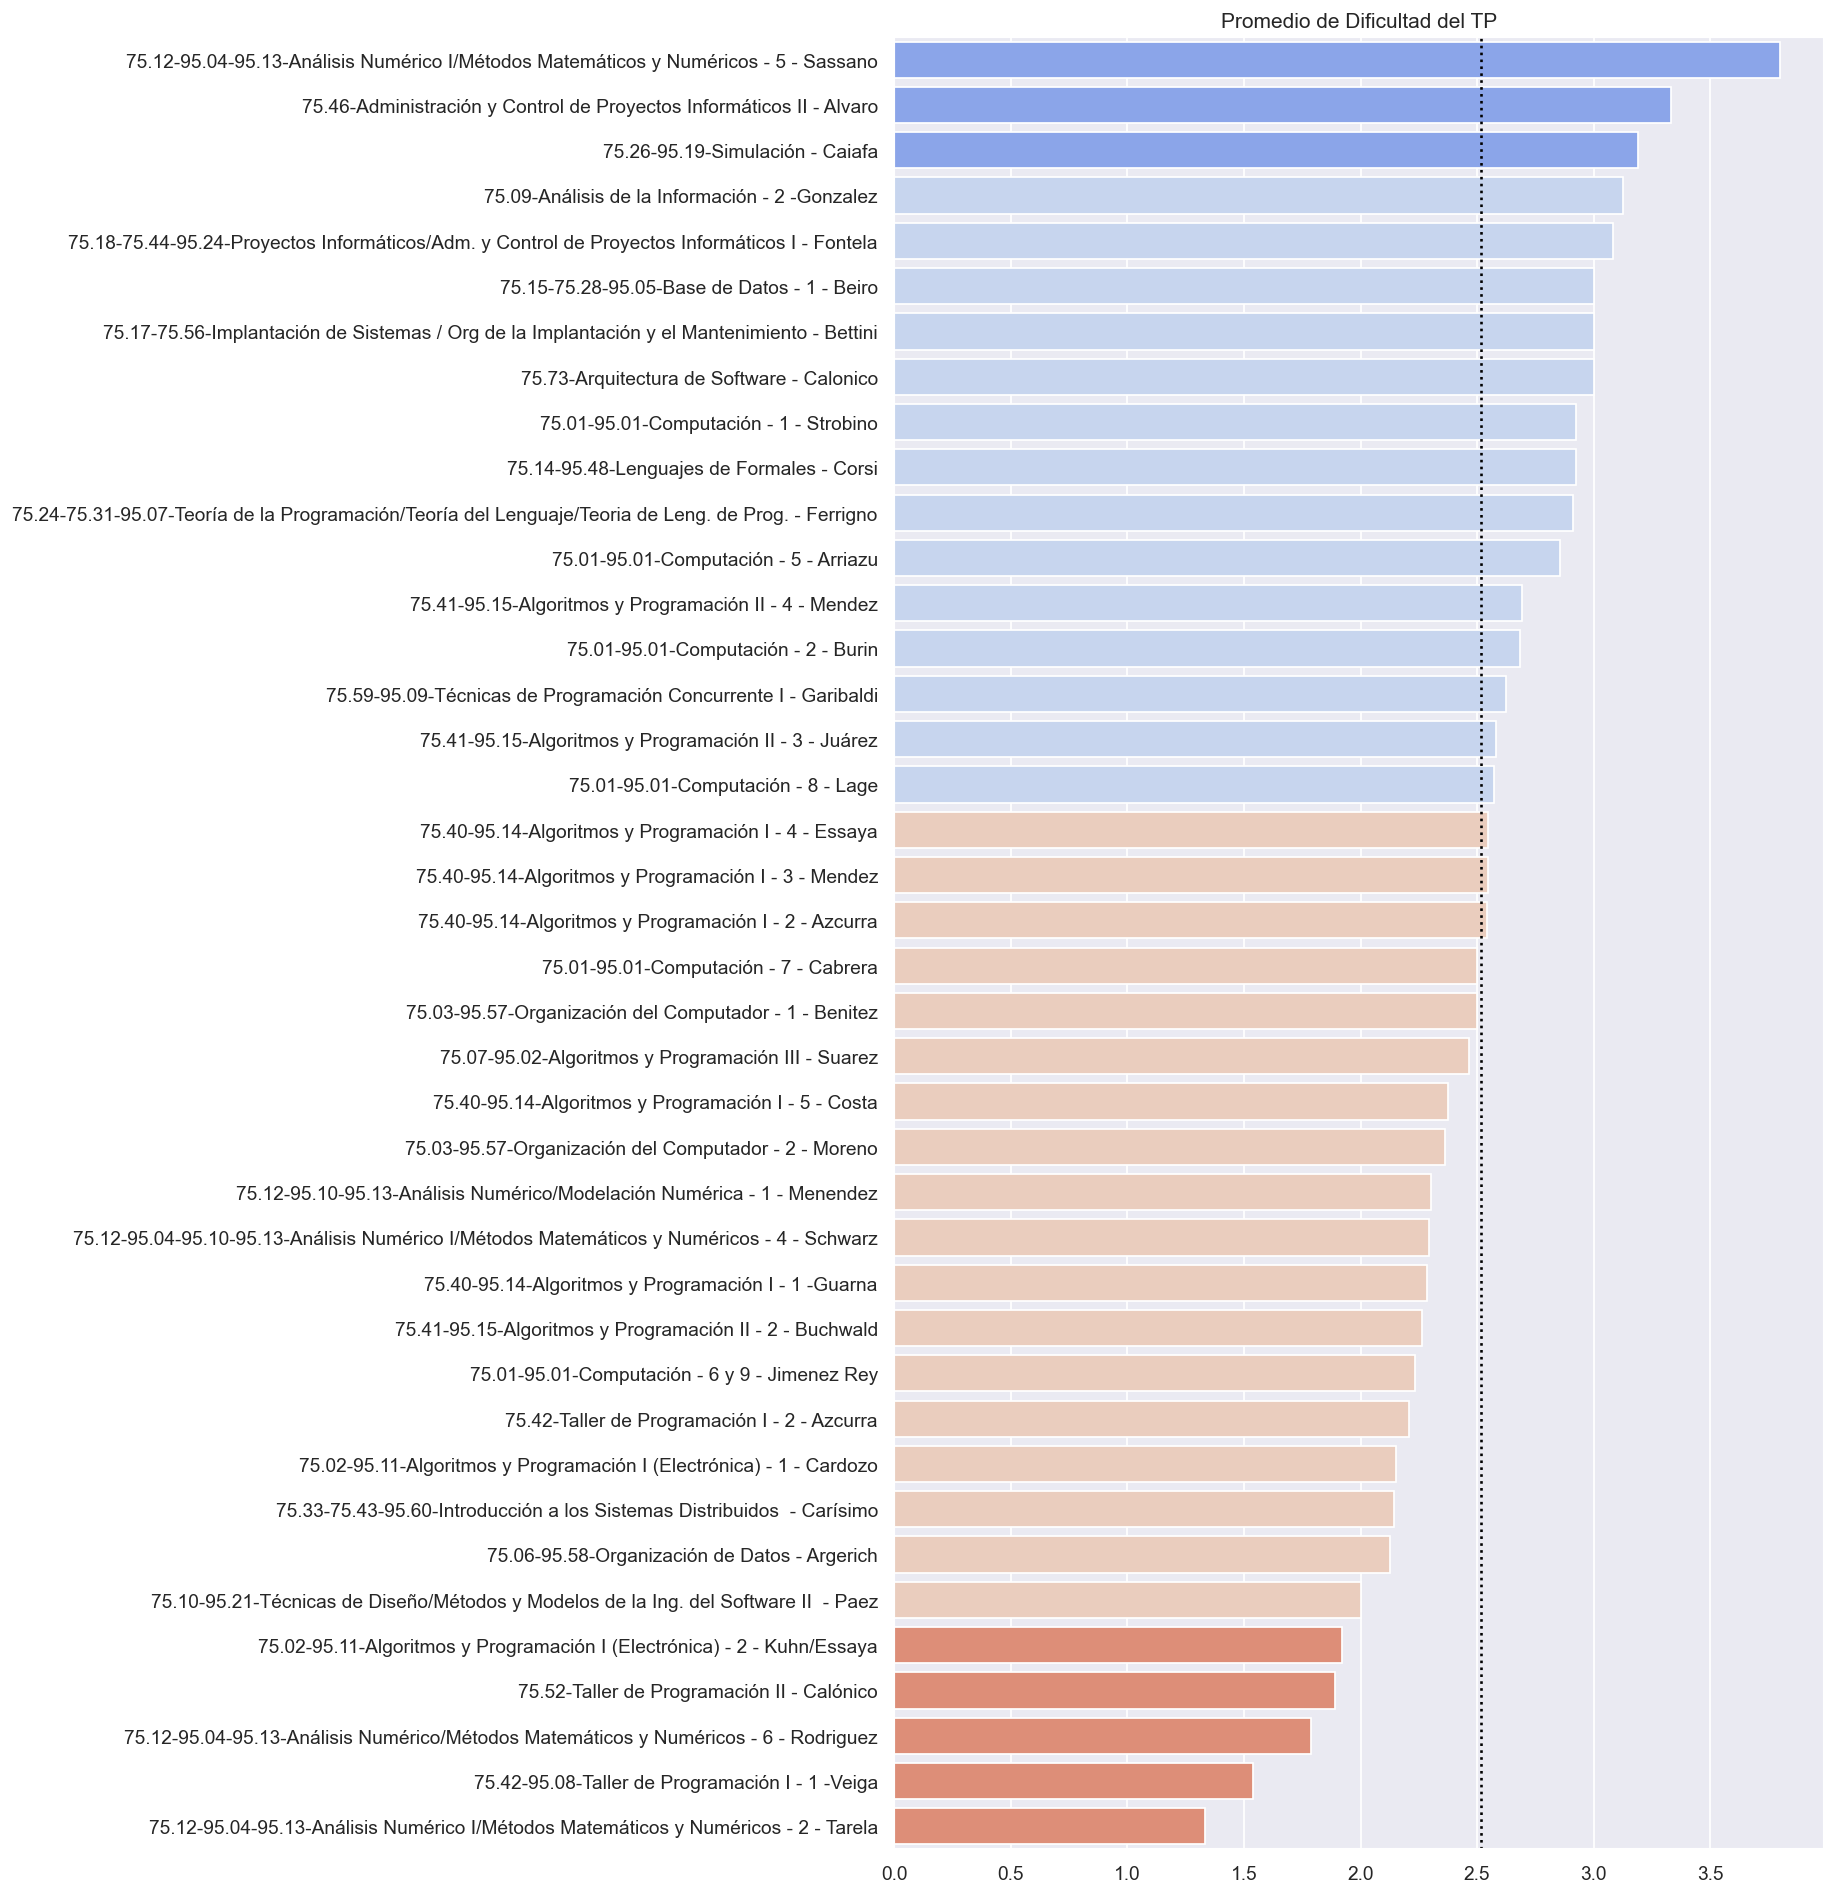

### Promedio nivel teóricas y prácticas

Se analizan los promedios por curso de Promedio nivel teóricas y prácticas. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

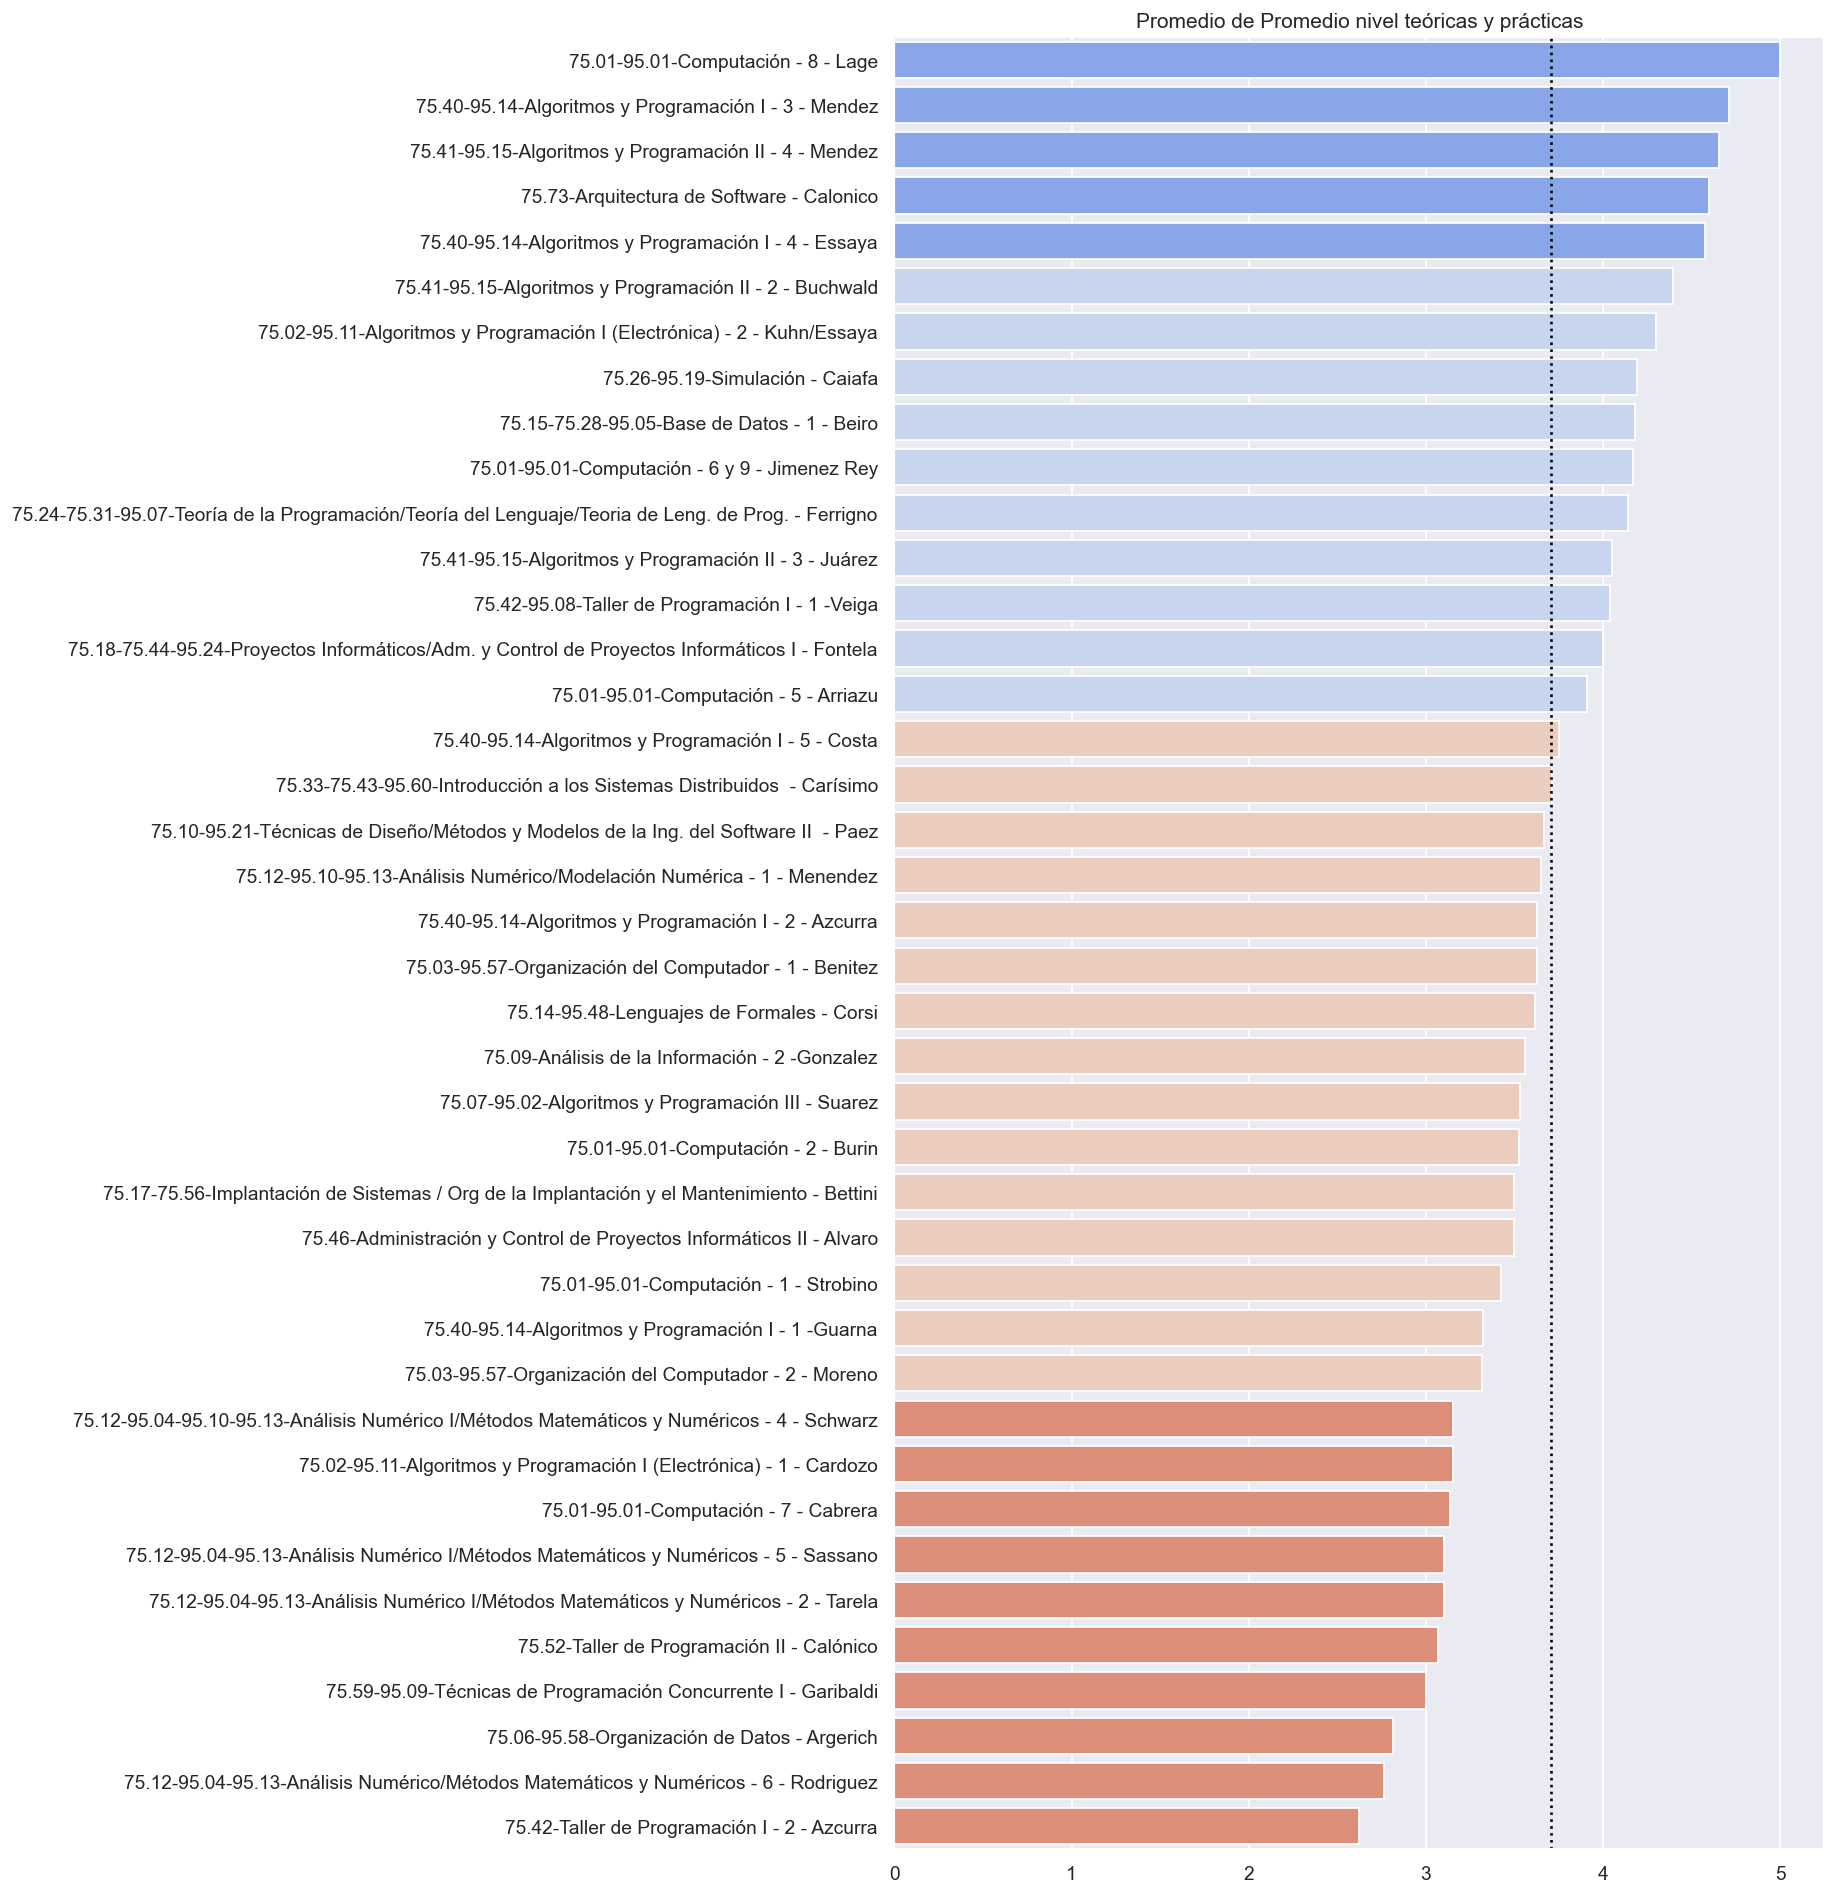

In [15]:
n_bins = 4

for col in num_cols:
    
    display(Markdown(f"### {col}"))
    display(Markdown(f"Se analizan los promedios por curso de {col}. Se dividen en {n_bins} contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores."))
    
    values = comp_5p_mean[col].sort_values(ascending=False)

    c = pd.cut(
        values,
        bins=n_bins,
        labels=sns.color_palette('coolwarm_r', n_colors=n_bins),
    )

    plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))
    ax = sns.barplot(x=values.values, y=values.index, palette=c.values)
    #ax = values.plot(kind='barh', color=c.values)

    ax.axvline(values.mean(), linestyle=":", color='black')

    plt.title(f"Promedio de {col}")
    plt.ylabel("")
    plt.show()

## Correlacion Entre Variables

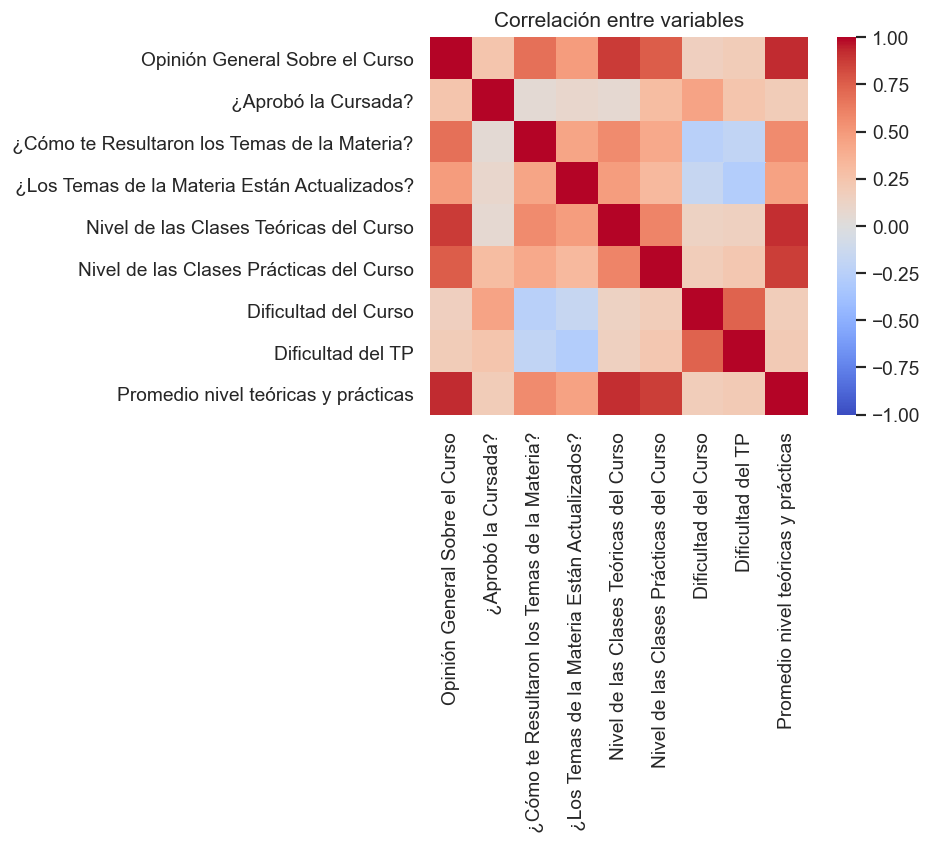

In [16]:
plt.figure(dpi=125)
sns.heatmap(comp_5p_mean[num_cols].corr(), square=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
- Hacia la derecha: Las clases teóricas son mejores que las prácticas.  
- En el centro: Poca o Ninguna diferencia.  
- Hacia la izquierda: Las clases prácticas son mejores que las teóricas.  

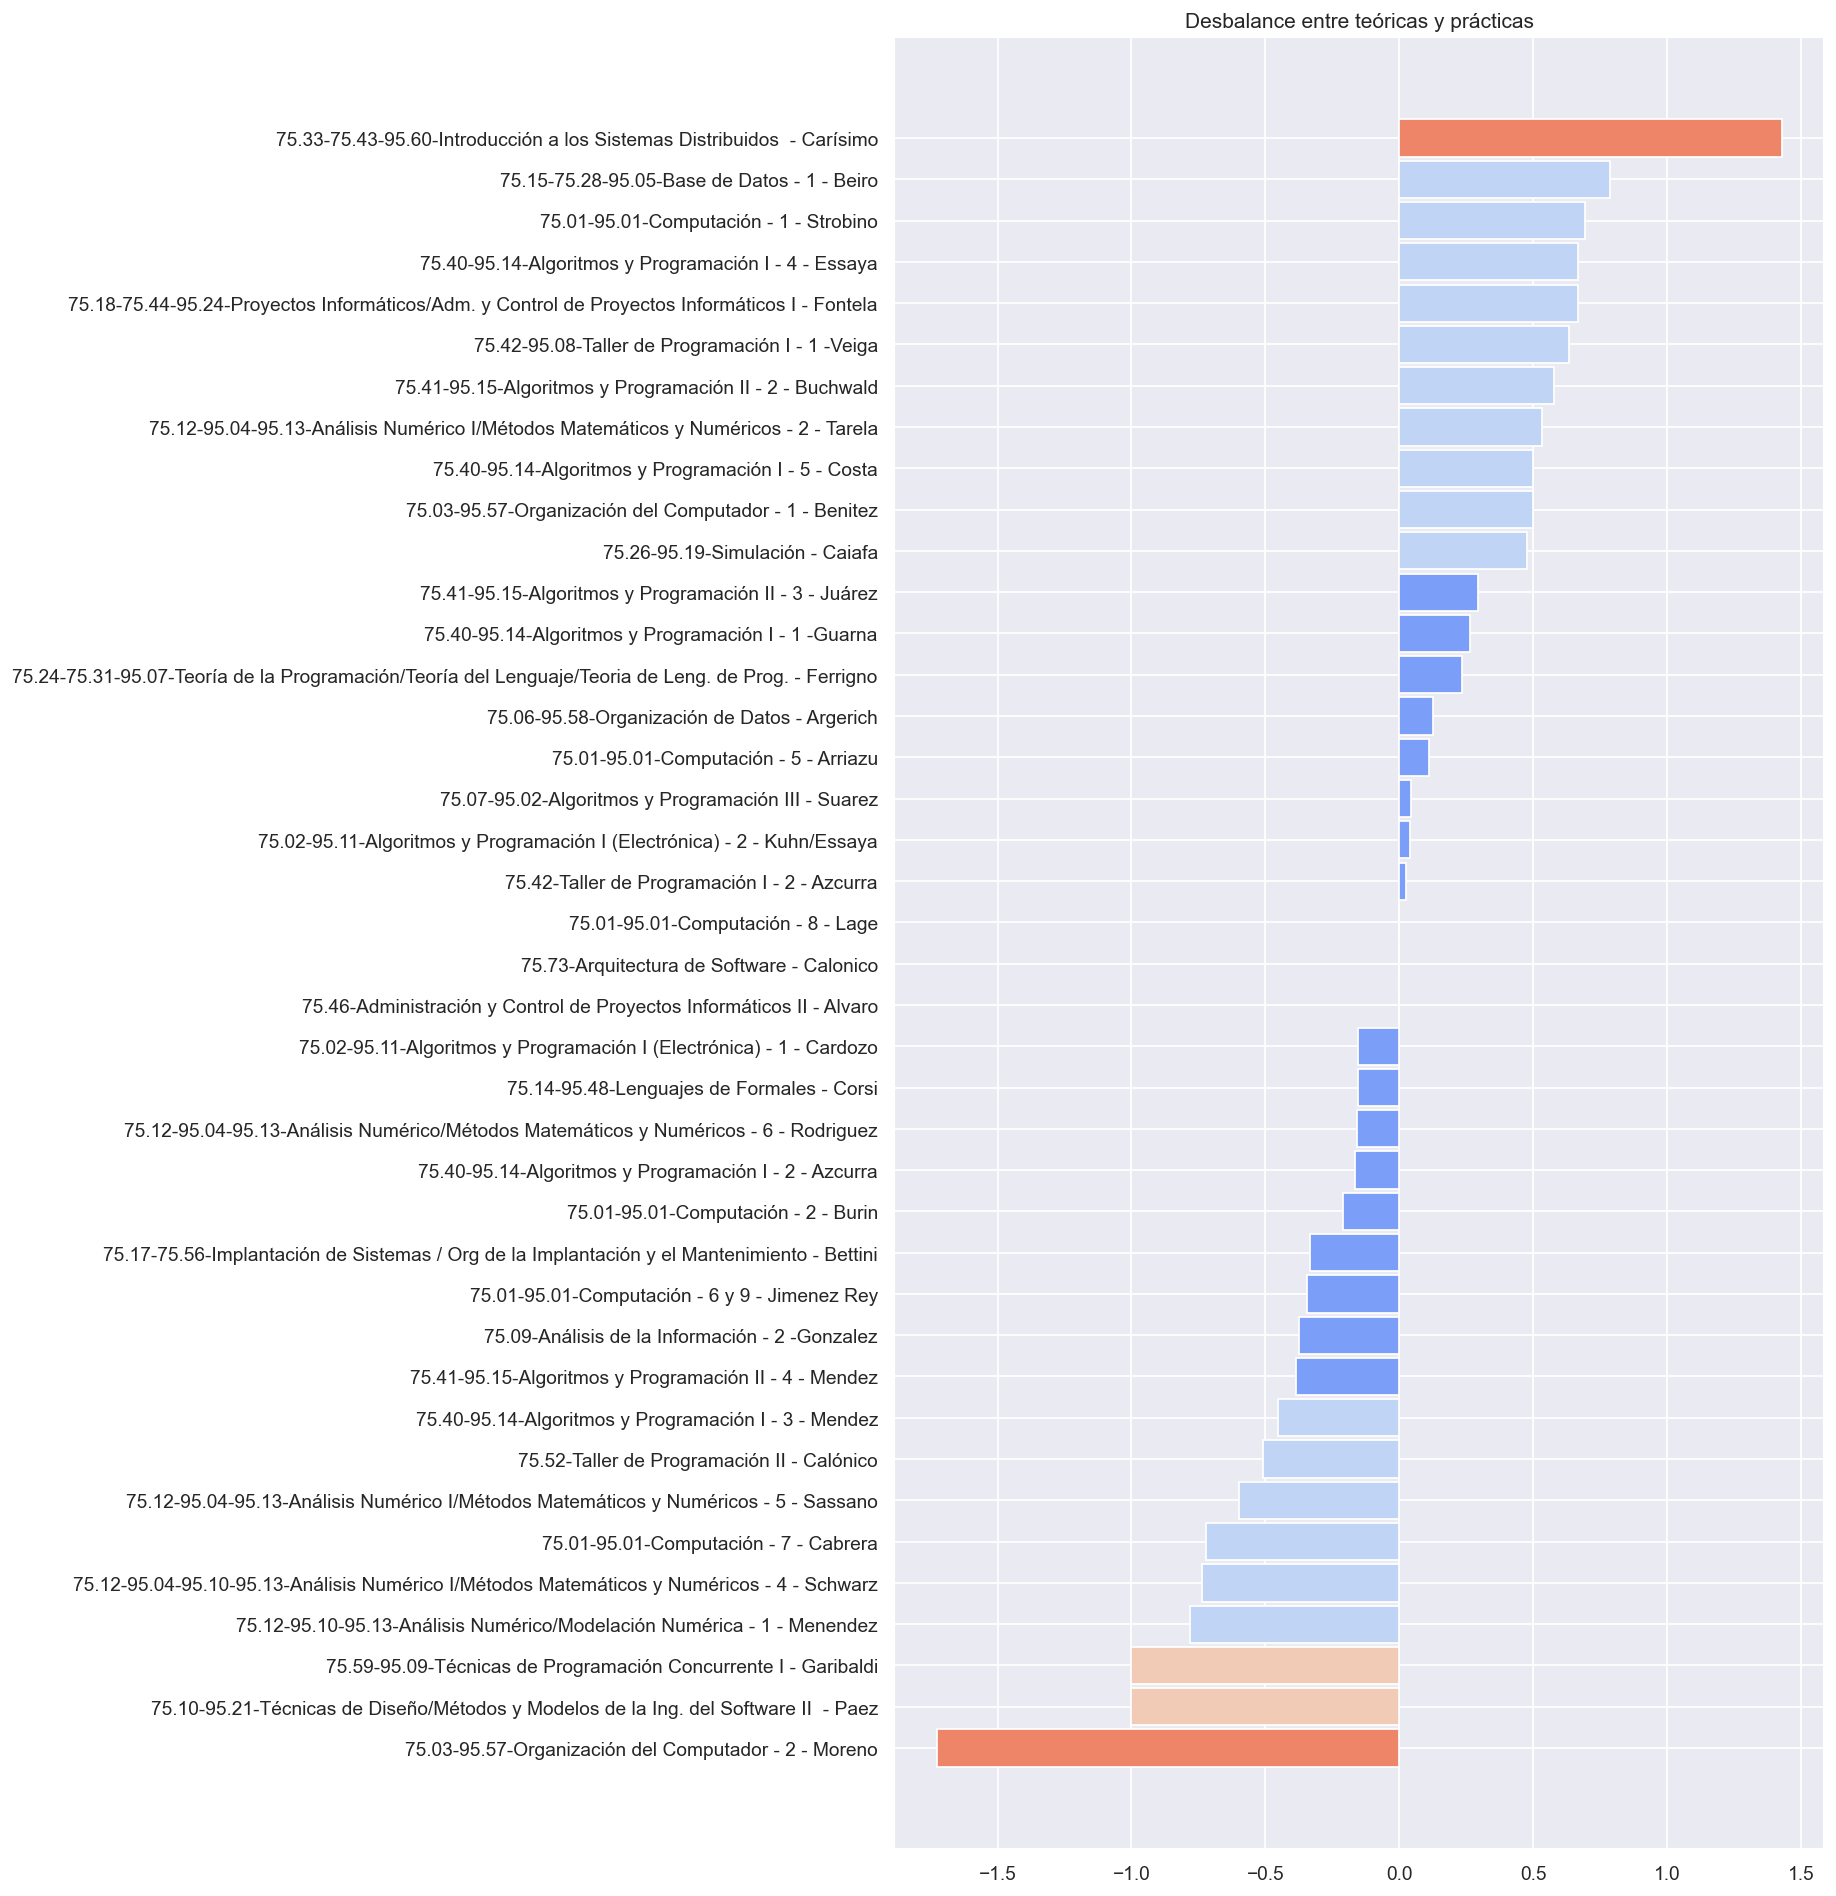

In [17]:
diff_teo_prac = (comp_5p_mean['Nivel de las Clases Teóricas del Curso'] - comp_5p_mean['Nivel de las Clases Prácticas del Curso']).sort_values()

plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

c = pd.cut(
    diff_teo_prac.abs(),
    bins=4,
    labels=sns.color_palette('coolwarm', n_colors=4),
)

plt.barh(diff_teo_prac.index, diff_teo_prac.values, color=c, height=0.9)

plt.title("Desbalance entre teóricas y prácticas")
plt.ylabel("")
plt.xlabel("")

plt.show()

## Emails

¿Cuánta gente completa el mail?

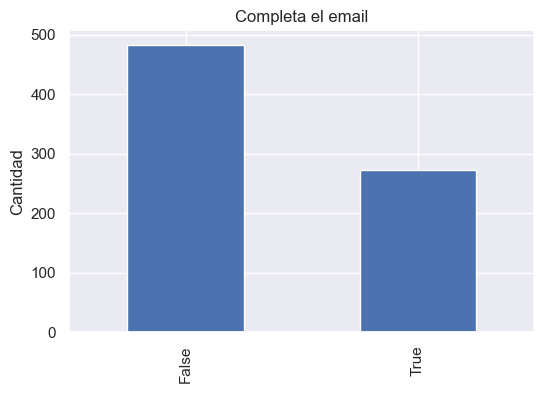

In [18]:
plt.figure(dpi=100)
(~comp['Email (opcional)'].isna()).value_counts().plot(kind='bar')
plt.title("Completa el email")
plt.ylabel("Cantidad")
plt.show()

¿Hay emails duplicados?

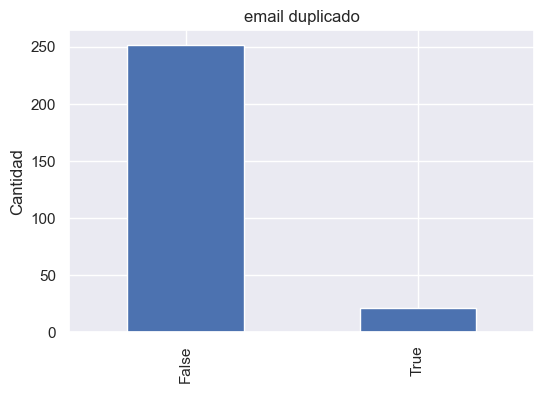

In [19]:
plt.figure(dpi=100)
comp['Email (opcional)'].dropna().duplicated().value_counts().plot(kind='bar')
plt.title("email duplicado")
plt.ylabel("Cantidad")
plt.show()

Quienes completaron el mail, ¿Permiten que se comparta al docente?

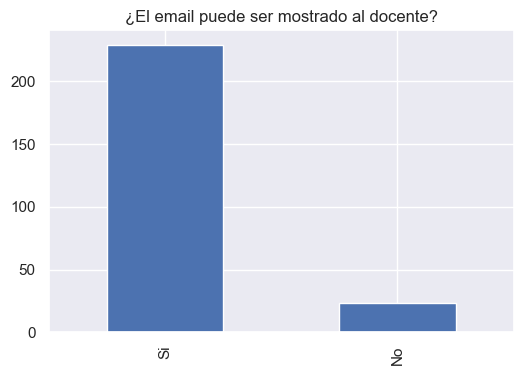

In [20]:
plt.figure(dpi=100)
comp[~comp['Email (opcional)'].isna()].drop_duplicates(subset=['Email (opcional)'])['¿El email puede ser mostrado al docente?'].value_counts().plot(kind='bar')
plt.title("¿El email puede ser mostrado al docente?")
plt.show()

# Comentarios por Curso

In [21]:
for curso in comp['Elige el curso'].unique():
    display(Markdown(f"## Curso {curso}"))
    com = comp[comp['Elige el curso'] == curso]['Comentarios sobre el curso'].dropna()
    if com.empty:
        display(Markdown("_No hay comentarios_"))
    else:
        display(Markdown("\n\n".join(f"> {x}" for x in com.values.tolist())))

## Curso 75.12-95.04-95.10-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 4 - Schwarz

> Hubiera estado bueno tener un calendario mas claro, para saber cuando y de que manera se nos iba a evaluar.

> Los profesores (profesor, jefes de tps, ayudantes, colaboradores, es decir todos) se mostraron muy comprometidos con el curso. Se preocuparon en organizar clases de consultas, subir videos teóricos y prácticos, y responder dudas en cualquier horario. Se nota que tienen bien entendidos los temas de la materia. Además, enseñaron varios temas de programación, sobre todo POO, que me resultaron muy útiles para una correcta realización de los trabajos prácticos de mi grupo.

> Los profesores (profesor, jefes de tps, ayudantes, colaboradores, es decir todos) se mostraron muy comprometidos con el curso. Se preocuparon en organizar clases de consultas, subir videos teóricos y prácticos, y responder dudas en cualquier horario. Se nota que tienen bien entendidos los temas de la materia. Además, enseñaron varios temas de programación, sobre todo POO, que me resultaron muy útiles para una correcta realización de los trabajos prácticos de mi grupo.

> El curso se adapto muy bien a lo que es la cursada virtual hubo muy buena predisposicion de los docentes para que el curso se llevara lo mejor posible y creo que se pudo lograr, los videos practicos eran de mucha utlidad para ir entendiendo los temas. Sin embargo note que en la parte teorica falto un poco, el apunte de clases era bastante denso y sentia que habia cosas de mas

> la teorica se basa en ver al profe leer unas diapositivas. los de la practica parecen tener criterios de correcion diferentes. La dificultad del tp dependia del grupo de porfes que te toque (si es que entendes el enunciado). hace preguntas si no estas justo cuado hay alguien conectado olvidate el campus no existe para ellos.

> Se adaptaron muy rápido a todos estos cambios y tuvieron muy buena predisposición siempre a atender nuestras dudas. Sentí que nos acompañaron muy bien durante todo el cuatrimestre. Gracias por el esfuerzo!

> Mala organización en cuanto a fechas de entregas o parciales, mismo aún no sabemos cuando son los finales. 

## Curso 75.46-Administración y Control de Proyectos Informáticos II - Alvaro

> Son temas y enfoques que no se ven en otras materias y ayuda mucho a entender que implica emprender

> Todo bueno, pero la parte de prototipado y tes de usuarios fue la mejor.

> Curso sencillo pero con una visión orientada al mercado y al prototipado. Algunas clases fueron bastante interesantes.

> Materia para los "entrepreneur" ladris

## Curso 75.33-75.43-95.60-Introducción a los Sistemas Distribuidos  - Carísimo

> Las clases teóricas creo que fueron excelentes, muy bien adaptadas a la modalidad virtual, sentí que no hubo diferencia con estar en el aula.
La práctica creo que también se adaptó bien a la virtualidad, pero igualmente creo que hay varios problemas no relacionadas con ésta. Lo peor sin dudas son los ejercicios semanales en el Campus. Hay preguntas *muy* ambiguas que hacen que uno se equivoque incluso sabiendo el concepto. También hubo diapositivas con errores, lo que hizo que muchos alumnos se equivoquen en ejercicios semanales, al seguir el método de resolución de las diapositivas.
Por otro lado, en el último TP se pide implementar cosas que no son del todo cubiertas en la materia (tal vez sí a nivel teórico, pero no a nivel práctico), lo cual lo dificulta. La situación empeoró cuando se hicieron varias consultas por Slack respecto del TP que no fueron respondidas. Y para terminar, las notas del último TP fueron entregadas un mes después de entregado el TP, cuando ya no teníamos clases (calculo que esto puede llegar a deberse por falta de docentes disponibles para corregir, pero igual creo que es mucho tiempo).

Más allá de las cosas malas, creo que también es justo destacar a Francisco, parte del equipo de la práctica. Personalmente, me pareció el mejor docente de la práctica. Demostró dominio sobre todos los temas que explicó, fue claro y siempre se preocupó por que se entiendan los conceptos.

> Una materia muy interesante para seguir en cada clase.

> El profesor se preocupa honestamente por que los alumnos aprendan. Muy buenos contenidos, relevantes y actuales.

> Las correcciones de los ejercicios y TPs me parecieron por momentos algo arbitrarias, ya que muchas veces los enunciados no eran claros y/o los resultados dependian de hipótesis no explicitadas y no había forma de argumentar las respuestas.
Me parece muy bueno el nivel de participación que logra y la impronta que le da Esteban a las clases teóricas.

> Buena organización de los temas. Muy bien explicado todo.

> Una materia muy interesante, las clases teóricas tienen una inmensa cantidad de contenido del cual previamente los alumnos venimos muy desentendidos y con conceptos erróneos.

Esteban es un gran profesor para la clase teórica.

Si bien las practicas son buenas, creo que les falta una vuelta de tuerca. 
Un ejemplo sería, tratar de mostrar ejemplos de ejercicios con casos bordes, sin embargo, fueron lo suficientemente correctas y muchas resoluciones de ejercicios de la práctica fueron revisitados a la hora de preparar el parcial y en esto ayudó muchísimo que los videos estén disponibles, ya que sino creo que el slack hubiera sido inundado de preguntas de alumnos.

Una sola cosa realmente negativa acerca de la práctica fue que solamente para el último TP (en los anteriores no sucedió), hubo muchas consultas de Slack acerca del mismo que quedaron sin respuesta.

Por "sin respuesta" me refiero a literalmente eso. Entiendo que hay cosas que tenemos que pensar por nuestro lado (y estoy de acuerdo) y que no tiene sentido que nos "spoileen" resoluciones, pero realmente quedaron preguntas que ni siquiera tuvieron la respuesta de "Esto estaria bueno que lo piensen ustedes".

> Las teoricas son supremas. Se explican los temas con un nivel de claridad excelente, el profosor se preocupa por que todos entiendan todos los temas, logra mantener una buenca comunicacion con los estudiantes tanto dentro como por fuera de la clase. La clase tiene buena dinamica.
Las practicas cumplen. No estan mal, explican los temas, pero a veces creo que deberian encarar con un poco mas de onda las clases.
TPs: el primero me parecio demas por lo sencillo y porque es un tema que se estudia mejor en otras materias, y no resulta central en esta justo. El ultimo me parecio un delirio. Adicionalmente, el tiempo de respuesta en slack para las consultas del mismo fue pauperrimo. No me ayudo a entender mejor los temas. Creo que podria ser util si se haria un trabajo de mas tiempo con ese material.

> El profesor no muestra su camara en las clases. No lo conozco, si lo veo en la facultad no se quien es. 
Los ayudantes dejan poco que desear, no me ayudaron en nada. 
No me sentí parte del curso, al contrario de las otras materias que hice este cuatrimestre. 
El profesor supuestamente esta abierto a sugerencias pero al mismo tiempo es poco lo que hace por los alumnos que tienen que aprender y aprobar. (Por ej muchas veces sugirio que al no tener un pizarron es muy dificil explicar los temas y por esa razon tal vez no lo explico del todo, o sea fue un leanlo uds del libro, o sea si quiero estudiar del libro entonces prefiero no asistir a las clases, al mismo tiempo conozco otros profesores que si buscan metodos efectivos para explicar temas complicados, como pizarras virtuales, etc.) 

## Curso 75.52-Taller de Programación II - Calónico

> La materia es un TP y un parcial, en el TP tenes que hacer una app de android que puede ser en Kotlin o React Native, más 3 servidores, uno de fachada y dos que hacen tareas mas especificas, pueden ser en NodeJS o Python. Despues las bases de datos pueden ser en PostgreSQL o MongoDB. Al principio puede parecer abrumador la cantidad de tecnologias nuevas que hay que aprender y la longitud del enunciado, pero al ser tecnologias de muy alto nivel se aprenden rapido y no es tan complicado como parece implementar lo que se pide. Las clases suelen ser una explicacion muy por encima de las tecnologias a utilizar, en algunas suben un ejemplo a github para que todos lo vayan siguiendo. Despues en el parcial te toman lo que se ve en las clases, suelen ser preguntas superficiales sobre las tecnologias (para que sirve y sus aspectos mas importantes), más un ejercicio práctico que es definir una api rest. Al final del cuatrimestre el grupo tiene que dar una presentacion corta sobre el desarrollo del trabajo práctico, se puede enfocar en lo tecnico o más en lo comercial (tratar de "vender" la app) o una mezcla de ambas, es bastante libre y no influye en la nota.

> No parece una materia de 4 créditos. El trabajo práctico requiere una dedicación MUY extensa para lograr un buen resultado.

> La materia se plantea desde el minuto cero como un gran proyecto que busca reducir la brecha entre las herramientas que se usan en las materias de la facultad y las que se usan en el ámbito laboral, y lo logra. Realmente aprendí un compendio de herramientas y cuestiones que son propias del día a día de la esfera laboral en el rubro, pero que en el ámbito académico no se terminan de explorar, o no se logra hacerlo con suficiente profundidad. Y quiero hacer hincapié en esto último: la dificultad del TP radica en su extensión y en cuán a fondo se ven ciertas cuestiones. Lo sufrí por momentos, pero lo disfruté también.
Si bien comprendo que esto puede ser difícil, y aún sabiendo que los ayudantes participan activamente en el seguimiento de sus alumnos, me parece interesante plantear instancias de revisión de código muy específicas. Hay algunas cuestiones que para la cátedra son esenciales. Estos temas se evalúan en el parcial, se explican en clases, etc. Me parece que sería super interesante que se planteen dos o tres instancias para los que los ayudantes brinden alguna especie de revisión de código. Ej: a la hora de definir la firma de los servicios API Rest, cuando se encara la funcionalidad core del TP en cuestión, ver cómo se levanta la infraestructura desde el Dockerfile, etc. De esta manera se pueden detectar errores conceptuales importantes y a la vez brindar ayuda específica en cuestiones que para la cátedra y la resolución final del TP pueden ser muy importantes

## Curso 75.15-75.28-95.05-Base de Datos - 1 - Beiro

> Excelente curso, las clases teóricas fueron excelentes. Las clases practicas en promedio fueron muy buenas, algunas destacaron y otras fueron un poco más densas. La dificultad del parcial me pareció justa, y si bien son muchos temas creo que las explicaciones fueron claras y me resultaron interesantes

> En las clases de Mariano se nota lo mucho que le gustan los temas y la bondad que tiene para con les alumnes. Es una persona muy teórica, sin embargo siempre encuentra la vuelta para bajar la teoría a tierra.
El nivel de las prácticas dependen mucho de quién las de. 

> Muy buen curso. Los docentes son excelentes. Predisposición y claridad a la hora de dar la materia

> Buen curso en líneas generales. Quizas cambiar un poco las clases para que no sean tan largas ni extensas en cuanto a temas. La gran contra (que nada se puede hacer) es el curso en solo un dia (miercoles). Pero mas allá de eso, buenos docentes, dedicados y correcto metodo evaluativo

> Excelente en todo sentido. Clave hacer los parcialitos y los talleres, te dejan muy bien preparado para rendir.

> Creo que es el mejor curso si te interesa aprender bases de datos.

> Muy buen curso, bien adaptado a la virtualiadad. Excelentes profesores.

> Muy buen curso, marino explica muy bien

> Excelente materia. Beiró es muy groso, se nota que sabe mucho! Las clases son llevaderas, aunque sean muchos temas, el explica tan bien que los temas se hacen mas livianos.

## Curso 75.40-95.14-Algoritmos y Programación I - 4 - Essaya

> Muy bien organizado, las clases teóricas de Diego son un 10 siempre con buena onda. Excelente el curso, lo recomiendo.

> Muy bien organizado, todos tienen mucha voluntad para ayudarnos y para que las clases nos sean útiles.

> Muy buen curso, muy buenos profesores, explican bien, responden las dudas en todo momento y hacen excelentes devoluciones en los TPs.

> Ya he escrito comentarios acerca del curso en una encuesta que ellos crearon. En resumen, 10/10. 

> Nunca había programado en mi vida, y en este curso aprendí un montón de cosas e incluso me terminó gustando programar, al principio me costó, pero logré adaptarme y disfrutar de esta materia

> Todo muy bueno pero a veces molestaba el tiempo de respuesta o correcion de los ayudantes.

> Muy bueno, lo recomendaria.

> El mejor  curso de algoritmos que existe, ojala pudiera cursar las demas materias de algo y programacion con Diego y los ayudantes, son lo mejor!

> Muy buenas las clases y las expliciones tanto las teóricas como las practicas(Alan).

> Muy buen curso, se dusfrutaba aprender y tener clase.  Se adaptaron muy bien a la virtualidad y los profesores se organizaban muy bien entre teorica y practica. Personalmente no tenia conocimientos previos y si bien el curso tenia cierto nivel de complejidad, aprendí mucho en la cursada y me fue una buena primera experiencia con la programación. 
 El sistema de evaluación que utilizan me gustó mucho y muy interesantes los Tps. 


> Excelente organización, fue un placer cursarla

> Se noto mucho todo el esfuerzo y cariño que metieron el profesor y los ayudantes en esta materia

> Se adaptó perfectamente a la modalidad virtual 

> Se organizaron muy bien en la virtualidad, no hubo ninguna complicación como las hubo en otras materias

> Es un curso de Algoritmos I muy completo y muy bien dado

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 2 - Kuhn/Essaya

> El curso supo adaptarse a la pandemia. Los docentes cumplieron el programa en el tiempo establecido. Explicaron muy bien. Excelente predisposición y muy pacientes. Agradezco a los ayudantes por su participación que fue de gran ayuda.

> Excelente trabajo de los profesores y ayudantes, siempre estuvieron a disposición y contestaron las dudas muy rapido y claro.

> Excelente curso, realmente se adaptaron a la modalidad de cursada a distancia y en mi opinión me resultó mejor que cursarla de manera presencial.

> Los tiempos de corrección eran muy desiguales de acuerdo con el corrector que tocase, mismo con los criterios de aprobación (de los tps).  A veces las devoluciones eran poco constructivas y de mal modo.  

> La mejor práctica que tuve hasta ahora en la facultad. 

> Muy buena adaptación a esta modalidad virtual. Muy buena predisposición de los profesores y ayudantes para acompañarnos a lo largo de la cursada. El discord de la materia fue muy útil a la hora de tener problemas ya sea con ejercicios, tps, parcialitos y hasta problemas con el sistema operativo.

> La combinación essaya-santisi es lo que esa cátedra necesitaba. Excelente.  Poray se nota que es una cátedra nueva"" y que si bien se llevan bien, faltaría un poco más de relación entre essaya y santisi tipo para ir mas en sintonía. Da la sensación que se tratan lo justo y necesario.
Igual de 10. Si se afianza esa confianza entre profesor de práctica y teórica la rompen!

> Le ponen mucha onda a la materia y la hacen entretenida y disfrutable. Explican muy claro y siempre están dispuestos a responder cualquier consulta.

> 100% recomendable

> Me gustó mucho el curso, me sentí motivado a dar todo lo que pude entonces. No podía estar presente durante la clase por superposición con el trabajo pero después me daba un tiempo para ver las clases. Sin embargo, me faltó consultar y practicar mucho más.

> El curso es espectacular. Diego introduce y explica los temas de una forma muy clara y didáctica, realmente dan ganas de entender y prestar atención. Las clases de Sebastián son esenciales para terminar de comprender y madurar el tema, realmente te hace pensar para que el tema se entienda al 100%.  

> Lo disfruté mucho. Se nota el esfuerzo y el trabajo de los profesores. Muchas gracias!!

> Los temas son complejos para los que no vimos programacion. Sin embargo los profesores lo hacen muy llevadero e interesante. En ningun momento la cursada se volvio tediosa. Ademas los profesores nos dieron multiples recursos para consolidar los temas.

> Excelente curso, en mi opinión el mejor para electrónica 

> Creo que la dificultad se la atribuyo al poco tiempo dedicado a la explicación de los primeros temas. Opino que son lo mas importante para poder arrancar bien.

> Muy bien explicado todo, con especial atención a temás básicos respecto de la calidad de software y mucha presencia en temas necesarios para la carrera de electrónica como operadores de bits y TDAs.

## Curso 75.26-95.19-Simulación - Caiafa

> Los temas de la materia son muy interesantes, es una de las mejores optativas que hay dando vueltas. No tengo queja alguna con el desempeño de los docentes, las clases, tanto teóricas como practicas, están muy bien dadas.
Es una de las materias que mejor se adapto a la cursada virtual, hicieron un gran trabajo en ese marco. 
Totalmente recomendable cursarla.

> Es muy recomandable, los temas son interesantes y la cursada no es muy pesada.

> Carlos le pone onda pero cada tanto se tildaba con explicaciones medio simples

> Las clases quizá se hacían un poco largas pero estuvieron bien. Los docentes siempre estuvieron dispuestos a ayudar

> Los parciales y el tp son fáciles dentro de todo. La cursada se hace un poco aburrida y las clases un poco largas, pero los profesores le ponen la mejor.

> Perfecto las teoricas. Las practicas podrían ser algo mejores.

> Muy buena materia con contenidos muy interesentes para ver la programación aplicada a otros temas.

> La profe esta re buena

> Muy interesante y bien dictado. Se siguió el cronograma de manera perfecta casi.

> De las materias optativas que cursé fue la mas interesante. Me tocó cursarla en modalidad virtual y creo q las clases se desarrollaron perfectamente y de forma organizada. Los profesores siempre estuvieron bien predispuestos a resolver dudas.

> Estoy muy agradecida por la predisposición de los docentes, fue una cursada super agradable. Los TPs fueron interesantes y el parcial coherente con lo visto en clase. 

## Curso 75.03-95.57-Organización del Computador - 2 - Moreno

> Es un curso dificil, lleva muchisimo más tiempo de lo habitual y casi que es la unica materia que puede hacerse. Me parece excesivo

> Buen curso, muy buenos contenidos y los profesores explican bien dichos temas.

> Más allá de que la calidad de las teóricas en vivo se vio afectada por problemas de conexión, encontré los videos menos que suficientes para aprobar el curso, viendome obligado a cambiar la teórica por leer directamente el libro. Agregar un tp la última semana de clase, que nisiquiera compilaba, me parece un abuso y falta de respeto al alumnado. No solo el tp no compilaba como se nos fue dado sino que no era suficiente para probar funcionalidades que se pedia implementar.

> Temario actualizado e interesante. Los profes muy atentos.

> Mucha falta de organización

> En lo personal, las clases teoricas no me ayudaron, las practicas si.

> Excelente curso, llevaron adelante la cursada muy bien a pesar de contexto y trataron de que podamos aprender todos los contenidos de la manera mas clara. La dificultad está en el trabajo doble que tenemos que hacer nosotros para poder entender. Por suerte los profesores respondían consultas via mail y con clases de consultas y todas las clases estaban grabadas para poder volver a verlas que eso es clave sobre todo para los tps y ejercicios de parcial, ademas de que todos los temas tenían videos explicativos.

> Excelente curso en comparación al de Benitez. Los temas son súper interesantes pero la materia es asesina y requiere muchísima dedicación y tiempo. 

> los contenidos estan muy desactualizados

> Temas muy interesantes y trabajos prácticos entretenidos. Los profesores tienen buena predisposición y son flexibles con las fechas de entrega. 

## Curso 75.07-95.02-Algoritmos y Programación III - Suarez

> Buen curso, intenso hasta la mitad del curso, después del parcial bajan bastante el nivel, y casi dejan de dar teóricas en vez de aprovechar bien el tiempo. Pero le ponen voluntad y con la herramienta Slack se maquilla esto. Tendrían que dar clases más tiempo, sobre todo los martes ya que hay temas que no se cubren y en el TP2 se sienten mucho (y da el tiempo).
A pesar de esto, en general lo recomiendo.

> Faltarian mas docentes, este cuatrimestre por la cantidad de alumnos se les complico para tema correcciones de tps/ parcial.

> La curse el cuatri pasado y fue un desastre, este mejoraron bastante aunque al final se dejaron estar un poco. Pero se noto el cambio y el esfuerzo

> Para la segunda mitad de la materia sentí que vimos muchos temas por arriba, que no se si es lo mejor. Creo que reducir un poco el temario y aumentar un poco la profundidad seria mejor? mas que eso ninguna queja.


> Me pareció muy bien en general. Se adaptó bastante bien y rápido a la virtualidad. Se subieron videos para ver antes de las teóricas y después se tenían las clases teóricas y practicas por meet. Tuvo varios problemas de organización y tiempos, mayormente relacionado con la cantidad de alumnos que había para los pocos docentes disponibles. Las correcciones tanto del TP1 como del parcial tardaron bastante. El parcial tuvo una dificultad justa, los TPs fueron bastante intensos. Las últimas dos entregas del TP2 fueron muy exigentes, creo que se podría haber presentado una semana antes y así tener una entrega más intermedia. Los temas me parecieron muy interesantes y bien explicados, y todos los docentes me parecieron buena onda, tanto de la teórica como de la practica. Siento que aprendí mucho. Fui a la practica de la tarde, con Yolis.

> En lo personal, algunas clases practicas se me hacian un poco pesadas.

> Muy bien los profesores, se acoplaron a la cursada virtual excelentemente.

> No me gustaron las practicas de la tarde. Recomiendo ir con Tomas y Diego

> Ninguno en especial

> Excelente. Lo único malo que ví fue que eramos muchos alumnos (cerca de 200) entonces los tiempos de corrección se alargaron

> La objetividad no existe y las correcciones las hacen como quieren, además de tenerte un mes para decirte si aprobaste o no el parcial. 

> No existe un consenso entre los docentes para determinar si un parcial esta aprobado o no. Literalmente es un "lo que toca toca". X profesor te puede aprobar el parcial, pero Y profesor te puede desaprobar el mismo parcial. Mínimo se deberían plantear los fundamentos básicos que hacen que un parcial este aprobado o no, teniendo en cuenta los distintos enfoques que se pueden plantear frente a un problema. No todas las personas razonamos igual, si se plantea una idea distinta a la que se le ocurrió al corrector, en vez de directamente desaprobarlo  debería tomar en cuenta que el enfoque entregado pruede también ser correcto, no se puede esperar que se entregue lo mismo que el corrector pensó. El comentario también va para el primer TP porque tampoco se les informa a los alumnos, previamente a entregarlo, quien va a ser el corrector, y como en este curso es muy "la nota depende de quien te toque" entonces mínimo que se le informe al alumno quien le va a corregir para aplicar en los tps el enfoque que "prefiere el corrector". 

> muy buen curso. haría falta más profesores/ayudantes ya que las correcciones tomaban mucho tiempo.

> En mi opinion lo mas significativo a hacer notar es que cada docente tiene una vision diferente de si algo esta bien o mal, lo cual influye enormemente al momento de corregir. Una solucion seria adaptarse al criterio de quien te corrige... pero esto nunca se sabe de antemano (a excepcion del ultimo tp); es por esto que tu nota resulta una loteria. En el futuro seria mas conveniente que unifiquen criterios entre todos o que informen al momento de dar el tp quien lo va a corregir.

> Muy buen curso, los profesores de la teórica son unos genios.

> Excelente. Los docentes dominan los temas y el flujo de la clase es buena.

> Le falta personal. El esfuerzo que realizan es evidente, pero hay demasiados alumnos lo cual resulta en mucho retraso en entrega de parciales. Tienen que haber más docentes y más cátedras en Algoritmos y Programación III.

> Excelente predisposición de los profesores, realmente saben enseñar.

> Muy interesantes los temas de la materia. 

> Se adaptaron bastante bien a la situación y la cursada fue muy amena. Fue una buena cursada.

> Se notó la falta de docentes en los tiempos de corrección. Hubo gente (condicionales de electrónica) que quedaron fuera de la materia.
 De todas maneras ya son 8 personas y a predisposición de todos fue genial, pero es una realidad que es demasiada gente (250 personas el primer día).

> muy buen curso, cuatrimestre medio extraño por lo que se hace mas dificil dar una opinion mejor formada. Creo igual que se supieron manejar bien 

> Muy bien manejado, el acompañamiento constante de los profes fue esencial para entender los temas y las teóricas fueron muy llevaderas.

> Los profesores de la práctica iban demasiado rápido. El tiempo que consumió el TP grupal fue demasiado, tuve que atrasarme en otras materias para cumplir con las entregas.

> Menos mal que el MLI abrió un curso nuevo! Este no da para más, es realmente muy malo. Honestamente, pregunto, no les da verguenza?

Primero, la materia está completamente desorganizada. Vemos lo más importante en 2 semanas, para después al final del cuatrimestre rascarnos a dos manos.

Tardaron casi un mes (25 días) para corregir el TP1 de SMALLTALK y la semana de reentrega terminó coincidiendo JUSTO con la semana del parcial, que teniendo un mes de diferencia en el medio y siendo un TP cortito podría haber sido re evitable. Dos semanas antes, avisaron que la fecha del parcial iba a ser el 23 de Junio. Una semana antes de la fecha, lo corrieron al 30 porque no llegaban con las correcciones de los TP1. Luego, para colmo, el tema de que cayó todo en la misma semana.

Las correcciones del TP encima fueron patéticas, me han corregido mejor el código en Algoritmos I que en este curso. Y además, parecía que algunas de las correcciones estaban ahí simplemente porque no sabían qué más agregar.

Las clases nunca son "formales", siempre "en criollo", como decían en la teórica. Esto es, nunca dan definiciones formales o explican algo de manera concreta. Siempre es todo en el aire, explicado mal, poco técnico, y justifican con que "estas cosas las pueden encontrar en cualquier lado de manera formal". La función de la clase es que vos me des algo que yo pueda llevarme, una definición concreta, técnica, como le quieras llamar.

Las presentaciones son 80% memes. Muy poca información que de verdad sirva. 

En el primer TP una amiga aprobó con 8 usando una técnica. Cuando pregunté por esa misma técnica, otro docente me dijo que hacer eso era muy turbio y dio a entender que no se podía usar. No tienen criterios de corrección homogéneos. 

La metodología de "1 entrega y 1 reentrega" funciona realmente mal. Empezando porque los docentes no saben responder las dudas y toman al TP como una instancia de evaluación y NO de aprendizaje, que es lo que al fin y al cabo es un trabajo práctico. Entonces obvian decirte ciertas cosas "para que las pienses" pero en realidad te están dejando a la deriva en algo que realmente no entendés y al mismo tiempo tenés una sola reentrega y te quedás libre. 

Los profesores el día del parcial horas antes, en vez de contestar dudas, contestan los mensajes de los alumnos con memes y luego se llaman al silencio.

Tampoco saben implementar el modelo del TP que se da para hacer, entonces en vez de orientar y ayudar terminan desorganizando y confundiendo.
Lo mismo pasó con el simulacro del parcial, en donde un docente de la práctica de la tarde hizo algo de una manera que luego a una compañera, cuando lo hizo así en el parcial, le dijeron que estaba mal.

> Tienen que abrir otra cátedra para esta materia, no puede ser que con una asignatura clave para la carrera de Informática/Sistemas estén escatimando en abrir más cátedras. 
El curso de Suárez es el único y está rebalsando de estudiantes, no dan a basto, y mientras tanto la gente del Departamento se anda tomando el lujo de poner todos los palos en la rueda posibles para dificultar la apertura de nuevas cátedras. Esto no es algo nuevo. Completa burocracia, una vergüenza para la casa de estudios en la que están.

> me gusto bastante 

> Materia muy interesante.
Trabajos prácticos difíciles en los cuales se aprende mucho.

> Un curso muy preparado respecto al material teórico y práctico recomendado. 

## Curso 75.24-75.31-95.07-Teoría de la Programación/Teoría del Lenguaje/Teoria de Leng. de Prog. - Ferrigno

> Me pareció una excelente propuesta la del tp.

> Muy interesante !!!

> Muy buena onda de los profes genera un buen ambiente asi que eso se agradece

> Muy buena materia. Creo que los temas con muy relevantes ya que se los suele pasar por alto en materias obligatorias.
La idea del TP creo que es excelente, permite investigar algo que a uno le interesa y aprender un montón. Como el resto de los alumnos hace lo mismo, se aprende un montón de un montón de cosas distintas.

> Muy bueno! Aprendí un montón

> Muy interesante tener una visión general de varios lenguajes de programación 

> Los temas son interesantes pero algunos quedaron un poco inconexos o solo como pantallazos teóricos y le faltaría un poco más de práctica. Hubiera estado bueno algún TP o ejercicios obligatorios de Oz.

> Me anoté como condicional, le envié mails al profesor, nunca los contestó. En el campus decía que aceptaban a todos los condicionales pero como ya dije, nunca respondió mis mails así que NO PUDE CURSAR porque no sabía por donde hacían las clases ni nada.

> Muy bueno, aunque a veces va un poco rápido y te inunda de información. El TP fue super interesante y una manera excelente de conocer un lenguaje de programación moderno que no se aprende en la facultad.

> La primer materia en la cual aprendí divirtiéndome. Disfrute la cursada y la exposicion final.

> Cursada muy llevadera y tranquila, cada uno le puede sacar un provecho distinto a la materia.
Excelente predisposición y trato de los profesores.

> Agradezco la predisposición de los profes al explicar de forma online y en vivo los temas de la materia.

> Primer materia que me choco con programacion funcional, me vino de 10

> El curso a nivel general es muy bueno.
Mi apreciación personal es que los contenidos de la primera parte no se dan a un nivel que pueda comprender un alumno que sólo cursó hasta Algoritmos II. Sentí que se dieron varias cosas por sabidas y solo los alumnos más avanzados podían seguir bien la clase. 
Podría ayudar el explicar brevemente algunos términos técnicos que se utilizan, o quizás dejar un glosario antes de arrancar la cursada para “nivelar”.

> Una materia que todos los que seguimos informática tendríamos que cursar. Se ven temas muy interesantes.

> Los temas son super interesantes, pero siento que a todos se les dió una mirada más que nada superficial, más allá de que la mayoría lo vas investigando haciendo el TP/informe y viendo las presentaciones del resto.

> Se ven muchos temas muy importantes para nuestras carreras y a pesar de ser pesados algunos de ellos se dan de una manera bastante didáctica.

> Aprendi cosas super importantes y datos utiles tambien

> Excelente curso, los profesores explican bien

> Muy interesante en muchas aspectos, descubrí muchas ramas de la programación que no sabia ni que existían.

> Una de las mejores materias electivas para hacer. Leandro le pone tanta garra que incluso en pandemia termina siendo un curso excelente. Te dan ganas de seguir yendo a las clases

> Muy bueno. Aprendí bastante de los distintos lenguajes de programación existentes, y además aprendí a ver desde otra perspectiva los lenguajes que ya conocia. Los profesores Leandro y Ariel son muy buenos además y las clases resultan entretenidas.

> Es un curso muy bueno, se aprenden conceptos muy interesantes para entender como funcionan y están armados los distintos lenguajes de programación

> Buena disposición de los profes para contestar dudas teóricas y consultas del tp. Cuando tuvimos problemas por la cursada virtual, nos dieron espacio para re formular como hacer las cosas y poder así mandar las cosas en tiempo y forma.

## Curso 75.40-95.14-Algoritmos y Programación I - 3 - Mendez

> Curso excelente. Super recomendable

> Da mucha felicidad ser educados por semejantes profesores. Hacen absolutamente todo bien y se nota mucho el esfuerzo que le temen.

> El formato de las clases, la página de la cátedra y la forma de evaluar son excelentes

> Altamente recomendable. Perfecta adaptación a la modalidad virtual. Muy buenas clases y muy buena comunicación con los docentes y colaboradores. Fue una cursada muy dinámica y me alegra poder cursar algoritmos 2 con estos mismos docentes.

> Se adaptó excelentemente a la virtualidad, los temas fueron enseñados de forma muy clara, didáctica y divertida , y los docentes le pusieron la mejor onda y se notó mucho.

> Se notaron las ganas que le pusieron a la virtualidad. Al menos yo me sentí muy cómodo con la cursada a pesar de la situación. Se nota que saben mucho y que son muy dedicados. A destacar también el trabajo de los ayudantes que siempre estuvieron para resolver las dudas que surgían.

> Un apoyo increible, la mejor onda y con ganas de que aprendas (No simplemente que aprueben)

> Se entienden muy bien los temas tanto en la teorica como en la practica, hay muy buen ambiente en las clases y los trabajos son entretenidos por lo tanto se hace mucho mas entretenido a la hora de realizarlos. 

> excelente en general

> Excelente, los profesores le ponen un montón de ganas y predisposición haciendo la cursada entretenida. Además saben mucho y lo transmiten muy bien

> Altamente recomendable. Muy completo y buen equipo de trabajo. Siempre al tanto de sus alumnos y sus necesidades, y muy buena onda. 

> Excelente predisposición tanto de los docentes titulares como los colaboradores. Método de enseñanza para seguir adelante, tienen una gran pasión por la docencia. 

> No se podrían haber adaptado de mejor manera a la cursada virtual. Excelente curso, se aprende muchísimo y en ningún momento se hace monótono tener clase o estudiar para esta materia, ya que tanto la temática como la forma de enseñar de los profesores son muy buenas.

> La mejor catedra sin duda alguna

> Excelente predisposición tanto de los docentes titulares como los colaboradores. Método de enseñanza para seguir adelante, tienen una gran pasión por la docencia. 

> Se adaptaron excelente a la cursada virtual

> Excelente predisposición tanto de los docentes titulares como los colaboradores. Método de enseñanza para seguir adelante, tienen una gran pasión por la docencia. 

> Realmente disfrute mucho las clases y aprendí mejor gracias a eso

> Me sorprendió de manera positiva. No me esperaba tanto acompañamiento por parte de profes/ayudantes como el que hubo, más en una cursada virtual. Nada mas que cosas buenas para decir sobre todas las personas que lo integran. Excelente.

> Excelente predisposición tanto de los docentes titulares como los colaboradores. Método de enseñanza para seguir adelante, tienen una gran pasión por la docencia. 

> Muy buena la plataforma donde se distribuye el contenido de la materia (Tanto Slack como la página web)

> Muy buena experiencia cursando, teóricas útiles, prácticas clarísimas, buen soporte con colaboradores y clases de consulta. RPL ayuda mucho para practicar y asentar conocimientos. Se adaptaron re bien a la cursada virtual.

## Curso 75.14-95.48-Lenguajes de Formales - Corsi

> En general buena onda de los profes, eso se agradece

> Los temas son interesantes y faciles de estudiar. El modo de evaluación está pensado para validar que hayas aprendido sin matarte aunque el tp final podría ser menor enroscado.

> Los lenguajes presentados son interesantes y el enfoque práctico muy bueno, me hubiese gustado un poco más de profundidad en el trasfondo teórico 

> Buena experiencia, trabajar con este tipo de lenguajes es algo totalmente diferente

> Tanto Diego como Pablo le ponen mucha onda, se nota que les gusta dar clase y se aprecia.
Disfrute mucho los temas y me diverti resolviendo los ejercicios de las guias y trabajando en el TP. La verdad fue una de mis materias favoritas desde que empece la carrera. 

> Excelentes profesores que se preocupan por el aprendizaje del alumno

> Excelentes profesores que se preocupan por el aprendizaje del alumno

> La teórica está bien explicada, se entiende y se dan todos los temas necesarios para seguir la práctica.
Las clases prácticas son intensivas y se ven todos los temas, sirven para prepararse para el parcial, para el TP final y para el coloquio.

> Profesores con gran conocimiento sobre los contenidos de la materia pero sobre todo con una gran capacidad para transmitir estos contenidos. Destaco además el trabajo práctico del cuatrimestre, permitió afianzar los conocimientos vistos durante la cursada, además las respuestas sobre dudas, del mismo, mediante mails fue de mucha ayuda.

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 5 - Sassano

> Buena organización y disposición de los docentes. Buenas explicaciones.

## Curso 75.42-Taller de Programación I - 2 - Azcurra

> Las clases teóricas son pocas y solo actúan como introducciones generales a los temas, lo cuál es una lástima porque merecen verse en mayor profundidad.

En el resto de las "clases" los alumnos pueden hacer preguntas sobre el enunciado del TP. El verdadero problema del curso se encuentra en estas clases, porque la cátedra tiene un sistema de FAQs donde cada pregunta debe subirse al campus de forma previa a la clase (en caso contrario no la responden), y la respuesta debe respetarse por todos los grupos.
Esto resulta en un enunciado que cambia constantemente porque cambian los requerimientos según las respuestas a las preguntas, y en clases de consulta que desmotiva aclarar dudas. Para un curso basado en el desarrollo de un trabajo, esta modalidad le agrega una complejidad innecesaria y frustrante.

También vale mencionar el carácter agresivo equipo docente, en particular Gustavo Bianchi. Resulta evidente en todas las clases cuando un alumno tarda un poco en responder, o hace una pregunta sin subirla al campus, etc.

En definitiva es una pérdida cursar en esta cátedra por la modalidad de cursada y la poca voluntad de los docentes. Será más "fácil" que cursar con Veiga, pero la cursada no es agradable y tampoco se aprende lo suficiente. Para cualquiera que está considerando entre ambas cátedras, mi recomendación es clara: vayan con Veiga.

> Los docentes pueden ser medio patoteros a veces, si preguntás algo que ya respondieron en algún momento entran en un rant infinito. Podrían rever ese comportamiento un poco, hace que los alumnos tengan miedo de preguntar. Después está el tema de la puntualidad, en todo momento fueron súper exigentes con eso, pero las clases arrancaban 19:30 en lugar de a las 19:00 bastante seguido y nos enterabamos en el momento, como que se ponían a organizar la clase o a revisar cosas a partir de esa hora y nos hacían esperar.

> Es desafiante, es difícil virtualmente entender sockets solos y saber que es lo que hay que hacer sin anteriormente haber visto algo al respecto. 

> El curso es lo que promete, hay tres instancias de entrega para cada fase del TP y en la clase pueden hacerse consultas sobre el enunciado del mismo.

> Creo que le tendrían que dedicar mas a la parte de cliente servidor e hilos en las explicaciones teóricas. En mi caso le dedicaron una sola clase a ese tema, si bien hay ejemplos. Creo que podrían presentarlo con mas anticipación que la fecha del tp2 para que los alumnos se vayan familiarizando con el tema mucho antes.

> Me gusta la independencia a la hora desarrollar y que dependa de nosotros la manera de organizar los tiempos para cumplir con las entregas.

> Me parecio muy interesante la clase de que dieron de redes, fue una pena que la hayan recortado por tiempos siendo que terminaron sobrando clases.

> En general entiendo que la idea del taller no es aprender cosas nuevas sino aplicar el conocimiento adquirido a lo largo de otras materias, pero resulta raro no tener una guia de contenido, insisto que no es algo ni bueno ni malo, sino que es algo diferente a lo que uno no está acostumbrado.

> Las clases teóricas fueron pocas pero alcanzan para investigar los temas por nuestra cuenta y realizar el TP.

> El curso en si que me gusto mucho mucho pero tuvimos dificultad con el tp grupal por mas de que lo aprobamos, creo que inverti con otro compañero mucho tiempo para poder terminarlo cuando otros no hicieron o aportaron casi nada

> Los apartados de concurrencia y redes se ven muy por encima, que es suficiente para lo que se espera en los tps, pero dejan al estudiante sintiendo que tampoco es que haya aprendido mucho.

> Muy mala plataforma virtual para las clases. Le quita MUCHA dinámica. 
Las clases eran de consulta y más que nada consulta de consigna (lo cual esta perfecto) pero más que eso y que un feedback del avance de cada grupo, no había.
Es interesante el curso y los tps, pero no tuve una buena experiencia.

## Curso 75.12-95.04-95.13-Análisis Numérico/Métodos Matemáticos y Numéricos - 6 - Rodriguez

> El trabajo práctico fue el tp más difícil que me tocó hacer en la vida. 

> El curso esta bien, el tema es que preferiría haberla cursado de manera presencial

> Los TPs no se entienden nada: usualmente aplicar el método y armar el código es fácil pero surgen cientos de problemas extra que ni los profesores saben cómo ayudar. Este curso suele tener malas opiniones y además pocas porque los profesores nunca pasan la encuesta. Si haces los ejercicios de las guías como los hacen en la práctica te van a bochar porque para el parcial piden cosas que no se hacen en clase. Si sos de tener errores de cuenta no te recomiendo el curso, no importa si tenés bien el desarrollo y bien expresada la respuesta, para tener el ejercicio bien tiene que estar perfecto el resultado final. 

> Muy buen curso

> Las teoricas no se entendian mucho, y la practica hubo muchos problemas en un principio. Despues se acomodaron un poco, pero fue regular el desempeño en general, me costo bastante.

> Más allá de las latencias naturales a la situación de este cuatrimestre en particular, el TP fue exigente, sobre todo para alumnos con múltiples otras materias. Hubieron casos donde las consultas eran resueltas como "pistas" que no eran del todo claras con el propósito de que el alumnado las descubra. A futuro, se podría buscar otra mecánica, por ejemplo dejándolas en un documento cuyo acceso acote la nota máxima del TP. Adicionalmente, con los parámetros iniciales no se podía resolver el práctico, aunque luego se corrigieron.
Sí se notó que el plantel buscó que el alumnado ejercite a fondo los temas y los incorpore. Con mecánicas que hagan menos pesado el práctico podría ser más llevadero, pero es cierto que se tiene que hacer un delicado balance y como dijo Thomas Sowell, "no hay soluciones perfectas, sólo compromisos".
Fue una cursada desafiante, pero satisfactoria.

> No me gustaron para nada las clases teóricas, fueron dadas en forma de audios y diapositivas subidas al campus, lo que hacia muy incomodo navegar. Encontré muy difícil pasar de los conceptos teóricos a la resolución de ejercicios prácticos. Las clases practicas no fueron malas en si, pero era muy difícil seguirlas por el campus. 

> La verdad que es un curso que te da todo lo necesario; no se cómo habrá sido en cursada presencial, pero virtualmente tenes lo necesario. Clases teóricas grabadas, actividades interactivas grabadas, algunos ejercicios resueltos. Obvio, no es fácil ni mucho menos no es una materia regalada como otras que escuché por ahí... Hay que laburar... 3 horas por día máximo yo le metía a esta materia y aprobé cursada en tiempo y forma (falta final) pero tenes todo lo necesario. Tenes foro consultas y te responden con el mayor esfuerzo (eso se valora un montón y más aun siguen respondiendo estando en fechas previas a exámenes integradores). Jodió un poco que al paso del tiempo se iba a desorganizando el foro con tanto threads, pero empatía.. situación extraordinaria de pandemia mundial... aprender Moodle desde casi 0 NO ES fácil, por esa parte los aplaudo que lograron adaptarse lo mejor posible a la modalidad. Hubo unos disturbios con el TP de la materia, se perdió mucho tiempo debido a errores enunciados, pero para mi hubo algún error humano ahí, cosa que el ser todo virtual se les habrá olvidado ese detalle. 

> Buena predisposición de los docentes y una grata concordancia entre lo explicado y lo evaluado en el examen.

> La cursada fue Atipica y tenemos que reconocer el esfuerzo que pusieron los profesores para adaptarse, fue muy duro, y nos costo mucho, es una materia muy linda y para nada dificil, pero los conceptos que mas dificultan son los errores, no es facil y lleva tiempo entender conceptual y practicamente. Mas en esta modalidad. Agradezco nuevamente el esfuerzo y la predispocicion. 

> Siento que aprendí mucho del cálculo numérico y de programación en OCTAVE. Se aprecia mucho el gran esfuerzo de parte de Daniel Rodriguez y Valeria Machiunas. Las clases teóricas me resultaron muy cómodas de llevar ya que quedaban grabadas y estaban muy ordenadas. Las clases prácticas adquierieron un formato interesante via campus que también nos permitían ir fijando conceptos.  Muchas gracias a los profes!

> Tengo entendido que la materia no es difícil, pero me resultó muy complicado seguir esta cátedra debido a la falta de recursos tecnológicos que presentaban los docentes. Las clases teóricas me parecieron un resumen poco didáctico de la bibliografía del libro de Gonzalez, hasta el punto de que el profesor leía exactamente lo que había en las diapositivas. En cuanto a las prácticas, hubo una mejora durante el cuatrimestre. Si bien siempre se notó el esfuerzo y la dedicación por parte de la profesora,  me pareció que al principio faltaban ejemplos claros y ejercicios resueltos como primer paso para entender el concepto.  

> El curso me costo bastante por no haber clases online. Sin el dialogo directo entre alumnos/docentes, se dificulta muchisimo el entendimiento y seguimiento de las clases teoricas.
Las herramientas del campus como medio de clase online es totalmente inaceptable. No se puede plantear una pregunta sobre algun tema teorico y esperar a que el docente lea el hilo del foro, responda y responda con otra pregunta generando mas dudas. Asi mismo, los ejercicios resueltos ayudan muchisimo pero fueron realmente muy pocos, explicados de forma escueta mediante audios o imagenes, nuevamente no se puede establecer una consulta directa alumno/docente que surga en el momento.
Admiro mucho el esfuerzo de los docentes por mantener ordenado el campus y tratar de adecuarse a las herramientas impuestas por el departamento pero definitivamente no es una herramienta para dar clases, sino mas bien de consultas post clases.
El trabajo practico resulto dificultoso partiendo desde el punto que la mayoria de los alumnos no sabian que tenian que hacer para la primer entrega y ademas se modificaron muchas cosas del enunciado a medida que se iba a avanzando y habia que estar atento al foro del campus para estar al corriente (revisar las decenas de hilos abiertos o ahondar entre los 50 mails diarios que llegan sobre el campus tanto para esta materia como para otras). Definitivamente me costo mucho la cursada, no porque sea una materia dificil (los temas casi que termine de entenderlos luego de ver y escuchar minimo 5 veces cada modulo de la teorica y aun asi muchas cosas me quedaron dudas) sino porque no hubo ese trato cara a cara con los docentes para resolver dudas en el momento o bien interrumpir la clase teorica cuando surga alguna duda.
Se organizaron luego del comienzo de cuatrimestre clases de consultas por zoom determinados dias en la ultima hora de clases, de las cuales asistí solo a unas pocas de ellas por 2 razones principales. La primera, no tenia conocimiento de la existencia de dichas clases de consultas hasta luego de un tiempo, pues revisar todos los foros hilos por hilos me resulto tedioso y aparte había que anotar duda en un foro previo a la consulta vía zoom (habia que anotar todas las dudas que surgieran en una unidad de, por ejemplo 5 módulos, y si la duda radicaba en algo inicial, no terminabas de comprender todo lo que venia luego, generando así muchas mas dudas), y la segunda razón fue porque a las pocas clases de consulta via zoom que asistí, las dudas no fueron resueltas de forma clara. Aparte no se puede pretender resolver dudas de una catedra de 50 alumnos en 1 hora de clases de zoom con pésima conexión y donde asisten menos de la mitad del curso.
En cuanto a los docentes, agradecemos su esfuerzo por intentar dar clases de esta forma tan particular y única, no desmerecemos para nada su labor, no puedo juzgar sus saberes ni su dedicación por el simple hecho de que las mismas dificultades que tuvimos nosotros seguramente también las tuvieron ellos.

> Las clases practicas fueron dificiles de seguir por la modalidad utilizada. Los tps los hicieron sin chequear si se podian hacer lo que provoco que los alumnos tengamos que perder tiempo intentando hacer algo que no se podia o era muy dificil. Teniamos pocas herramientas sobre como hacer el TP y las "pistas" ayudaron bastante poco 

## Curso 75.73-Arquitectura de Software - Calonico

> Excelente materia, de las mejores de la carrera, tanto por sus temas como por los docentes.
Los temas son super actuales y relevantes. Y se nota que los profesores tienen experiencia en los temas y son muy claros al explicarlos.
Los TPs son excelentes.

> Buena optativa. No fui a la mayoría de las clases pero los temas planteados están muy buenos y el trabajo práctico te tiene jugando con herramientas muy actuales. Muy sencilla de aprobar y se aprende bastante. Muy buena onda todo el cuerpo docente.

> Muy buena predisposición. Se explica muy bien y le ponen toda la onda

> Muy buenos contenidos, debería ser una materia obligatoria por la importancia de los contenidos que brinda

> Creo que es un curso con temas super actualizados y, en mi humilde opinión, obligatorios para cualquiera que estudie Ing. Informática o Lic. Análisis de Sistemas. 
Esto lo comento ya que yo la cursé siendo de la carrera de Licenciatura (plan 1986) con papeleo de por medio ya que no se encuentra disponible ni siquiera como una materia electiva en mi plan.

En cuanto la cursada, quisiera destacar el excelente manejo de Guillermo que tuvo que encarar tanto las clases teóricas como prácticas e hizo lo imposible por mantener nuestra atención muchas veces recurriendo al humor e incitando a la participación de los alumnos en la clase.

En cuanto al TP, también destacar la disposición casi inmediata ante cualquier problema y consulta de Mariano.

Una materia que aunque los contenidos a veces se pongan un poco pesados (inevitable), será echada de menos.

## Curso 75.29-95.06-Teoría de Algoritmos I - Wachenchauzer

> Muy llevadero y productivo, Victor se rompió el lomo y se nota.

## Curso 75.01-95.01-Computación - 7 - Cabrera

> Me hubiese gustado que se defina como iba a ser la nota desde un principio, pues nunca se supo como iba a estar determinada la nota final. Las clases de python son muy buenas mientras que las clases teóricas dejan mucho que desear. 

> Bastante bien. Hubiera estado mejor, tener una mejor comunicacion de consultas en el foro, pero bien.

> Faltó la presencia de los profesores en los foros dias antes del parcial y se podrian haber reforzado mas los contenidos, pero la oportunidad de promocionar es muy util

> Muy cómodo el material teórico online y que las clases quedarán grabadas para volver a ver partes puntuales 

> El desempeño de pablo es muy bueno y lo considero el mejor profesor de la catedra.

> Las clases teoricas no fueron muy dinamicas, Pablo es excelente profesor, creo que no puedo decir lo mismo del resto del equipo de profesores. Igualmente siento que aprendí los temas dados y le dieron un enfoque interesante.

> los temas son interesantes, me gustó el tema de programación a pesar de no seguir una carrera relacionada al mismo. 

> Los parciales eran de un nivel mucho mayor al enseñado en el curso, y distintos a la guía practica. Se esperaba que las clases estuvieran al nivel para poder tomar esos parciales.

> Creo que porai faltaria alguna guia de ejercicios resueltos para poder comparar y saber como hacerlo si no te sale..

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 2 - Tarela

> Sinceramente de Tarela no puedo decir nada, muy buen profesor. Pero la práctica deja MUCHÍSIMO que desear. El TP2 fue imposible de hacer y encima no fueron claros a la hora de responder las consultas en el campus (y tardaban mucho en contestar). Me sentí a la deriva, sentí que ni ellos tenían en claro como resolver lo que nos asignaron.  No nos hicieron correcciones individuales y nos mandaron a re-entregar con una semana de margen, les pedimos si podían subir un apunte para que nos guíe en la resolución de uno de los 22 puntos del TP y dijeron que no llegaban. ¿Si ellos no llegan, como esperan que nosotros ALUMNOS en proceso de aprendizaje si?

> la teórica bárbara la práctica completamente irresponsable vaga y sin interés de ayudar o explicar los temas que exigen después para evaluar. 

> Me gustó la materia y me gustó que los TPs fueran dificiles. En cierto modo me hubiera gustado que nos orientaran más, pero también me gusta el hecho de habermela pegado fuerte contra la pared por primera vez. De hecho yo me inscribí en este curso porque había leído que hacían TPs bastante exigentes. 

Las teóricas me parecieron muy interesantes y muy organizadas. Lo mismo para las prácticas. Hubo siempre mucho material a disposición el cual me fue de mucha ayuda.

> El tiempo disponible para realizar los parciales fue muy corto. Lo mismo fue manifestado pero no se tuvo en cuenta para el segundo parcial. Diego Ezcurra comentó que había gente que entregó antes del tiempo estipulado, por lo que era posible, y que aquellas personas habían estudiado. Lo anterior no tiene fundamentos, ya que en dicho momento no es posible saber la nota de dichas personas. Además, es posible que hayan avanzado en el cuestionario y luego no pudieran regresar atrás, debido a que ésto no era posible.    

Por otro lado, el trabajo práctico número 2 no fue explicado correctamente. Se dejaron muchos detalles clave sin explicar. A pesar de las reiteradas preguntas concisas al profesor, ya sea en la clase virtual o por el campus, en el caso de recibir respuestas, fueron vagas.  Luego de la entrega del trabajo para el que se investigó arduamente por cuenta propia, el mismo no fue corregido. Se estableció una reunión en la que otro profesor nos aclaró cuestiones que podrían haber sido explicadas antes (cuando preguntamos) y evitar muchas complicaciones. Se destaca que los problemas principales trataban sobre temas que no conciernen al temario de la materia. 

> Un curso bueno en cuanto a las clases prácticas ya que ayudaban a entender de forma sencilla las teóricas (las cuales la mayoría de las veces fueron muy orientadas a desarrollar todas las fórmulas que se dan y eso te desenfonca de los puntos claves del tema). 

El TP1 que presentaron fue bastante largo y complicado, pero estuvo bien explicado desde un comienzo y realmente nos dieron todo lo necesario para resolverlo a pesar de la dificultad.

El TP2 fue un desastre, a priori parecía corto pero llevo más tiempo que el TP1, la explicación fue bastante pobre y fue muy orientado al análisis de los datos que nos dieron y que obteniamos, cosa que no es parte del contenido de la materia, quisieron mezclar el tema del momento (COVID19) junto a los temas de la materia y salió mal, parecía hasta cierto punto que ni ellos mismos sabían lo que nos pedían ya que estuvo lleno de preguntas el campus y todas relacionadas a los mismos puntos pero las respuestas siempre fueron vagas y tardías. Como resultado por supuesto todos tuvimos que rehacer el TP y dos semanas luego de la entrega fue cuando hubo una verdadera explicación a los temas bisagras del trabajo para poder corregir el desastre de la primera entrega. Lo realmente incómodo es que parece que no fueron capaces de hacer un mea culpa, si alrededor de 30 grupos (de 2 personas) tuvieron que repetir un TP entonces por qué no preguntarse en que fallaron ellos también? Porque es más fácil decir: "Pensamos que iban a investigar más".

No recomiendo para nada la catedra si ves otras materias con TPs. La dificultad de la cátedra realmente son los TPs, consume todo tu tiempo libre por varias semanas para poder hacer un buen trabajo, y es tiempo que se podría aprovechar en otras materias claves de tu carrera, no vale la pena invertir tanto tiempo en esta cátedra. 

> Con respecto a los parciales, se tomaron cosas dentro de lo esperado y no fueron para nada difíciles. El primer TP fue largo pero dentro de todo acorde a lo que nos habían explicado en las clases practicas y las teóricas. Lo que no me gusto de esta cursada fue el segundo TP, donde: 
-Se pedían hacer cosas que nunca habíamos hecho 
-Se realizaron siempre las mismas preguntas y los docentes no lograron darnos una respuesta concisa de lo que había que realizar
-Todo el curso completo tuvo que rehacer el trabajo, ya que varios puntos nunca lograron ser comprendidos en su totalidad
-Teniendo menos de 7 días para rehacer el trabajo, hubieron dudas que nunca fueron contestadas.

Comprendo que estamos en una situación muy complicada y delicada, pero con todo respeto, no me parece correcto ni acorde a lo visto en clase darnos un TP de esa magnitud, ni tampoco la falta de comunicación que hubo entre el docente y el alumno.

> Mí opinión sobre la cursada en general es positiva. Las clases prácticas (sobre todo los PDF) eran muy útiles y facilitaban la comprensión de los temas. 
Cómo críticas negativas apuntaría al segundo tp y a que no tuvimos una devolución sobre la primera entrega del mismo, esto me pareció extremadamente mal, ya que me generó muchas dudas sobre qué cosas había hecho mal.
También me hubiese gustado que tengamos un libro especialmente escrito para nuestra cátedra.

> Las clases estuvieron razonablemente bien. 
Las clases teóricas, al ser videos son no interactivas, lo que le resta calidad a las mismas. 
Las clases prácticas eran powerpoints y archivos muy útiles, presentados en vivo (también algunos archivos extra muy útiles puestos en el campus). 
Pero, las presentaciones dadas no eran suficientemente explicadas en la clase en vivo (algunas veces sin llegar a comprender el contenido completo de las mismas), aunque sí contenían toda la información necesaria, y en algunos casos se terminaban de comprender utilizando tiempo por fuera de la materia para llegar a entender un tema.

El primer TP estuvo bien, no hay mucho más que pueda decir: interesante, bien diseñado, bien explicado.

El segundo TP fue un desafortunado resultado de una mala coordinación entre quien lo diseñó y quien lo explicó. La práctica en múltiples ocasiones se contradijo en la explicación del contenido teórico que implicaba el trabajo, llegando al punto de tener que usar tiempo por fuera de la cursada para terminarlo (al tiempo de escribir esta crítica, todavía no se terminó el trabajo).

No me cabe la menor duda de que fue MUY interesante la idea de este trabajo, y hubiese sido mejor si el diseño y la explicación hubiesen sido bien coordinados. 

Estuvo mal diseñado porque en múltiples ocasiones el enunciado no alcanzaba a explicar con claridad algunos conceptos (se supone que luego se daría más detalle en la práctica y en los videos de la teórica, cosa que sucedió). 
Pero dichas explicaciones para llenar los vacíos del enunciado fueron en un principio confusas, y cuando ya quedaba poco tiempo comenzaron a ser mejores, pero aún siendo poco claras. 

Otro problema del trabajo fue el POQUISIMO tiempo relativo que se brindó para responder dudas. A pesar de haber usado clases enteras en explicaciones, pensemos que en la clase práctica por Meet hay solo un profesor respondiendo dudas en vivo, cuando en una cursada normal habría dos profesores y cuatro ayudantes para responder preguntas. Básicamente al restarle tiempo (por culpa del formato actual) a lo más importante en cualquier materia, los alumnos iniciales comprenden menos. 
Para esto, tengo sugerencias.

> Tanto las clases teóricas como las prácticas son buenas, en las teóricas, aunque son grabadas, se invita a una continua participación para seguir bien el hilo de la clase, y la práctica es un buen complemento donde se terminan de entender correctamente los temas, se ven ejemplos y se pueden consultar dudas. Los trabajos prácticos, abordan temas muy interesantes, pero su dificultad elevada produce que se generen muchas dudas, que no todas son tratadas con la medida que se necesita

> El segundo tp se hizo un tanto dificil ya que hubo muchas cosas que resulto dificil entender. Por ejemplo, en mi opinion en cuanto al analisis de consistencia faltaron agunos ejemplos. Tampoco habia quedado claro que parametros se podia variar para realizar la calibracion. Mas alla de eso considero que para el estudio siempre hubo materia disponible (ya sea pdfs, clases grabadas, etc) y que se cubrieron la mayoria de temas con ejemplos que sirven a la hora de estudiar. Las clases fueron organizadas, lo cual se valora mucho y el hecho de que los TPs sean aplicados sobre algun tema de la realidad hace que sea mas facil engancharse. 

> Hubo muchos alumnos desorientados en cuanto al procedimiento del segundo TP en puntos angulares del trabajo y las respuestas fueron o escuetas o  a último minuto.
Por la complejidad de la devolución, debido a que los alumnos no habíamos comprendido satisfactoriamente como proceder en dicho trabajo,  se realizó una clase explicativa, que de haber sido dictada al momento de la explicación (y no casi dos semanas luego de la fecha de entrega) hubiéramos podido haber entregado el trabajo con posterior devolución definitiva en tiempo y forma en relación a lo dictaminado por la facultad, obviando lo engorroso de no saber como proceder, sabiendo que casi la totalidad de los grupos tuvieron que rehacer el TP casi por completo en la última semana de clases; un período que para los alumnos es esencial para enfocarse en los exámenes finales. 
Sin embargo, quisiera destacar que el sentido y la temática del trabajo práctico fueron muy interesantes y actualizados.

> El nivel de las clases teóricas y prácticas fue muy bueno. Contaron con información muy útil y ejercicios resueltos bien explicados. Lamentablemente quedó todo empañado por la complejidad y la mala explicación del segundo trabajo práctico, esto produjo que casi la totalidad del curso tenga que rehacerlo , perdiendo una fecha de entrega y hasta el día de hoy, luego de finalizado el cuatrimestre, sin saber si aprobamos o no.

> Vamos por partes:
* Teórica: Las clases teóricas consisten en videos que sube Pablo religiosamente todos los lunes en la hora que debería ser la clase, como corresponde. Los videos son muy buenos, claros y explican bien los contenidos de la clase. Faltaría quizá cada tanto una clase teórica en vivo para darle un poco de dinamismo a la materia (que ya de por sí es aburrida) y poder sacarle un poco más el jugo a los contenidos de la materia, que tienen el potencial de divertidos si son encarados correctamente.
* Práctica: Las clases prácticas consisten en un meet donde expone alguno de los ayudantes o los profesores una presentación tratando el tema que se explicó en la teórica. Hay que reconocer que subieron contenido muy bueno, los felicito a los ayudantes por eso porque le pusieron mucha onda e hicieron apuntes que ayudaron mucho. Hicimos pocos ejercicios de la guías, por lo que varias veces tuvimos que recurrir a videos de otros cursos para entender un poco más sobre el tema. Los parciales estuvieron bien, no me puedo quejar. Se evaluó lo que se dió en clase con una modalidad cómoda para los alumnos. Vamos a la parte conflictiva del curso: los trabajos prácticos. El TP1 fue largo, y un poco rebuscado. El TP2 fue extremedamente largo y verdaderamente difícil. Nos tuvieron 4 semanas haciéndose los misteriosos por el campus, hasta parecía que lo hacían a propósito. No fueron capaces de contestar de forma clara todas las dudas que les planteamos, y fueron todas preguntas realmente importantes que terminaron siendo la razón por la cual desaprobamos. No hicieron ni un poco de autocrítica cuando vieron que todo el curso desaprobó el trabajo práctico porque no pudieron explicar correctamente cómo hacerlo. Tuvieron que sacar de la licencia a un profesor para que nos tire un par de centros sobre cómo encarar la corrección, cuando deberían haber hecho eso mismo apenas nos mandaron el trabajo. La mayoría de los alumnxs cursamos 4/5 materias por cuatrimestre, y tuvimos que dedicar muchisimo tiempo y esfuerzo para hacer un trabajo que encima terminó estando mal. Se tomaron dos semanas para corregir el tp y no fueron capaces de hacer una minima reseña individual para que cada grupo sepa mas o menos cómo iba encarando el trabajo. Nos mandaron a hacer un analisis de estabilidad y consistencia totalmente inutiles que en ningun momento los profesores se deben haber puesto a hacer, me consta por lo que comentaron en clase. En fin, la materia había empezado bien y terminó muy mal. Una pena, ninguno de los profesores parecía ser malos tipos pero se comportaron como tales, mostrando poco interés en que nosotros terminemos aprobando la cursada. Ojalá no nos compliquen la existencia con el final, por lo menos no tanto como en la cursada. Por lo que me habían dicho del curso, me llevo una grandísima desilución. Ojalá lean esto y reflexionen un poco. Estamos en la facultad para aprender, no para ser forreados por gente con complejos de superioridad.

> Deberian hacerles un examen de nuevo a los ayudantes  de 1primera para ver si saben los temas de las materias cada vez que se ponian dudas en el campus nunca respondian el unico apenas que respondian dias despues era diego. y aveces el ayudante Juan. pero Alderete y Belen  pocas o ninguna vez contestaron, sobretodo con el 2do TP mas que consultas de la guia. Cuando desarrollan el tp todos los profesores de la practica deberian estar al tanto informarse y  saber manejarlo a la perfeccion para responder las dudas de los alumnos incluso en horario de clases no se toman la molestia de ver las preguntas en el foro sin responder. 

> En lineas generales, el curso deja mucho que desear. Las teoricas son muy monotonas; mientras que en las prácticas se explican los temas con ejemplos muy sencillos, que no tienen correlacion con la exigencia de, por ej, el tp (y que por lo tanto no ayudan!)

> Se nos dio un tp imposible de resolver para las herramientas que se nos habia brindado en las teoricas y practicas, deberian darse cuenta que cuando nadie aprueba un tp no es por falta de compromiso de los alumnos sino por mala ejecucion de los docentes. Nefasto que se nos haya apuntado a nosotros.

> Hubo problemas con el segundo tp, las consignas para realizarlo no fueron claras, las respuestas a las dudas no fueron correctas y no nos guiaron adecuadamente para su resolución. Sin reconocer su error y cargando toda la culpa de los errores a los alumnos luego de dos semanas de haber terminado el cuatrimestre seguimos con dicho tp

> En general bastante bueno, las clases teóricas muy bien organizadas y explicado todo muy claro. Lo mismo para las clases practicas, contestando al campus las consultas y en las clases mismas.

> En general estuvo bien.

> Muy buen curso, presenta temas actualizados para los TP y son exigentes en la justa medida. Recomendable.

> La mayor parte de la materia estuvo bien, aunque las clases teoricas se sintieron muy densas y pesadas. La parte donde mas se podria mejorar es el segundo tp, el cual se organizo de manera bastante cuestionable.

> No hubo buen seguimiento por parte de los docentes con respecto al tp2, en el campus preguntabas 3 cosas y te respondían una, de forma bastante pobre. Falta de contenido teórico y práctico para la resolución del mismo. Los ejercicios de la práctica son demasiado simples en comparación a los de la guía, estaría bueno ver cosas más complicadas así después tenemos más idea de cómo encarar el resto.

> Muy bueno, exigente pero bueno.

## Curso 75.41-95.15-Algoritmos y Programación II - 3 - Juárez

> Tal vez sería bueno explorar dinamicas de participacion grupal que promuevan el trabajo colaborativo.

Rescato mucho una actividad que se hizo al comienzo sobre agenda telefonica, en la cual, a pesar de no poder llegar a completar la tarea durante el marco de la clase, fue muy desafiante y motivadora, al punto que pase otros dias de la semana dedicado a finalizarla totalmente.

> Muy buenas las clases, el sistema de aprobación por puntos también me pareció una buena idea ya que te obliga a estar al día. El apunte de la cátedra me sirvió mucho también para adquirir los conocimientos necesarios para los TPs y el final

> Una cursada de 10. Muy entretenido y buena metodología evaluar con &quot;Andy points&quot;, te hace estar pendiente de la materia durante todo el año y no únicamente para el parcial/final. Bastantes trabajos prácticos y correcciones de los tps de otros (creo que esto último estuvieron de más. Con una vez sola alcanzaba en mí opinion). Sin embargo muy comprensivos ayudando a los estudiantes con las fechas de entrega de los tps.

> Me pareció bárbaro como se adaptaron de inmediato a la modalidad virtual y gracias a eso se me hizo mucho más fácil estar al día con los temas (a diferencia de algunos cursos de Álgebra o Análisis II donde las clases sincrónicas arrancaron semanas después y me costó un poco más)

Cosas que me gustaron: 
- El grupo de telegram: me parece mucho más rápido que preguntar por el campus o por mail. Lo mantendría aún cuando se retomen las clases presenciales.
- La cantidad de TPs que hubo (tanto individuales como grupales) 
- La predisposición y buena onda de todos (Andy, Nico, Caro y Cris) para contestar preguntas tanto dentro como fuera del horario de cursada y tanto de temas relacionados a la materia como no.
- Todo el material subido está muy bueno, los apuntes unificados, las presentaciones, los ejercicios para practicar y los videos. Aún cuando se retomen las clases presenciales creo que estaría bueno mantener los videos porque son un gran plus. 
- Poder corregir los TPs de los compañeros, me sirvió para ver otras formas de resolver el mismo problema.
- La clase de introducción a github
- Las clases prácticas en las que teníamos que resolver un problema en el momento (de ser posible agregaría 1 o 2 clases más de ese estilo)
- Los modelos de finales para practicar, me parecieron súper útiles

> Agradecer por el cuatrimestre. Todos los alumnos sabemos lo difícil que fue. Ver el esfuerzo que hacen por nosotros genera (por lo menos en mí) más ganas de entender y aprender los contenidos. Personalmente aprecio mucho los apuntes escritos, en esta situación fue un recurso muy bueno para complementar las clases. Más sabiendo que el contenido que hay online escrito en español es limitado.

> En general es un muy buen curso, dan todos los temas súper completos, hacen que no te queden dudas. Me hubiese gustado tener más ejercicios prácticos, no de carácter obligatorio, pero si en la clase como para familiarizar más los temas con el codigo.

> Muy buena organización de parte del equipo docente.

> Buenas! Lo único que voy a decir del curso es algo particular sobre la defensa de los tps. En muchas ocasiones se evaluaba la cantidad de líneas y se comparaba mucho con los otros compañeros.

Muchas veces esas líneas dejan de ser comparativas porque si subís un archivo de texto muy largo, o si el compilador te sube archivos automáticamente de más, deja de ser muy confiable.

En el primer TP grupal me paso que mis compañeros subian archivos automáticos cada vez que generaban un commit, y yo por mi compilador, no (tengo IOS y es muy complicado usar Git desde ahi).

Lo digo porque en ese TP me bajaron muchos puntos por ese tema y me hablaron bastante mal, no me dejaron casi explicar el código, ni explicar la situación.

> Muy bueno.

> Todos muy buena onda y hay buen trato con los alumnos.

> Me pareció todo excelente. Todos muy presentes y predispuestxs ante cualquier consulta. Y además brindan material muy útil.

> Muy buen curso, impresionante la predisposición de los profesores a lo largo de la cursada. Muchas gracias!!!.

> Muy buen curso, con buena disposición hacia los alumnos

> Curso normal, no fue fácil, ni tampoco difícil, le dedique bastante tiempo. el doble de horas de cursada aproximadamente y mas. Me agrado lo que aprendí.

> Muy buen curso!, el profesor Andres Juarez, es bastante explicito a la hora de explicar, practico tambien, muy paciente, y genera buen clima para el estudio, siempre muy bien predispuesto a responder cualquier inquietud. Profesores de la practica dedicados, especialmente Nicolas Marianetti, ya que siempre ha estado muy bien predispuesto a ayudarme a resolver mis dudas, muy amable en todo momento.

> Todo el personal docente fue muy atento a las necesidades de los estudiantes y estuvieron dispuestos a responder preguntas fuera del horario clase, lo cual fue de mucha ayuda. Quizás github debería ser uno de los primeros temas para empezar a dar para que el estudiante se pueda acomodar a esta nueva necesidad, sin las preocupaciones del resto de la materia.

> Andy excelente y los ayudantes tienen muy buena predisposición. Sólo deberían mejorar la forma de puntuar los trabajos prácticos grupales.

> A pesar del contexto de la pandemia, supieron como llevar la materia correctamente. Algunas clases se me hicieron muy pesadas pero bueno, en general muy buenas. Que se graben las clases son un plus tremendo, porque las podes ver una y otra vez si quedaron dudas!
Nunca había cursado una materia con un sistema de puntos, me pareció muy interesante esto, el hecho de que se haga un &quot;&quot;&quot;ranking&quot;&quot;&quot; entre alumnos (entre muchas comillas, porque yo lo vi/interprete así pero dudo que todos los alumnos lo hayan visto de esa forma) te incentiva a sacar la mayor cantidad de puntos posibles!

El grupo de Telegram es muy buena herramienta para la comunicación, siempre que se ponía alguna duda/pregunta era respondida rápidamente por otros alumnos o por los profesores.

En fin, me llevo una muy buena experiencia de este curso!

> En general muy buen curso, me encantó la materia y los contenidos que vimos. Gran profesor y los ayudantes siempre con la mejor.
El único comentario es a cerca de los puntos de cada alumno. Me pareció un poco injusto en cuanto a los puntos de los TPS grupales. Al ser la cursada virtual no se puede ver el progreso y el avance de cada uno de los integrantes del grupo. Como compañeros yo creo que nadie va a destacar quien trabajo mas y quien trabajo menos. Y si al fin de cuentas los mayores puntajes consiguen un final reducido o algun beneficio se debería revisar como se entregan los puntos en TPS donde no todo depende de cada alumno de forma individual.
En mi caso había conseguido bastantes puntos en los TPS individuales y luego a la hora de dar la defensa en los grupales se evaluó con mas importancia quien intervenía mas en le &#039;meet&#039; que los avances en general.

> Se logró adaptar a la modalidad virtual de manera correcta , los temas son interesantes y nuevos.

> Excelente trato por parte de los docentes, se nota el esfuerzo y la dedicación.

> Muy buen curso.

## Curso 75.41-95.15-Algoritmos y Programación II - 4 - Mendez

> Excelente cátedra la combinación de la teórica de Mendez y la practica de Manu/Lucas hacen que las clases sean muy dinámicas, divertidas y fáciles de entender

> Es un muy buen curso. Los profesores no tienen problema en explicar cuántas veces sean necesarias hasta que entiendas. Las clases son entretenidas y los tps te ayudan a estar al día con la materia 

> Gran trabajo de los 3 profesores. Me parece una cátedra increíble. Los tps muy acordes, buena forma de enseñar, presentes todo el tiempo para respondernos consultas, el material en pdf es INCREÍBLE (difícil de encontrar en algunos libros).

> se nota que los profes le ponen mucha dedicacion y esfuerzo,unos capos

> Muy didáctico, se interesan en que en serio aprendas y participes. Lo tps son complejos pero en clases te dan las herramientas para lograr encararlos y tienen mucha disposición de ayudar siempre.

> Todo excelente. Aprendi muchisimo pasandola bien

> Excelente curso, súper recomendable, la pasas bien y aprendes

> Mas haya del temario o de las buenas clases practicas y teoricas que se brindan, algo para mi vital es que esta muy bien organizado, sabes donde encontrar el material y como guiarte para estudiar y trabajar los temas.

> Excelentes profesores

> Difícil pero llevadero, te ayuda a pensar mucho.

> Tanto la teórica como la práctica fueron muy completas y perfectamente entendibles. Explicaban los temas con propiedad y con su debida complejidad, pero sin hacerlos inentendibles o tediosos. Muy recomendables.

> La verdad que aprendi mucho en este curso. Hice algoritmos 1 con otra catedra, pero me hubiera gustado haberla cursado con mendez, porque realmente se interesan en que aprendamos las cosas

> Muy buena predisposición docente y muy bien adaptados al contexto virtual l

> Gran curso, muy buena disposicion de los profesores a enseñar y ayudar con dudas tanto de clase como de los TPs.

> Dan mucho material en forma de videos, PDFs, dan clases virtuales, responden consultas en pocas horas y explican excelentemente. Totalmente recomendable.

> Excelente en general, se complementan muy bien las practicas con las teoricas

> Todos los profesores son muy copados y están constantemente al tanto de responder las dudas que tenemos. El método de enseñanza es eficiente y entretenido. Es una lastima que los contenidos de python fueron muy escasos pero en general estuvo muy bueno

> Los tps son difíciles pero no imposibles, son acordes a la dificultad o exigencia pedida

> El cronograma está muy bien organizado, se dieron todos los temas a tiempo y forma, y los profesores estuvieron súper presentes para atender nuestras consultas con la mejor predisposición. Los enunciados de los tps estuvieron muy buenos y la calidad de las clases honestamente excelentes!! 

> Se notan las ganas de enseñar a pesar de la dificultad de la materia y de la situación actual

## Curso 95.13-Métodos Matemáticos y Numéricos - Cavaliere

_No hay comentarios_

## Curso 75.04-95.12-Algoritmos y Programación II (Electrónica) - Calvo

> En la teórica hubo muy buena predisposición de la profe Calvo, estuvo en cada clase y explico bastante. La practica si bien ya sabia que tenían malas referencias, les di oportunidad y lamentablemente me decepcionaron. No solo hicieron pocos ejercicios, sino que a veces se debatieron temas inoportunos de como de iba a tomar examen (con la cámara del celu ademas de la pc) que al fin y al cabo no era necesario. Poca practica y no se dieron todos los temas de una forma clara (y practica...), se dejo a que el alumno busque y se informe a través de los libros que lastimosamente esta facultad va adoptando poco a poco por la inexperiencia académica y de docencia que carece.

## Curso 75.40-95.14-Algoritmos y Programación I - 1 -Guarna

> Bianchi debería saber el significado de la palabra profesor... más enseñanzas menos forreadas !!! 

> Los profesores en general muy buenos. Mención especial para Ezequiel, sus clases fueron dadas de forma muy interesante.

> La cursada fue muy buena, las clases teóricas muy claras, las teórico-prácticas eran las que más me gustaban, los parciales y trabajos prácticos tenían la dificultad justa y necesaria. Por último el trabajo práctico grupal resultó un desafío, en dónde quizá tuvimos que investigar un poco por nuestra cuenta y eso fue lo mejor, además de que hayamos tenido la libertad de plantearlo y resolverlo a nuestra manera.

> Estoy super conforme con la cursada, sobre todo la parte del TP grupal donde, el feedback de Uriel fue muy minucioso, con el fin de entender completamente la importancia de programar de una forma estructurada.

> En general, las clases me ayudaron a comprender los temas, y aprendí las bases de la programación. Quizá estaría bueno que se le dedicara un poco más de tiempo al tema de programación en C.

> muy buen curso con profesores muy capaces con respecto a los temas

> Buenos profesores, en general muy atentos. A veces esto les juega en contra por qué creo que no es necesario estar tan encima de los alumnos.

> Es un curso bastante difícil, exigente, pero muy buena cátedra. Uno tiene que seguir cada cosa que digan, ni mas ni menos, si para vos es verde y ellos te dicen amarillo, es amarillo y se acabo.

> la documentacion tendria que estar mas organizada

> En general me gustó la cursada y estoy seguro que con la experiencia de este cuatrimestre, el próximo cuatrimestre virtual va a estar mejor preparado para hacerlo a distancia.

> Buen curso, los profes explican claro.

> Me gustó la cursada a pesar de la situación me hubiese gustado profundizar más en C

> Van a un ritmo y la materia está preparada para personas que ya tienen experiencia programando y no debería ser así, porque se pierde el aprendizaje, se acelera muy rápido y puede ser ineficiente.

> En general creo que a cursada estuvo buena, me hubiese gustado más clases de práctica.

> La cursada fue buena. Sin embargo, no me gusto el trato de algunos docentes a los alumnos, en particular como se &quot;retaba&quot; a los estudiantes en publico por no cumplir con las expectativas del docente. No me gusto la evaluacion individual por tiempo. En la primera evaluacion los tiempos fueron muy cortos y los ejercicios evaluados eran estructuralmente distintos a los q practicamos, en particular el 1 y 2. 
La exposicion de los temas fue bastante tediosa, los mismos contenidos estan explicados de forma dinamica en youtube en la mitad de tiempo. 
Las clases q quedaron en la plataforma se solian trabar al reproducirlas. Me resulto de gran utilidad cuando las subían a youtube, ya q solucionaba este problema.

> Me pareció bastante organizado y que se le dedicaba el tiempo necesario a los alumnos en tema dudas.

> Para ser mi primer acercamiento a la programación, considero que terminé la cursada con conocimientos sólidos de la materia. Si bien al principio me costó mucho seguir la materia, los profesores enseñaban desde cero, y eso a mí me pareció positivo, sobre todo para alguien que nunca haya programado antes.
Además, opino que los docentes de la cátedra supieron adaptarse bien a la modalidad virtual, dando clases desde el inicio de cursada, en tiempo y forma.
Como comentario adicional, el trabajo práctico grupal me pareció una muy buena instancia para poder asentar bien todo lo que se estudió en la materia.
Por otro lado, me parece que no tuvimos suficiente práctica para el final, ya que sólo vimos un ejercicio la última clase. Quizás hubiese estado bueno tener dos o tres clases de repaso, teniendo en cuenta también que llegamos a tiempo a ver todos los temas de la materia.

> Las clases teóricas tenían nivel, pero no sé si fue por la forma en que repartieron los temas, las clases prácticas no tenían el mismo nivel. En vez de darnos ejercicios de tarea para resolver o espacios para preguntar sobre ejercicios, las clases teóricas constaban de ver al ayudante resolver los ejercicios.

> En general bien, todo fue bastante claro y no me senti perdido en ningun momento.

> Fue una buena oportunidad de aprender e interiorizarme en el mundo de la informática

> - Guarna y otros ayudantes de la cátedra se mostraron muy accesibles y dispuestos a escuchar el feedback de los alumnos, lo cual quiero destacar como muy positivo. 
- Las clases teóricas de Ezequiel y de Uriel fueron lo mejor del curso, no se hacían para nada densas y daban muy buenas presentaciones
- Hubiese querido dedicar un poco más de tiempo a objetos y a C

> El temario me pareció exigente y excelente a la vez. Siento que aprendí mucho más que solo a escribir código, y logré confirmar mi gusto por la algoritmia.
Muy completo el contenido en clase de los profesores, y, ambos trabajos prácticos resultaron ser desafíos en un principio complicados, pero que a la lo largo de la materia logré asimilar.
Me gusta que se haya optado por los lenguajes Python y C, ya que uno es sencillo de aprender y altamente buscado en el plano laboral, y el otro me dio herramientas para rápidamente poder incursionar por mi cuenta en lenguajes como C++ y Java.

> La materia me gustó mucho y todos los docentes siempre estuvieron dispuestos a responder las consultas.

> Me gusto mucho la exigencia del curso.

> agradezco enormemente el esfuerzo realizado por los profesores para realizar y adaptar la cursada en modalidad virtual, de igual manera la libertad y la confianza que nos dieron para realizar los tp y los parciales en modalidad virtual.

## Curso 75.41-95.15-Algoritmos y Programación II - 2 - Buchwald

> Muy buen curso, tiene todo, predisposicion, voluntad, buena onda, dedicación.

> Muy buen curso, excelentes profesores y ayudantes de catedra

> Es buenísimo,  le ponen mucha onda y mas aún en esta situación no te dejan con la duda, contestan todo 

> Encararon perfectamente los temas de la cursada, siempre buscando formas de ayudar a los alumnos y acompañando en cada momento. Simplemente, excelente curso.

> Excelente predisposición de los docentes y muy interesantes temas.

> Grandes profesores y profesionales. 

> la cursada es excelente con ambas teoricas y practicas muy bien dadas, ademas los ayudantes y correctores siempre tienen buena disposicion cuando se les hacen preguntas en clase o por mail. 

> Increible equipo docente, le dedican mucho trabajo y energía, se ve que aman lo que hacen y además lo saben hacer. Deberían aprovechar el talento y empuje de Martín en un cargo en el que pueda tener influencia sobre toda la carrera de Ing en Informática. Me hubiera evitado la cursada mediocre que tuve con Azcurra en Algoritmos I.

> Manejaron muy bien la virtualidad y se hizo muy relajada la cursada

> mucha responsabilidad, muy innovadores, mucho apoyo al alumnado

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 1 - Cardozo

> Ninguno

> No he podido llevar al día el curso por cuestiones personales pero es un curso que por lo menos en materia virtual se puede hacer muy llevadero ya que requiere del uso de la computadora misma para cursar y en cuanto a las líneas de código por ejemplo, pueden copiarse al docente para una mejor retroalimentación.

## Curso 75.42-95.08-Taller de Programación I - 1 -Veiga

> Recomendado

> Gran materia, los tps llevan mucho tiempo pero se aprende muchísimo. La excelente predisposición de los ayudantes hace que sea todo más simple y llevadero.

> Siento que tomar examen final en una materia tan práctica como Taller, en la que hicimos un trabajo práctico final integrador de casi 2 meses es innecesario. El curso en general es muy bueno, se aprenden muchas cosas nuevas e interesantes.

> Muy buen curso, si bien se requiere de mucho tiempo se aprende mucho. Lástima que el final sea un examen de velocidad y memoria en vez de un examen de conocimiento.

> El curso es muy bueno. Se aprende un monton y me parece que los contenidos estan muy bien dados y son de sumo interes para cualquier profesional de sistemas/informatica. En particular Martin y Ezequiel me parecieron muy claros y me encantaron sus clases. Lo que si, uno tiene que saber de antemano que la materia es exigente y te demanda mucho tiempo entre semana con lo cual para los que trabajamos es bastante aspero pero si te organizas bien no es imposible.

## Curso 75.01-95.01-Computación - 3 y 10 - Perez Berro

> Me anoté con Perez Berro porque ya me habían comentado que era una persona muy organizada y que explicaba muy bien, y efectivamente así es. 

## Curso 75.12-95.10-95.13-Análisis Numérico/Modelación Numérica - 1 - Menendez

> Debe ser uno de los cursos que mejor se adaptó a la modalidad virtual. Bastante organizados. La verdad me gustó mucho.

> Lograron resolver de una manera muy exitosa la cursada virtual, han generado un mix de teóricas disponibles todo el tiempo ,muy bueno para estos tiempos donde uno las puede ver en el momento que pueda la cantidad de veces que necesite y puede lograr una mejor comprensión de algunos temas con bastante complejidad. Además ha sido satisfactorio el hecho de poder realizar problemas aplicados a la Ingeniería y algo que me sorprendió para bien es que se pudo visibilizar un análisis con datos de análisis reales el conflicto de la bajante del Río Paraná y se pudo modelar un problema ingenieril y resolverlo por distintos métodos.

> Para los que somos de la rama de civiles es muy difícil aprender a programar en tan poco tiempo, pero entiendo que no es un problema del curso sino de como está pensado el plan de la carrera. Insume demasiado tiempo entender como funciona la sintaxis para poder aplicarlo a cada uno de los tps.  

> Este curso se super adapto a la cursada virtual y realmente nunca me sentí perdido cuando había que hacer algo ya que siempre contestaron rápido o sus vídeos eran los suficientemente claros para sacarme todas las dudas. Hiper satisfecho

> Estuvo muy bien organizado, los videos son claros. Dos detalles que podría marcar son que el audio de las teóricas está muy bajo y que las notaciones para algunas constantes o tipos de errores difieren en las teóricas y en las prácticas, es algo muy simplón pero unificar las formas en que se nombran las cosas ayudaría.

> Muy bueno, siempre a disposicion del alumno para responder dudas

> La verdad que me parecio una idea bastante buena que grabaran las clases y las suban... sobre todo porque aveces en las cursadas presenciales estan a mil en otras materias y esto te hace descuidar la materia y despues cuesta retomar.. mas en esta materia donde los ejemplos practicos son importantes.. 
Esta forma de dar clases le permite a uno poner su ritmo, estar full antes del un par de semanas antes de examen o ser regular todo el cuatrimestre.. 
En mi particular caso estoy recursando la materia, aprobe la cursada el cuatrimestre 2c2019 y quedo una chanse, por eso decidi cursar de nuevo la materia. Y en relacion al otro este me parecio mas llevadero, sobre todo preparando el final. Mi dificultad  a la hora de prepararar el final fue no tener material o me costo encontrarlo en el verano lejos de la epoca de cursada, esta modalidad te permite retomar cuando lo necesites.
Y tema consultas: fue muy bien como lo solucionaron. El cuatri pasado habia que esperar el intervalo y se acumulaba gente en ocaciones sin contar el retraso en la clase.

> Muy claras las clases practicas

> Muy útil la posibilidad de ver las clases en YouTube y las clases de consulta todas las semanas

> Todos los profesores están muy dispuestos a ayudar con cualquier duda

## Curso 75.48-Calidad en el Desarrollo del Sistemas - Pantaleo

> La única que dió clase en todo el cuatrimestre fue la ayudante. El criterio de corrección de los exámenes es al menos 80% arbitrario.

> Un curso regular donde Pantaleo además de no dar clases, responde mal a las consultas. Durante la cursada hubo una chica que respondía un par de preguntas los miércoles y el resto era para estudiar por nuestra cuenta. El criterio de corrección no está muy claro y es muy discutible diferentes aspectos del parcial. 

## Curso 75.17-75.56-Implantación de Sistemas / Org de la Implantación y el Mantenimiento - Bettini

> Buena disposición de los docentes

> Estuvo muy bien, algo desorganizado al comienzo y en el parcial.

> los temas se ven muy oraganizados y los docentes se esfuerzan mucho en transmitir el contenido

> Los temas de la materia están muy desactualizados. Dan ejemplos de sistemas que, si bien se siguen usando hoy en día, ya no son los únicos tipos de sistemas en los que se realizan implantaciones.
Hernán da bien las prácticas y es bastante didáctico. El resto de las prácticas que dio Lucrecia estuvieron bien aunque no tiene mucha paciencia.
Vilma creo que da dentro de todo bien las teóricas aunque las forma de presentación y el formato no lo hace demasiado interesante. Hay cierta interacción  con el alumno lo que es bueno.

## Curso 75.09-Análisis de la Información - 2 -Gonzalez

> La cursada es muy tranqui. Las clases teoricas son powerpoints explicando metodologias de desarrollo. En la practica la primera mitad del cuatrimestre haces un TP grupal donde el profesor te va guiando clase a clase, las clases son por grupo donde el profesor se reune media hora por cada grupo para las consultas. La segunda mitad es hacer otro TP igual sin ayuda del profesor aplicando lo que se vio en el primero. El TP se trata de que te plantean una empresa y un relevamiento que se hizo de como se maneja y uno tiene que aplicar lo que se vio en las clases para plantear un sistema que ayude a la empresa, todo de forma teorica y sin ver nada de la implementación. Al final del cuatri hay que hacer una presentacion explicando el sistema que se propuso, y despues hacen rondas de preguntas sobre las clases teoricas, generalmente de la parte que no se llega a aplicar en el TP.

> Sería mejor que graben las clases y podamos tener una nota del tp a mitad de cursada para saber si estamos haciendo las cosas bien o no. Turri llega tarde a los 30 minutos que pone para charlar. Es muy disperso cuando explica, no da a entender si lo que está hecho está bien o mal.

> muy bueno

## Curso 75.18-75.44-95.24-Proyectos Informáticos/Adm. y Control de Proyectos Informáticos I - Fontela

> Excelente Fontela dando clases, muy didáctico. Las prácticas eran más bien simples, pero no siempre resultaban útiles para lograr un mejor entendimiento de los temas vistos. De cualquier manera, me resultó una de las materias más fáciles en toda la carrera, disfrutable.

> Muy buena dinámica y forma de aprendizaje/evaluación

> Muy buen docente Carlos Fontela, temas actualizados e interesantes y el TP acompaña los temas de la materia

> Los temas de la materia son muy interesantes. Son temas que se pueden aplicar en el ámbito profesional. La materia genera también varias inquietudes sobre ciertos temas que resultan interesantes como para seguir profundizando.

> Los temas de la materia son interesantes, están actualizados y además se plantean muchas disyuntivas interesantes (que no se responden y eso es bueno!).
El trabajo tanto del docente de la teórica como el de los docentes de la práctica se vio en cada una de las clases y eso se tradujo en trabajo que a su vez debe dedicarle el alumno a la materia para poder llevarla al día y aprobarla con las facilidades que la cátedra ofrece.
El TP exige una perspectiva diferente al de las materias que cursé hasta ahora en la carrera y eso lo hace particularmente interesante. Además, la extensión y por momentos poca especificidad del enunciado permiten que cada grupo explore una solución desde aristas distintas y que cada ayudante vaya moldeando requerimientos más específicos según las fortalezas y debilidades de la solución planteada. Una muy buena: el scope estuvo bien definido desde un estadío temprano y eso permite que el alumno realice una mejor calendarización de sus tareas.
A mejorar: me gustó mucho que se den bastantes lecturas y de diferentes tipos. Pero esto requiere una mayor articulación sobre todo con la práctica y los contenidos que se dan en las clases grupales: muchas veces la bibliografía decía una cosa y en la práctica tal vez parecía que se desentendía de eso, o hasta se contradecía un poco. Tal vez, y esto es una opinión inexperta, la solución no sea homogeneizar el discurso porque eso está bien, pero sí hacerlo explícitamente más abarcativo, incluyendo todas las voces que hay a disposición (sin caer en los lugares equivocados, obvio)

## Curso 75.08-95.03-Sistemas Operativos - Mendez

> Muuuuuuuuy larga la materia. Demasiados trabajos prácticos complejos, y pocas correcciones sobre los mismos, teníamos errores en los últimos trabajos que eran errores de los primeros entregados meses antes.

> Es una materia que se aprende a fondo como funcionan los sistemas operativos basados en Linux. Mi principal crítica es hacia los tps, suelen ser bastante complicados de entender y hacer.

> Manejaron muy bien las clases virtuales, pero la Materia no me resultó interesante. Se ven temas repetidos de taller y orga de compus, solo que con otro enfoque. El tp de Jos me aburrió. Lo bueno es que grabaron las clases y las ví varias veces para poder entender a resolver los tps

## Curso 75.45-Taller de Desarrollo de Proyectos I - Piñeiro

> La materia más rara que cursé hasta ahora. No se enseñan temas "de libro" sino que son cosas muy interpersonales, cómo hablar frente a una audiencia y presentar un tema. Las clases presenciales no me aportaron mucho pero las evaluaciones prácticas sí, aprendí mucho sobre cómo expresarme mejor. Me resultó muy divertido el TP de armar un proyecto e intentar venderlo a inversores.

> Se exponen temas super útiles para la vida profesional.

## Curso 75.15-75.28-95.05-Base de Datos - 2 -Servetto

> Tuvimos una sola clase online, pero al profesor se le escuchaba todo entre cortado, a mi me da a suponer que no realizo clases online debido, a que no tiene buen internet para poder soportar las clases. Los apuntes que subía al campus estaban buenos, tenias que leerlo varias veces para terminar de entenderlos. Disponia de un foro, donde podes realizar consultas. 

## Curso 75.06-95.58-Organización de Datos - Argerich

> Cosas Positivas: - La disponibilidad de las clases por youtube, - La utilización de Gradescope. Cosas Negativas: - La resolución del TP2 es básicamente buscar en Internet y replicar las cosas en el set de datos, en ningún momento se explica como tratar de implementar toda la teoría vista durante la cursada - Las videollamadas eran una pérdida de tiempo, entiendo la dificultad de hacerlas pero sinceramente no se contestaban las consultas que se hacían en el chat (Exceptuando a Joaquin, Gianmarco y Julian), se terminaba jugando a un juego que no aportaba nada y hacía perder el tiempo, - Los vídeos de clases eran poco claros y con errores, un ejercicio que podía haberse explicado en 5 minutos se tardaba 30 y no quedaba claro, - Sigue sin haber la preparación suficiente para el parcial por promoción, sumado a que ya para ese momento se contestan las consultas por Piazza en oraciones (exceptuando nuevamente a Joaquin, Gianmarco,Julian y Esteban), - Las correcciones siguen siendo cualquier cosa y los enunciados nunca fueron claros, nunca se entiende lo que se pide y se pierde tiempo tratando de entender lo pedido, - El examen por promoción era extremadamente largo, me parece un abuso de la situación de que estamos todos en nuestras casas pero no debería ser así. Quiero remarcar que el Coloquio de esta materia es literalmente imposible, viven en la fantasía de que el final es "igual" a las de otras materias pero no es así, son cualquier cosa, las correcciones lo mismo y hay un ninguneo a los que llegan a esta instancia.

> Excelente curso. Destacable la calidad del contenido y de los docentes. Excelente predisposición. Admirable adaptación al contexto.

> Valoro la energía, predisposición y decisiones del equipo docente desde antes de empezar la cursada, siendo el primer cuatrimestre virtual por la pandemia. 

> De todas las materias hasta el séptimo cuatrimestre de la carrera de ingeniería en informática, es el peor curso que hecho. Y el único del que me llevo realmente una horrible imagen. Me alegro mucho que agreguen un nuevo curso, se necesitaba. Gracias. El principal problema con este curso de Argerich es la arbitrariedad a la hora de corregir. Si la cursás por primera vez y sos un excelente estudiante, tenés muchas chances de aprobar la materia, por eso a muchos les gusta esta materia. Lamentablemente la primera vez que la cursé la desaprobé merecidamente. Y aun así me había gustado el curso porque tenían gracia para dar las clases (un par) y los temas eran interesantes. Pero si la recursas, cagaste. Van a ser muy duros para corregirte el parcial y TP. Por eso hay tantos recursantes y las caras cuatrimestre a cuatrimestre se repiten. Aun cuando estos estudiantes aprueben todo lo demás. Y eso es algo que he visto solo en este curso, solo en esta materia. Hasta en el peor curso (sin contar este) he notado que no se fijan en quien sos. Serán duros corrigiendo o lo que vos quieras, pero no te miran el nombre ni padrón. En ese sentido son justos. Pero no acá. Se nota demasiado cuando a un estudiante le perdonan errores en el parcial para aprobar y como a un recursante lo hacen mierda. Lo mismo pasa en los finales. Hacen cualquier cosa. Por un lado la cursada no te prepara para el nivel de los finales, y por otro la arbitrariedad llega a niveles sorprendentes. Los finales son super diferentes fecha a fecha y puede que si tenes mala suerte te presentes en tres fechas super difíciles y recurses, y otro con suerte se presentó en la única fácil y aprueba. Y como si fuera poco, he visto con mis propios ojos como en una fecha de final a dos chicos les dijo que hagan el final en otra aula y se lo traigan después (pudiendose haber copiado todo lo que querian), mientras que el resto teníamos que hacerlo con el. En este curso unos tienen coronita y a otros fusilan. Es una pena tener un curso así en la facu y es una pena que solo la mitad sepa realmente como es la situación de este nefasto curso.

> Muy interesantes los temas y fueron bien explicados. Buena ejercitación en las videollamadas, muchas veces se hacían ejercicios de exámenes de cuatrimestres anteriores. Muy útil el apunte para complementar las clases. Creo que habría sido difícil poder resolver todos los ejercicios de los parciales sin el tiempo adicional que les agregaron este cuatrimestre

> Evaluaciones muy extensas

> Evaluaciones muy extensas

## Curso 75.09-95.20-Análisis de la Información / Métodos y Modelos de la Ing. del Software I - 1 - Villagra

> La cantidad de lecturas es excesiva dado que en promedio toma mucho más que las supuestas 6 horas que deberíamos dedicarle a la materia. Esto genera que en realidad se "picoteen" las lecturas, sin poder dedicarles el tiempo realmente requerido.

## Curso 75.01-95.01-Computación - 2 - Burin

> se da prioridad a temas que no son tan importantes y poca relevancia a los temas importantes 

> Debido a la situación extraordinaria que estamos pasando, el curso se adapto muy bien y se hizo una muy buena cursada.

> dedicarle mas a python

> Los profesores se esforzaron por adaptar las clases teóricas al entorno virtual lo que facilito la cursada. Seria de ayuda realizar actividades en un entorno virtual como por ejemplo google classrom o similar

> considero que se ve muy poco el tema del tp, el cual, a fin de cuentas, es como el mas necesario para aprobar la cursada

> Disfrute de las cursadas, sobretodo al momento de ver cosas resolutivas como los sistemas de numeración, programación en lenguaje de máquina y programación en Python. Las guías de ejercicios eran muy completas y abarcativas pero al mismo tiempo para nada repetitivas.

> Me gusto, pero me hubiera gustado mas que este un mas orientado a la programación y que nos hablen sobre que lenguajes de programación se usan hoy en día y para que (a parte de python). En fin que nos den mas una visión sobre que lenguajes nos van a servir mas. 

> Muy buen curso con profesores atentos, buen material, quizás no fue lo mejor en términos de organización, pero creo que estuvo bastante bien teniendo en cuenta el contexto actual de público conocimiento

> Fue didáctico a pesar de que sea virtual

> Bueno en general

> Muy util las clases por zoom ya que se puede interactuar, no como en otras materias en las que solo brindaban videos teoricos

> Muy util las clases por zoom ya que se puede interactuar, no como en otras materias en las que solo brindaban videos teoricos

## Curso 75.40-95.14-Algoritmos y Programación I - 5 - Costa

> Buen curso y buen humor.  

> Muy buena cursada virtual

> Me pareció una cursada excelente, no sólo porque fue muy integradora para la gente que no contaba con conocimientos previos de programación sino que también fue de una manera muy didáctica y entretenida, y aportó muchos conocimientos para la carrera profesional también, no sólo por implementar Python sino que también por la manera de enseñar de los docentes.

En mi caso fue realmente útil ya que trabajo como desarrollador, y me sirvió para aprender un lenguaje más y aplicarlo en mi trabajo.

## Curso 75.50-Introducción a los Sistemas Inteligentes - Ochoa

> Una materia fácil, de poca cursada y con temas interesantes. El parcial es fácil y los tps también, el único problema es que son bastantes tps.

> Está bueno el enfoque de la materia pero deja mucho que desear la forma de darlos y de evaluarlos.

## Curso 75.01-95.01-Computación - 8 - Lage

> Las clases se mi hicieron muy entretenidas y termine el curso con ganas de seguir aprendiendo por mi cuenta. Recomiendo mucho este curso. 

> Las clases se mi hicieron muy entretenidas y termine el curso con ganas de seguir aprendiendo por mi cuenta. Recomiendo mucho este curso. 

> Las clases se mi hicieron muy entretenidas y termine el curso con ganas de seguir aprendiendo por mi cuenta. Recomiendo mucho este curso. 

> Las clases se mi hicieron muy entretenidas y termine el curso con ganas de seguir aprendiendo por mi cuenta. Recomiendo mucho este curso. 

## Curso 75.10-95.21-Técnicas de Diseño/Métodos y Modelos de la Ing. del Software II  - Paez

> Muy buena materia con docentes que tienen ganas de enseñar y mejorar continuamente.

> Considero que el docente de la teórica tiene ciertas actitudes que desalientan la participación de los alumnxs. Hubo ocasiones durante la cursada que se humilló a alumnxs por no saber o contestar mal algo. Al comienzo de la cursada se realizaban correcciones de TPs en vivo mostrando de una manera un poco agresiva (casi en tono de burla) los errores de alumnxs. Rescato que el profesor se disculpó y cambió la modalidad luego de que varios alumnxs mencionaron que no les gustó.

> Demanda más de lo necesario. Se podría aprender lo mismo sin querer morir en el camino.
Nicolas y Emilio armaron una materia que no se amolda a lo tradicional (evaluacion y final donde es necesario estudiar de memoria) y, a diferencia de materias como ANINFO, lograron que sirva. 
Tener que asistir a clases de Nico o tenerlo de corrector implica sentirse atacado cada sengundo. Se nota que sus intenciones son buenas pero su trato no mide cómo puede reaccionar el ser humano que está del otro.

> Se adaptaron muy bien a la cursada virtual. Nos hicieron sentir bien.

> Es un curso intenso que requiere de mucho trabajo todas las semanas, pero que se aprende mucho tambien. Lo recomiendo

## Curso 75.71-75.72-95.68-Seminario de Ingeniería Informática I y II/Desarrollo Con Nuevas Tecnologías - 1 - Cosso

> El curso es muy interesante. Para mí es como el paso siguiente natural después de aprobar Algoritmos III. En donde se le vuelve a dar una vuelta de tuerca a todo lo aprendido incorporando nuevos conceptos y reforzando la importancia de un rico modelo de dominio. Hoy en día la materia literalmente permite bastante trabajar con nuevas tecnologías al hacer el backend con grails y tener la posibilidad de elegir hacer el frontend tanto en Vue.js como en React o Angular por ejemplo.

## Curso 75.01-95.01-Computación - 1 - Strobino

> Uno muchos problemas de conexión 

> Todo bien. Aun estamos esperando saber las fechas de finales.

> La materia me parecía muy densa hasta llegar a la segunda parte, disfrute mucho Python!

> Del Curso 01 de Strobino-Hid-Valverde, me parecieron muy buenas tanto en Teorica como en Practica.

Eran 2 partes: la primera era de Sistemas Numericos, y otra era Prog. En alto nivel que se usaba Python. 
De los tps, en la primera parte era diseñar un programa que realize operaciones en nat.,eny.con Resultados y indicadores en los flags y reales(formato punto flotante y Notacion Cientifica), ademas del cambio de base y la utilizacion del Codigo ASCII.
En la 2da parte que eran 2 tps, tenia que hacer el 1er tp un programa de un menu con utilizacion de una bilbioteca que contenia las funciones, y el 2 tp Final, era lo mismo, solo que ademas se debia usar un archivo externo con datos,(.txt o .csv).

En la teoria que se tenia con Strobino, resultaron ser comprensible las clases que nos daban, grababa las clases y nos la compartian luego, preguntaba si en algun momento no se entendia la explicacion de algun problema, para asi no quedar con la duda. Adjuntaba archivos.pdf y.py que resulto ser de gran ayuda. Repsondia en foro del campus como los de la practica
En la practica que era Hid y Valderde, tambien lo mismo. En las clases realizaban problemas de cambio de bases, operaciones en nat.ent.con flags, explicaban que hacian los archivos.py que nos compartian. Y preguntaban si se entendia la explicacion.
En los parciales, que nos tomaron , el 1er parcial eran ejercicios opcion choice y 2 a desarrollar (uno era que una UAL de 8 bits realizar operaciones en nat,ent con flags y mostrando resultado realizado en hoja y el otro era un ej. De Pto.flotante.).  Y el 2do parcial era usar nuestro TP FINAL, y realizarle modificaciones.


> Debo destacar que, debido a la pandemia, todos los temas referidos a la programación se hicieron mas fáciles de entender. Además de contar con las clases grabadas y los tps subidos al campus, facilita mucho a la hora de preparar un examen. Con respecto a la primera parte de la materia, siento que hubiese sido mas productivo un pizarrón. Pero la parte de programación tener la posibilidad de dar clases virtuales mejoran el aprendizaje. Se que fue un cuatrimestre atípico, pero hubiese estado bueno tener un cronograma mas estructurado de los parciales y recuperatorios para poder organizarme. Mas allá que todavía no haya aprobado los parciales, considero que esta materia aporta mucho (sobre todo la parte de programación) a lo que es nuestra carrera profesional. Creería que seria mucho mas productiva tenerla a fines de la carrera porque se le podría dar otro enfoque con respecto a lo profesional. Finalmente, me hubiese gustado tener mas clases de repaso para los tps, pues no entiendo las correcciones que me brindan en el campus. 

> Me parecio muy util tener las clases grabadas y todo el material disponible, me parecio que las clases realmente nos preparaban para lo que fue los TPs y los parciales y que las correcciones de los tps eran claras. Senti que algunas clases en la parte practica no resultaban muy utiles y a veces hasta confundian un poco. Pero las clases teoricas siempre sirvieron y algunas practicas tambien resultaron muy utiles.

> Son muy pacientes y claros a la hora de explicar, además los pdf que arma el profesor Strobino son muy útiles

> Excelentes docentes

## Curso 75.01-95.01-Computación - 5 - Arriazu

> La profesora nos subía la teoría en pdf escritos por ella y la verdad que me sirvieron muchísimo, estaban super claros y relativamente fáciles de entender. Se nota que puso mucho esfuerzo haciéndolos y fueron muy buenos. También me pareció muy útil que suban las resoluciones de los tps.

> Muy buena profesora. Podría ser un poco mas exigente, de todos modos se aprenden los temas. 

> Buena predisposición y mucho contenido, tanto en clases como fuera de ellas (en el campus).

> Me pareció muy completo, la profesora siempre muy atenta a dudas y no tuvo ningun problema en resolver los inconvenientes que se pudieron haber presentado. El material teorico era muy claro, se entendia perfecto.
 

> Me gusto mucho que haya mucha comunicación con la profesora. Creo que hizo mas personal lo virtual.

> Agradezco mucho la buena predisposición de la profesora al responder dudas y aclarar detalles de la teoría.

> Excelente. Muy buena la disposición de la profesora para responder dudas y muy clara en sus explicaciones. Me pareció excelente la idea de brindarnos guías de ejercicios resueltos para poder orientarnos.

> Los problemas de los tps son buenos y me ayudaron a entender los conceptos a la hora de implementarlos, pero alguno que otro me pareció innecesariamente complicado y a veces me daba la sensación de que hacían que me confundiera más,  me impedían avanzar más rápido con la materia. La profesora explica excelente, nos tuvo mucha paciencia y siempre muy buena predisposición para consultas.

> Buenas clases teóricas, aunque al principio las herramientas para empezar a usar python fueron limitadas, teniendo en cuenta que muchos de nosotros nunca habíamos usado un programa parecido. Algunos ejercicios de los TP eran de un nivel un poco más elevado del que se veía en las teóricas.

> Me gustó mucho la materia con esta cátedra. No sabía nada de programación y el material que ofrece la profe es súper entendible! Me encantó la libertad que deja para que llevemos adelante la materia :)

## Curso 75.59-95.09-Técnicas de Programación Concurrente I - Garibaldi

> Material brindado poco claro y pobre

> En general me pareció muy bueno. 
Las teóricas casi no tienen sentido si no leíste antes el material que Julia envía anticipadamente. Me parecieron buenas, aunque se hacían un poco cuesta arriba cuando la participación de los alumnos bajaba y Julia se quedaba esperando que hagan preguntas o consultas. Hubiera estado bueno quizás recibir el material con más días de anticipación, a veces se enviaban el día anterior y no llegaba a leerlo.

Las prácticas se basan en diapositivas comentadas por Pablo y bastante código en C/C++, Rust y algo en Java, donde se ven implementaciones de las herramientas de concurrencia propias de cada lenguaje, con ejemplos bastante claros que son preparación bastante buena para los Tps. Se ve mucho Rust y eso me pareció buenísimo, el lenguaje es muy actual e introduce algunos conceptos de programación que casi no se ven en otras materias. 
Igual que con las teóricas, a veces me hubiera gustado recibir el material con anticipación.

Hubo una visita virtual de un colaborador del proyecto de Rust, y otra de dos ex alumnos que hablaron sobre su tp profesional. Se nota el esfuerzo por mantener la materia actual y brindar material de interés.

Responden todas las consultas por mail y con mucha predisposición.

> Los temas de la teoría son muy interesantes y además las clases pudieron darse de manera más o menos normal, excepto por algunas cuestiones particularmente jugosas de la materia como son algunas demostraciones esenciales y ese tipo de cuestiones bien teóricas que quedaron para ser consultadas con el libro. Por cierto, la bibliografía (aunque no sé si está actualizada, pues no sé qué tan necesaria sea su actualización dado que ésta es una materia introductoria a la programación concurrente) es buena, muy interesante y ésta a disposición.
Las clases prácticas son muy interesantes, están muy bien diagramadas y ofrecen mucha información (por momentos muchísima información). Tal vez con respecto a la actualización de los temas, en la práctica se ven protocolos viejos como el de System V. Quizá son mejores para introducir el tema que protocolos más nuevos, pero si no estaría bueno revisar la necesidad de trabajar con ellos por encima de posix.
Mención especial para el caballito de batalla de la materia: el lenguaje de programación Rust. Si hay algo mejor que cursar una materia interesante es que a esta premisa se le sume la adquisición de una habilidad particular (que encima va derecho al CV). La materia este cuatrimestre tuvo 2 proyectos (uno en C/C++ y otro en Rust) y un TP sobre Semáforos (también en C/C++). Así tuvimos un primer acercamiento a Rust, un leng de programación interesantísimo y que comprende realmente el estado del arte. Opinión personal: sería bueno tener un primer TP introductorio en C/C++ y realizar los dos proyectos en Rust para sacarle todo el jugo a la curva de aprendizaje

> Si bien los docentes conocen los contenidos, creo que estan muy quedados.

> La profesora Julia no daba clases pero respondía consultas sobre el libro. El profesor de la practica excelente, nos dio temas super interesantes y  super actualizados, me encanto

## Curso 75.08-Sistemas Operativos - 1 - Clua

> Se mantuvieron prolijos a pesar de las dificultades propuestas por la pandemia

> Buen curso, se dan todos los temas y aplicaciones actuales.

## Curso 75.47-Taller de Desarrollo de Proyectos II - Fontela

> Muy buen curso. Muy buena la modalidad propuesta. Los profesores son muy amenos.

## Curso 75.03-95.57-Organización del Computador - 1 - Benitez

> La dificultad del tps es muy variada. Me tocó uno de los más difíciles. Me fue bien gracias al acompañamiento y orientación de Ramiro, Darío y aprendiendo mucho.

> el nuevo formato de la materia hace que sea mucho mas interesante

> Temas mal dados, no se entiende el porqué de enseñar los temas, hay unidades enteras que no suman nada ni a la materia, ni a la carrera en general (abacus, super abacus). Hay unidades enteras al principio de la cursada, que no tienen práctica, e incluso que no entran al parcial, y que hacen que la práctica quede desfasada con la teórica.
Como recursante, creo que la cátedra de Moreno explica los temas de una manera que muestran realmente su utilidad en la carrera, y no tienen tantos temas de relleno.

> Se adaptaron muy bien a la modalidad virtual,tanto en la cursada como en los exámenes.

> los temas son interesantes y muy distintos de otras materias, tambien es la unica materia que hice en la que el jtp es el docente que menos participa aunque el resto es muy participativo

> La materia tiene el calendario mas organizado de la facultad por lejos. La dificultad de los tps es demasiado variable y por azar puede tocarte facil o imposible. En el segundo caso te puede llevar a perder la materia. Sobre los docentes: Carlos le pone mucha onda a las clases y tiene buena predisposicion para responder consultas. Me gustaron sus clases. Mariano no me gusto mucho, es soberbio, no explica bien y no parece entender tanto los conceptos y despues te mata corrigiendo en los parciales y TPs. Francisco sí me parecio muy bueno explicando y sabe mucho sobre los temas de la practica. Ramiro me pareció muy bueno tambien, sabe muchisimo y tiene mucha buena onda para cuando le preguntás ejercicios, dudas del TP e incluso para quedarse un rato despues de clase si hace falta. Dario es un tipo muy piola, se nota que sabe mucho de la materia y es razonable en las correcciones. Sus explicaciones son muy claras.

> Los temas no me resultan muy interesantes y no les encuentro mucha utilidad. Por otro lado, la disponibilidad de los ayudantes en el foro es casi inexistente: han pasado varias semanas sin contestar posteos. La modalidad virtual favorecio a esta catedra en mi opinion: la recomendaria asi, en cambio no presencialmente.

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 3 - Griggio

> Los docentes de la teorica esperaban la vuelta a clases presenciales para iniciar la materia, el alumnado tuvo que pedir el inicio de clases pasadas las dos semanas de inicio de cuatrimestre. Mala organizacion de fechas, mal manejo de tiempos; poco orientados a las necesidades y obligaciones del alumnado. 

## Curso 75.65-Manufactura Integrada por Computadora I - Ierache

_No hay comentarios_

## Curso 75.71-75.72-Seminiario de Ing. Informática I y II - 2- Caram

> Linda materia, amena, son temas bastante particulares que a mi me gustaron, recomiendo la materia

## Curso 75.01-95.01-Computación - 6 y 9 - Jimenez Rey

> Bastante flojo con la interacción docente-alumno

> Lo mejor es que hubo clases asincrónicas de forma que se podía acceder al contenido en cualquier momento. 

> Muy buena predisposición de la profesora a resolver dudas, siempre conectada y al tanto de los problemas de los alumnos. La profesora está dispuesta a aceptar sugerencias (las cuales son comunicadas a través de encuestas ) y cambiar su estilo de clase o ayudar a alumnos.

> La docente es muy dedicada y esta constantemente a disposición de los alumnos, es exigente pero excelente.

> en particular disfrute mucho la cursada, medio presionado con la cantidad de tps que tuvimos que realizar pero me ayudo a mantener lo mas al dia la materia. Respecto a Elizabeth la verdad que le agradezco su gran compromiso que tuvo con nosotros ya que logro adaptarse a esta peculiar cursada y en lo personal me sentí acompañado durante toda la cursada ya que mantuvo un contacto permanente con nosotros desde antes de arrancar el cuatrimestre y eso no se vio tanto respecto a otras materias

> El curso fue bastante completo y las guias de estudio muy utiles.  Yo creo que en la parte practica se podrian agregar aun mas temas para tener un conocimiento un poco mas avanzado de la programacion en Python orientada a ingenieria

> Le tuve que dedicar mas tiempo del esperado y habia veces que por dedicarle mucho tiempo me atrasaba en las otras materias y debia quedarme hasta altas horas de la noche para poder completar todo. Mucha exigencia, mucho uso del pensamiento, bueno en general.

> Están bien organizados 

> La materia esta bien dada. Se hace más énfasis en aprender a pensar, que aprender a usar un programa como Python.  Y el nivel de dificultad de las evaluaciones me parece adecuado a lo dado en las clases.

> Muy bien organizado y esquematizado. Mucho compromiso por parte del docente.

> Excelente. Se adapto muy bien a la modalidad virtual y mucha predisposicion para resolver dudas. Los temas de la materia son bien explicados y se dejan conceptos muy interesantes .

> El curso me pareció excelente, muy organizado y con mucho acompañamiento del docente, fué mi primera experiencia usando Pyhton, así por ahí no me resultó tan fácil al principio, pero creo que aprendí y progresé mucho en la cursada.

> Pude comrepnder y aprender todos los temas dados sin mucho problema. Y siempre que tuve una duda obtuve una respuesta

> Exelente el material y la profesora siempre estuvo dispuesta a resolver dudas y dispueata a escuchar todas las consultas.

> Vi una dedicación muy grande por parte de la profesora, constantemente atenta a nuestras dudas y capacitada para la modalidad online. Había varias modos de estudiar los temas, con clases sincrónicas, asincrónicas, las guías mismas, y por supuesto Internet, pero como si fuera poco, la profesora siempre estuvo disponible para responder dudas, y con un tiempo de respuesta muy bueno (muy importante).

> Aprendi mucho en este curso. Pase de tener conocimiento casi nulo del mundo de la computación (en especial en programación) a convertirme en un gran aficionado del desarrollo de programas eficientes y eficaces, debiendo gran parte de esto al curso.
Creo que la metodología de trabajo grupal, con trato casi personalizado (por parte de la profesora en los talleres virtuales y via mail), fue un gran acierto por parte del curso, me obligó adoptar un compromiso particular con la materia.
Un aspecto muy importante a destacar fue la riqueza que ofrecía el campus virtual de curso. Tenia mucho material didáctico para comprender la teoria, la práctica y el desarrollo del curso (hablo de las instancias de evaluación y su metodología, del cronograma de estudio dispuesto en hojas de ruta, etc.). Y finalmente me gusto mucho también la organización de los foros de discusión, me resulto muy util para resolver dudas.

> Las clases de consulta fueron una herramienta util como preparacion para los parciales. Las clases asincronicas fueron una herramienta completa,clara y util para el aprendizaje del funcionamiento de la computadora y con un beneficio adicional de siempre estar disponible para revisar el material. El desarrollo de las evaluaciones, me parecio uno de los modelos mas comodos en todo este cuatrimestre virtual, permitiendo la lectura del(los) ejercicio(s) a resolver y la posibilidad de resolucion de dudas del mismo. Las guias fueron el recurso que mas me ayudo para la adquisicion de conocimiento.

> Muchos temas faltaba siempre dar ejemplos o mostrarlos de formas mas practicas para que el alumno entienda el tema

> La cursada se hace fácil al tener la materia al día. Elizabeth es súper predispuesta para contestar siempre y que todos entendamos, esta muy atenta a los talleres, los foros y mails

> Las guías escritas eran muy claras, al igual que los powerpoints.

> La docente siempre estuvo muy predispuesta y permanentemente en contacto con nosotros para brindarnos ayuda

> Muy buena organización del curso

> Es un curso muy dinámico y interactivo , la profesora  es muy presente en lo que es los TPS y las clases virtuales o mismo las clases de consulta previo a parciales ,eso nos ayuda mucho a entender nuestras dudas y saber como ejercerlo.

> fue un poco mas complicado de lo normal debido a la forma de cursada (virtual)

> Ninguno

## Curso 75.67-Sistemas Automáticos de Diagnóstico y Detección de Fallas I - Merlino

> Los temas de la materia en general suelen ser los mismos que se dictan desde hace muchos años. Salvo algún que otro tema no se actualizan ni los materiales ni los temas.

## Curso 75.40-95.14-Algoritmos y Programación I - 2 - Azcurra

> Cuando se hacían preguntas, en el 90% de los casos se enojaban. Muchas veces iban al ritmo de los recursantes. Por ej, resolvían problemas con funciones que no habían explicad.

> Me gustó muchisimo la cursada, mas allá de que prefiera cursar presencial. Los profesores estuvieron a la altura, muy buen nivel, estoy muy conforme.

> La modalidad de la práctica no creo que haya sido la mejor, muchas veces las cosas se perdían entre que se borraba el chat y las preguntas y comentarios que hacían los compañeros. Llamar a uno por uno también cambiaba muchos nombres de las variables y eso hacía que los que seguíamos la clase copiando el código en nuestro propio IDE nos perdiéramos mucho. Ir siempre en un sentido de la lista quitaba posibilidad de participación a aquellos que estaban más al final de la lista. En mi opinión, esto entorpecía un poco las clases, que de igual manera recalcaba los errores importantes y corregía en los puntos clave donde hacía falta.

En cuanto a las teóricas, creo que estuvieron bien estructuradas y bien explicadas, con la información necesaria para que los alumnos entendamos el tema y ampliemos más con la bibliografía sugerida si así deseáramos. Las diapositivas utilizadas tenían información clara, precisa y concisa, haciendo uso de la herramienta utilizada para la modalidad virtual de la clase. 

Por último, las clases grabadas fueron de gran utilidad, ya que si se escapaba algún detalle tomando apuntes, podía repasarlo.

Dicho esto, se agradece profundamente que hayan dado las clases y haberse esforzado para que los alumnos podamos seguir estudiando y aprendiendo. Sé que es difícil adaptarse y que en muchos otros cursos ni se dieron las clases, por lo que se les agradece todo lo hecho y espero que puedan seguir haciéndolo, y de mejor manera, en el cuatrimestre que viene.

> Muy buen curso en general y muy buenos profesores.

> En comparación con otras cursada virtuales, en esta si vi mucho compromiso por parte de todos los profesores, y mucha voluntad para enfrentarse a las clases virtuales. Muy llevaderas las clases, salvo algunas que eran más teoricas, y el estar 3 horas escuchando teoría es cansador.

> Los temas de la clase teórica fueron interesantes de ver, con los datos necesarios para aprender a programar. Los videos introductorios eran buenos y entretenidos para aprender ya que el tiempo fue bien implementado.
Lo malo de esto es que no todas las explicaciones o videos se encontraban en el campus, por lo que teníamos que recurrir a sacar capturas de pantalla.
Otra cosa es que si querías volver a ver lo temas, tenias que mirar como 2 horas y media de vídeo.

> Las clases teoricas me gustaron, tanto cuando las dictaba Diego como cuando lo hacia Gustavo. La modalidad de las prácticas, mas alla de que los profes le ponian onda, no me gustó. Daban un enunciado y pedian que cada alumno diga una linea de código, cosa que entorpecia mucho la clase porque siempre hay alumnos que no siguen la cursada al dia. Esto hacia que la clase se vuelva lenta y tediosa.

# Comentarios sobre modalidad virtual

In [22]:
for curso in comp['Elige el curso'].unique():
    display(Markdown(f"## Curso {curso}"))
    
    com = comp[comp['Elige el curso'] == curso]['¿Tenés algún comentario o sugerencia sobre la cursada virtual de este cuatrimestre?'].dropna()
    if com.empty:
        display(Markdown(f"_No hay comentarios_"))
    else:
        display(Markdown("\n\n".join(f"> {x}" for x in com.values.tolist())))

## Curso 75.12-95.04-95.10-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 4 - Schwarz

> Todos los trabajos prácticos se realizaron programando. Quizás un plus podría ser entregar algunos ejercicios de la guía, o no, hechos a mano. De todas formas esto es algo que cualquier estudiante debe hacer por su cuenta, es solo una sugerencia (o pedir esto para el parcial, sumado al choice).

> Todos los trabajos prácticos se realizaron programando. Quizás un plus podría ser entregar algunos ejercicios de la guía, o no, hechos a mano. De todas formas esto es algo que cualquier estudiante debe hacer por su cuenta, es solo una sugerencia (o pedir esto para el parcial, sumado al choice).

> Siento que se podria revisar la parte de como dar la teoria, a mi en particular las clases de rodolfo no me servian ya que las encontraba un poco densas y no me siento del todo como estar escuchando como se lee un power point

> En este cuatrimestre no se respetó en absoluto las elecciones que hicieron al principio los alumnos condicionales. Fue una desorganización total. Espero que puedan mejorar eso. 

> lo que le falta al curso es algo de ORGANIZACION MUCHA ORGANIZACION, organicense gente no saben nada del cronograma te dicen la fecha de algun parcial y no saben que van a tomar recien te enteras unos 3 o 4 dias antes y de golpe te dicen que se agregaron temas ORGANIZACION. ni siquiera se organizaron despues del primer mes que empezaron y hasta el final sin algun plan idea o algo parecido a una idea organizada... ORGANICENSE.

> Estaría bueno un poco mas de organización con las fechas, para uno organizarse mejor. Estudie del apunte de clase y esta excelente, se entiende perfecto. Por ahí enfocarse un poco mas en enseñar a programar y no solo dar el algoritmo, porque después en el tp final me costo muchísimo. Las clases teóricas y los videos de la practicas me gustaron, se entendía todo bien, fue fácil de llevar 

> Nuevamente agradecerles todo su esfuerzo y tiempo dedicado a la migración de temas a esta modalidad. Sirvió mucho tener disponibles los vídeos para repasar de allí la teoría y los códigos nos ayudaron a adaptarlos cuando fuera necesario. Gracias!

> Cuando el cuatrimestre inició parecía que se habían acomodado muy bien a la nueva metodología, pero fue empeorando con el tiempo. Creo que deberían implementar tener más contacto con lxs alumnxs, no hay prácticamente un ida y vuelta a menos que se consulte algo por telegram y creo que en este contexto nos es necesario una presencia más fuerte de lxs docentes, más que nada por parte de lxs ayudantes. Los videos son claros y van al punto, está bueno poder elegir en qué momento verlos, aunque perjudican lo que mencioné antes. Deberían agregar más videos sobre programación, creo que el tp es complejo por esto, no por lo conceptual de la implementación de los métodos.

## Curso 75.46-Administración y Control de Proyectos Informáticos II - Alvaro

> Para ser clases virtuales fue muy bueno y dinámico.  

> Al ser una clase con interacciones por momentos era un poco un caos pero de muy buenas discusiones

## Curso 75.33-75.43-95.60-Introducción a los Sistemas Distribuidos  - Carísimo

> Se adaptaron perfectamente

> Ajustar las preguntas de los ejercicios semanales para que no sean ambiguas.

> Una mejora para el próximo cuatrimestre "virtual" sería tener un calendario tentativo de los hitos más importantes de la cursada tomando como experiencia lo ocurrido durante el 1C2020.

> Se beneficiarían del uso de una pizarra virtual como complemento a las diapositivas para explicar algunos temas

> Fue la cursada más prolija que hubo en este contexto virtual.
Muchos puntos a favor por disponibilizar los links a las clases ya que fueron indispensables al momento de preparar el exámen parcial.

> La virtualidad se manejo de forma excelente. No senti ningun recorte de calidad en nada, en ningun aspecto.

> Realmente al cursar esta materia me sentí un numero de padrón que simplemente necesita aprobar para recibirse. No la disfruté para nada. (buenos temas, la informática me encanta, pero no la disfruté) 

## Curso 75.52-Taller de Programación II - Calónico

> El cuatrimestre virtual estuvo bien adaptado, aunque por la naturaleza de la materia no hubo muchas diferencias con lo presencial.

> Es bueno que graben y publiquen las clases, porque siempre aparecen problemas de conexión. Además, para los que tenemos familia, sobre todo hijos chicos, no es fácil seguir las clases desde nuestros hogares y es bueno tener una referencia posterior.

## Curso 75.15-75.28-95.05-Base de Datos - 1 - Beiro

> Me pareció muy bueno que además de tener la clase virtual en vivo, la misma se graba y queda subida para poder consultar nuevamente ante alguna duda o la imposibilidad de asistir a alguna clase en particular.

> El parcial tiene muchos contenidos y el hecho de poder tener nuestros apuntes ayudo a que sea más ameno. De todas formas, es imposible aprobarlo sin haber aprendido realmente los temas.

> De las materias que hice lejos la que mejor se adaptó. Estoy muy agradecido con todos los docentes por el esfuerzo que hicieron.

> Definitivamente grabar las clases fue una decisión acertada.
Las prácticas de manera virtual no estuvieron tan buenas como suelen serlo presencialmente, pero creo que los talleres (a pesar de que mucha gente se iba) resultaron dinámicos y útiles.
Idealmente, estaría bueno que tuviera un "final promocional" con enfoque en la segunda parte, así se llevaría la materia mucho más al día después de rendir el parcial.

> Se las rebusco para explicar los temas mas complicados, pizarra virtual, ppt, videos. Las clases lo tenian todo!

## Curso 75.40-95.14-Algoritmos y Programación I - 4 - Essaya

> No

> Se adaptó perfectamente a la virtualidad, nada para reprochar, solamente dar mis felicitaciones al excelente trabajo de todos los docentes

> Estuvo muy buena la cursada, bastante organizada.

> Se adaptaron estupendamente 

> Fue una gran experiencia y se disfrutaba mucho en cada clase

> No, estuvo bien asi

> Me parece que se podria agregar mas tiempo en los parciales

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 2 - Kuhn/Essaya

> Demasiados ejercicios obligatorios

> Mejoró considerablemente el hecho de ser online.

> Se adaptaron perfectamente, y ninguna de las clases que tuvimos fue tediosa. Muy bien distribuidos los horarios de ambas partes (teórico y práctico). Salvo 1 o 2 veces no pudimos tener bien la clase por un tema de conexión pero mas allá de eso todas las clases se dieron excelente.

> Se supieron adaptar muy bien a las circunstancias 

> La duración de los exámenes debería ser un poco mayor contemplando que en la realización de los ejercicios hay que: implementar lo pedido, compilar, probar (corregir si es necesario) y a veces que la página de entrega no funcionaba o algún altercado con el internet. 

> Que sigan así porque las clases son excelentes.

> Prácticamente no sentí que hubiese una diferencia con la cursada presencial. 

## Curso 75.26-95.19-Simulación - Caiafa

> En general la modalidad es muy comoda del lado del estudiante mas que nada por permitir ahorrarse la movilidad de ir hasta el centro. Los temas de esta materia en particular se pueden dar comodamente de forma virtual tanto la practica como la teorica.

> Se adaptaron de forma magnífica a la cursada virtual, subiendo todo el material incluidas las clases.

> Bien implementada

> Excelente organización y adaptación

> - 

> Se adaptaron muy bien.

> Se notó, sobre todo en las prácticas, que el curso no estaba preparado para ser virtual pero fue bien llevado y pudimos aprovechar bien las clases.
Que las clases queden grabadas es un gran punto y recomendaría que todas las materias lo hagan.

> que la profe publique su numero 

> No es para este curso solamente: Pero sería bueno usar plataformas en donde el docente pueda hacer preguntas a medida que avanza la clase y los alumnos podamos responder.

> La herramienta que utilizaron para las clases estuvo bien. Permite grabar las clases y asi es mas facil estudiar y seguir la materia.

> Para todas las materias: un recreo corto (5-10 min) para despejar la vista del monitor, entre trabajo y cursada se pasan muchísimas horas en la computadora y ese descansito es un poco necesario

> Funcionaron muy bien las clases virtuales

## Curso 75.03-95.57-Organización del Computador - 2 - Moreno

> Ser mas consistentes en las clases, hubieron muchas que no se hicieron y ni avisaron que no ibamos a tener clase.

> Al ser un cuatrimestre a distancia se complicó bastante el hecho de las clases teóricas por problemas de conexión del profesor. Pero más allá de eso siempre se entendió todo lo que explicaba en las distintas clases. Recomendaría que suba los videos de la teorica un dia antes del día de la clase de consulta. 

> Dejar el material disponible en la pagina de la materia, para poder organizarse mejor

> Muy extensa

> No

> Lo único que necesita el curso es que el profesor de las teóricas explique no tan rápido y sacando eso pido piedad y ayuda a Jesús para lo que se me viene en el final. 

> La cursada fue un poco caótica, pero es completamente entendible por la situación tan imprevista, sobre todo los factores que no dependían de los profesores, como la conexión a internet o los cortes de luz.

## Curso 75.07-95.02-Algoritmos y Programación III - Suarez

> Se adaptó bastante bien con Slack y videos grabados, me sorprendió para bien, había escuchado cosas bastante malas en las encuestas, y superó las expectativas. Es una cátedra aceptable a pesar de algunas cosas que no me gustaron, sobre todo en el final de la materia donde pareció que se relajaron.

> Se adapto muy bien a la virtualidad.

> Estaria bueno no hacer actividades grupales en clase xq es un lio, y pienso q slack se podria aprovechar todavia mas

> Muy bien manejado, el grupo de slack fue muy practico. Se podría mantener para próximos cuatrimestres ya que es mucho mas amigable que el campus.

> Las mejores clases teóricas fueron las que agarraron los conceptos de los vídeos de Suarez y los bajaron a tierra con algún ejercicio. 
Realizar mas ejercicios del estilo del TP1 hubiera ayudado mucho, y no solo el modelado sino también en código.
Deberían agregar mínimo una clase más de JavaFX.

> Se adaptaron muy bien a la cursada virtual

> Comentario: exelente manejo 

> Creo que se adaptaron muy bien al cambio de modalidad. Las clases fueron muy buenas en general y se nota todo el trabajo que hicieron para poder sacar adelante un cuatrimestre tan atípico como este. La verdad que es para felicitarlos a todos y que sigan por este camino

> Dar más tiempo para hacer los exámenes y en vez de perder tanto tiempo con los Kahoot que no sirven, hacer ejercicios de parcial como en otras materias para no llevarse una tristeza. 

> No corresponde que las clases teóricas tengan que ser vistas FUERA del horario de clase. Si los docentes de la teórica están presentes todos los martes, en el horario correspondiente, ¿por qué la necesidad de ver los temas FUERA del horario correspondiente? Si queremos que las clases virtuales sean lo más cercano a las presenciales, no corresponde que las teóricas tengas que ser vistas fuera del horario que corresponde.

> muy buena adaptación a la virtualidad. Clases completas.

> Supieron adaptarse bien a la virtualidad, teniamos las clases grabadas y consultabamos por slack.

> Me encantó. El hecho de poder rever todas las clases teóricas las veces que quiera, el no tener que perder tiempo y plata viajando a la facultad fueron algo hermoso. Si se pudieran dar más cursos no presenciales con parciales/finales presenciales sería ideal, dado a lo dicho anteriormente y además no hay que lidiar con aulas sobrepobladas de alumnos.

> No me gustó mucho el uso de kahoot en las clases, más todavia cuando aparecian preguntas que no tienen nada que ver con la materia. Sentía que en ese tiempo se podía hablar más de los patrones de diseño, de javafx, de concurrencia, son temas en los cuales no se profundizó mucho al costo de jugar kahoot.

> Las clases en vivo se me hacen poco llevaderas. Es muy facil distraerse. Sin embargo, el hecho de que quedaran grabadas soluciono ese problema para mi.

> Que estuvo muy bien adaptada y supieron hacerla entretenida a pesar de la situación. Estuvo bueno implementar parciales de programación con el IDE en vez de en papel. Es útil a la hora de evaluar (Personalmente codeo mas rápido con teclado que en papel).

> Se acoplaron perfectamente, ninguna queja.

> Hubo una muy buena preparación para dar todos los temas virtualmente, lo único que ajustaría es la duración de las clases prácticas.

> La cursada virtual es lo mejor que le pudo pasar al Departamento de Computación.  Las clases se aprovechan más y hay mucho más material de estudio.

> Tienen que abrir otra cátedra para esta materia, no puede ser que con una asignatura clave para la carrera de Informática/Sistemas estén escatimando en abrir más cátedras. 
El curso de Suárez es el único y está rebalsando de estudiantes, no dan a basto, y mientras tanto la gente del Departamento se anda tomando el lujo de poner todos los palos en la rueda posibles para dificultar la apertura de nuevas cátedras. Esto no es algo nuevo. Completa burocracia, una vergüenza para la casa de estudios en la que están.

> siento que se organizaron bastante bien y eso que siempre era para que sean presenciales las clases. Muchos conocidos(QUE YA CURSARON) me decían que las clases eran tediosas , aburridas, nunca les gustaba pero a mi este cuatri me gusto mucho . Tener las clases grabadas me sirvio mucho, hay temas de la practica que yo las entendí mas facilmente viendo la practica del otro turno , pero tener acceso a ver las clases de ambos turnos ayuda mucho más.

> No noté ninguna dificultad originada por la modalidad virtual.

> La cátedra está preparada totalmente para las cursadas virtuales.

## Curso 75.24-75.31-95.07-Teoría de la Programación/Teoría del Lenguaje/Teoria de Leng. de Prog. - Ferrigno

> Que se repita la presentación por videos. Es muy entretenida.

> La pilotearon bastante bien! Al principio se notaban incómodos pero después ya no!

> Las clases en general me parecieron muy amenas e interesantes. Algunas (pocas) clases fueron algo pesadas (por ser temas complicados o clases largas), pero creo que hubiera sido igual si hubieran sido presenciales. En general creo que se adaptaron muy bien. Me pareció bueno poder comunicarnos por Slack.

Una oportunidad de mejora quizás sería poner la fecha de entrega del TP un poco antes que en este cuatrimestre, para poder ver los videos con mayor antelación al cierre del cuatrimestre.

> La verdad que muy bien organizado, los felicito, muy dispuestos a todo

> Muy conforme con la modalidad utilizada y los canales de comunicación

> Muy conforme con el cuatrimestre 

> Quizás se podría replantear si conviene que los grupos hagan videos, ya que lleva bastante trabajo de producción y edición que se podría aprovechar para algo más enfocado sobre la materia.

> NO

> Se adaptaron bastante bien a la cursada, no hubo mayores problemas más que algún corte de internet, que es esperable. 

> Considero que se adaptó bastante bien a la cursada virtual. Creo que la opción de realizar videos para el tp final fue correcta.

> Que los ejercicios prácticos complicados estén resueltos con anterioridad, para no perder demasiado tiempo haciéndolos en vivo.

> Se adapto perfectamente

> No, muy bien organizada. Estuvo buena la posibilidad de hacer reuniones semanales por meet con el docente asignado al TP.

> No se cómo habra sido presencial, pero se notaba no estaban acostumbrados. Jaja. Pero bien igual, y que queden las clases grabadas siempre es una gran ventaja.

> Se le puso mucha onda a la cursada virtual y no se siente que se haya perdido mucho contenido con respecto a otros cuatrimestres.

> estuvo muy bien

> Ninguno

> Las clases y los temas estuvieron bien explicados y organizados.

## Curso 75.40-95.14-Algoritmos y Programación I - 3 - Mendez

> No

> La forma de tomar el parcial fue muy buena, ojalá otras materias siguieran su ejemplo.

> se adaptaron muy bien a la modalidad

> La cátedra se adapto muy bien a la modalidad virtual, las clases excelentes y muy buena organización. 

> Espero que salga el nuevo RPL para Algo2, sirvió mucho para Algo1 

> La verdad es que fue una cursada impecable. Fue la materia que mejor se adaptó a la virtualidad.

> Que nunca cambien

> Espero que salga el nuevo RPL para Algo2, sirvió mucho para Algo1 

> No

> Espero que salga el nuevo RPL para Algo2, sirvió mucho para Algo1 

> No sobre como fue manejada esta materia específicamente. Sigo preguntándome como es la cursada presencial de este curso ya que fue perfecto como lo manejaron virtualmente.

> Espero que salga el nuevo RPL para Algo2, sirvió mucho para Algo1 

> Fue la mejor adaptación a cursada virtual que vi

## Curso 75.14-95.48-Lenguajes de Formales - Corsi

> Capaz las clases teoricas se hacian tediosas siendo que solo consistian en leer el pdf y recien uno terminaba de entender mejor lo que se explicaba una vez que hacia algo práctico (algo que solamente algunas veces pasó en las teoricas), al menos eso me pareció a mí. El resto todo ok

> Las herramientas que se usaron para adaptarse no fueron las mejores pero funcionaron.

> El enfoque práctico hizo que no se sintiera fuera de lugar

> Sirve mucho tener las clases grabadas, ya sea para volver a ver  la explicación de algún ejercicios o para volver a escuchar una explicación del TP.

> Se adaptaron muy bien

> Se adaptaron muy bien

> no

> La adaptación a la forma virtual de cursada fue inmediata, fué muy útil grabar las clases para repasar contenidos o en caso de no poder asistir. El modo usado de "compartir pantalla" para resolver ejercicios y luego compratirlos por chat, en las practicas, tambien fue destacable. 

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 5 - Sassano

> En general se adaptaron bien, quizas hubiese estado bueno tener el material para las clases virtuales unos dias antes, ya que se terminaba subiendo el martes o el mismo miercoles.

## Curso 75.42-Taller de Programación I - 2 - Azcurra

> Utilizan Adobe Connect para la cursada virtual.

Los profesores habilitan los micrófonos de algunos alumnos solo cuando lo consideran necesario. Esto elimina cualquier posibilidad de debate entre grupos para intercambiar información sobre problemas comunes encontrados y sus posibles soluciones.

También utilizan un pop-up para "asegurarse de que los alumnos estén presentes y prestando atención". Este pop-up aparece durante distintos puntos de la clase, y si el alumno lo completa "significa que está presente". El problema es que lo habilitan por unos pocos segundos, y a veces no se llega a completar a pesar de "estar presente".
Afortunadamente este sistema lo habilitaron solo durante el último mes de cursada, y ojalá que para el próximo se deshagan del sistema por completo para no perjudicar a los alumnos con mala conexión a internet, o que tengan problemas técnicos relacionados a la plataforma.

> Son bastante monótonas las clases donde teníamos que contar los avances. Me parecieron mucho más amenas las clases donde mandamos los avances por mail y solo discutimos preguntas.

> Alguna manera de regular a los alumnos que no hacen nada y por los compañeros aprueban la materia. En github queda registrado la cantidad de líneas. Tal vez una cantidad de líneas mínimas por integrante del grupo en cada fase estaría bien, en fin de regular a los que no hacen nada. 

> En general el curso estuvo bien, aunque como sugerencia diría que para los próximos cuatrimestres que sean virtuales que puede ser una buena opción usar Meet en lugar de adobe connect para las clases ya que en mas de una ocasión dio problemas (como por ejemplo no poder escribir en el chat o no escuchar a alguien que hablaba). Ademas estaría muy bueno que las clases queden grabadas ya que el enunciado depende lo que se "arregle" en la clase y esto queda en manos de que el que suba la respuesta a la pregunta planteada se acuerde en detalle de lo que se dijo. Paso (más de una vez) que capaz la respuesta subida a la pagina no representaba exactamente lo que se dijo en la clase (o directamente no era lo que se dijo en clase sino lo que se interpreto) lo cual lleva a tener que hacer molestos cambios sobre la marcha. Meet permite grabar la clase de forma cómoda asi que ese es otro punto a su favor. Una última sugerencia sería que estaría bueno dedicarle al menos dos clases más a threads y a sockets que son los temas fundamentales de la materia y darle mas tiempo a las explicaciones sería muy útil (y ademas si esto se explica en paralelo a la primera parte del TP, durante las primeras clases, permite enfrentarse mucho mejor a la segunda parte del TP en la que hay que implementar esto).

> Me parece importante que los profes sepan entender que cuando un alumno tiene un problema de conexion (no se le escucha/el no los escucha a ellos) y lo comunica durante la clase responderle de forma violenta y/o sobrándolo no presenta ni una solución ni es apropiado para un ambiente educativo, muchas veces no se trata de algo que pueda prevenirse ni resolverse de forma instantanea.

Pedir completar varios pop-up de encuesta que dura 2 (dos) segundos durante la clase cuando esta misma ha llegado a comenzar 1 (una) hora mas tarde del horario que corresponde me parece un poco injusto, si vamos a ser estrictos, midamos con la misma vara en todos lados.

> La aplicación que usaron para las clases me pareció que esta bien.

> Como punto a mencionar tal vez profundizaría las partes teóricas que al momento de cursar probablemente no vimos en otras materias como hilos, concurrencia, multithreading, etc. Hay temas interesantes y mucho como para explicar.

> No me gusto cuando implementaron el sistema de responder rapido quien estaba presente, genera malestar en el alumno tener que estar pendiente de eso y no poder hacer otras cosas como anotar las respuestas a nuestras preguntas o leer al enunciado el dia que lo presentaron.

> Recuerdo que la clase de hilos y sockets estuvo muy buena pero quizás por la modalidad de ser a distancia uno no tomó notas y luego al no tener quizás grabada la clase o algún apunte tuvimos que recurrir a re-investigar en internet, como que no se pudo aprovechar todo lo bueno de esas dos clases.

> La plataforma AdobeConnect resulto comoda, aunque para ciertas clases (sobre todo en las mas teoricas) seria bueno evaluar alguna plataforma/herramienta que permita el grabado de las clases

> La plataforma para las clases virtuales, Adobe Connect, no es la mejor. En mi caso se escuchaba con mucho delay.

> Sería muy útil que las rúbricas de corrección se subieran junto con el enunciado, para que así los grupos pueden saber desde el principio en qué hace énfasis la cátedra para poder enfocarse en pulir esos detalles.

> Una cosa que cambiaria seria la plataforma de encuentro ya que generalmente contenia errores o no funcionaba para celulares (y quizas hay gente que tiene pc y no tiene microfono y el celular es una buena opcion).
Luego lo demás me gusta que sean totalmente abiertos para que los alumnos innovemos y pensemos que hacer o como hacerlo, eso me parecio niy bueno.

> Trataría de hacer más dimicas las consultas durante la clase y no tan burocráticas.

> 1) Usar meet para las clases, es muy práctico. 
2) No obligar a los alumnos a responder una ventana emergente (que dura 3s contados) que si están prestando atención en clase, eso NO es parámetro para determinar si alguien está prestando atención (sin mencionar que en la modalidad presencial eso no se hace). 
3) No enojarse con los alumnos, eso hace que la cursada sea poco agradable.
4) Profundizar los temas más interesantes (y NUEVOS) como sockets e hilos (teoría y práctica). No tengo idea si lo implementado en el tp está bien, prolijo o estable, aunque aún así funcione. No estoy de acuerdo con aprender una herramienta de una manera incorrecta y creer lo contrario, solo porque nadie me corrigió cuando era el momento de hacerlo.

## Curso 75.12-95.04-95.13-Análisis Numérico/Métodos Matemáticos y Numéricos - 6 - Rodriguez

> Si se pueden corregir algunas diapositivas y/o ejercicios resueltos que contienen errores. 

> En un principio la organización del campus resultó confusa, los foros son difíciles de seguir el hilo. Creo que se podría revisar eso, todo lo demás estuvo bien.

> Se adaptaron muy bien. Además cuando fue presencial dejó el 90% de los alumnos y eso mejoró para ahora.

> Me gusto mucho el modo en que se adaptaron las clases en el formato virtual. Los docentes, tanto de la practica como de la teórica, hicieron un excelente trabajo, mejorando sobre la marcha según nuestras sugerencias y necesidades. 

> Que den más videoconferencias en vez de subir tanto powerpoint con audios

> Los presentismos fueron una buena idea, pero los plazos eran muy cortos, sobre todo para alumnos con compromisos laborales extendidos. Se podrían alargar los plazos a dos semanas en vez de una.

> Migrar las teóricas a un video por lo menos, así se pueden adelantar o atrasar fácilmente. Los audios fueron poco prácticos. A pesar del esfuerzo de Valeria sentí que el campus jugo muy en contra, navegar los foros es poco practico, y con hilos de mas de 2 mensajes se vuelve prácticamente imposible .

> Como sugerencias... Agregaría/recomendaría lo siguiente: Subir las clases teóricas con mucho mas tiempo antes para que el alumno pueda llegar al meet con dudas. A lo sumo 3, 4 días antes... A mi me pasaba que no tenia dudas por no terminar de escuchar/tomar apuntes de las teóricas grabadas. A lo sumo más seudocódigo de ciertos algoritmos importantes que servirían a futuro para la carrera. Actividades interactivas en la unidad ultima de Optimización. Más actividades practicas interactivas que integren varios temas. Usar más seguido herramienta como meet para mostrar resolución paso a paso de algún ejercicio muy importante o integrador el cual el alumno pueda seguir la resolución ese ejercicio importante en vivo y si le saliese alguna duda, que sea ahí en meet vía ese ejercicio. Además también se podría usar mas el meet para mostrar aspectos importantes de la teórica. 

> En particular para este curso, creo que sería necesario un ayudante que pueda colaborar un poco más con los docentes.

> Como comentario, o critica constructiva, es un poco dificil manejarse via foros, mas cuando hay muchos hilos. En mi opinion si fuese todo mas compacto, ordenado, y ya predefinido, Seria mas facil para los alumnos, y calculo que para los profes tambien. Despues todo normal.

> Mi principal sugerencia es la incorporación de algún ayudante más para que Daniel y Valeria no estén tan sobrecargados. Como comentario, resalto la buena predisposicion de ambos al momento de responder consultas por campus y via Zoom. Siempre han estado predispuestos a responder las dudas que iban surgiendo.  Una segunda sugerencia es que estaría bueno que el examen escrito se entregue en formato .pdf que es mas cómodo de generar, cargar y leer. 

> NO USEN el campus como herramienta para las clases virtuales NO FUNCIONA, NO SIRVE. Por el amor de dios hagan clases virtuales online vía zoom, meet, skype... existen muchas plataformas! No perdamos ese contacto directo entre alumno/docente, esa posiblidad de poder interrumpir en el momento cuando surge alguna duda que seguramente mas de 1 alumno tendra al momento, de la posibilidad de poder dialogar con el docente, y que el docente pueda generar una charla de entendimiento con el alumno e incentivarlo a entender las cosas. 

> tuvieron un muy mal sistema con las clases practicas. Subian ejercicios de fotos de hojas que se entendia muy poco y de maneras bastante incomodas para la modalidad virtual. Todas las clases se seguian a traves del foro y era muy facil perderse. 

## Curso 75.73-Arquitectura de Software - Calonico

> La cursada virtual fue muy amena.
Al ser clases de cuatro horas puede hacerse un poco duro, pero al cursarse una vez por semana no creo que haya mucha opción (sin recortar temas).

> Quizás se podrian grabar algunas cosas teóricas o prácticas asi no tienen que ser las 4 horas prescenciales.  Tambien es cierto que el profe le puso demasiada onda y los alumnos casi nada jaja osea que tanto no nos podemos quejar, pero para aportar algo, sugiero grabar algunas partes de la clase

> Cuatro horas seguidas es mucho para una cursada virtual, sobre todo para los que tenemos hijos chicos. Me parece que sería positivo que se utilice un esquema de aula invertida con contenidos teóricos pregrabados y se haga una clase práctica online más corta para evacuar dudas de la teoría y hacer ejercicios.

> Solo una:
Sería fantástico encontrar una forma de "curar" el contenido de todo el material de video de clases generado por este contexto virtual.
Algo que pueda quedar como material "para ir a ver cuando tengamos dudas" en otros momentos de nuestras vidas (contexto profesional, tesis, etc)

## Curso 75.29-95.06-Teoría de Algoritmos I - Wachenchauzer

> Me pareció muy bueno que se graben los videos de la práctica para poder verlos de forma asíncrona.
El profesor siempre se mostró abierto a la comunicación por cualquier cuestión, lo cual alivianó el tema de la distancia al ser una cursada virtual.

> Para todas las materias en general, obliguen a prender la cámara a los que puedan, es muy triste ver al profe hablandole a 20 imágenes de nombres

## Curso 75.01-95.01-Computación - 7 - Cabrera

> Ser más claros en cuanto a las reglas desde un principio, mejorar la manera en la que se dan las clases teóricas y estar más atentos a consultas. 

> Ser mas activo con el foro y las consultas

> Deberian modificar el formato del foro, de una manera mas ordenada y que se puedan crear subforos por temas Ademas vendría bien que los profesores utilicen mas los foros para contestar dudas, y capaz algun meet de consultas entre semanas asi no se pierde la constancia

> Tendrian que ser mas prolijos para dar los conceptos practicos, mas ejercicios resuelto y modelos de parcial. Tendria que haber un apunte de catedra para sumar a la teorica. 

> supieron organizarse bien en general pero me parece que hizo falta atención para las consultas ya que tardaban mucho en ser respuestas o no fueron respuestas. El nivel de dificultad de los parciales me pareció bastante elevado y el TP también tuvo su complejidad.  

> Quizá hacer un poco más dinámica la parte teórica y estar un poco más atentos a las preguntas del foro. 

> Capaz haría algunos vídeos de base para arrancar el curso, para entender lo basico que para mi fue lo que mas me costo, hacer ese click

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 2 - Tarela

> Que sean más atentos al campus porque es la única manera que tenemos los estudiantes de resolver nuestras dudas. Ya demasiado difícil es tener que cursar virtual como para que encima agreguen nuevas dificultades: El segundo trabajo práctico que nos asignaron no tiene comparación respecto a cuatrimestres anteriores, muy largo y complicado y encima de un tema muy sensible actualmente(Modelar el desarrollo del Covid-19 en distintos países).

> Mi mayor crítica es que no le conocí la cara a NINGUNO  de los docentes. Para mi esto fue muy malo. Prácticamente no hubo contacto con los docentes y eso dificultó mucho el aprendizaje a mi criterio. Ni foto de perfil tenían en la cuenta de google. Obviamente esto es recíproco, porque ellos tampoco conocieron la mía. Yo propondría prender la cámara el cuatrimestre que viene.

> El 2do TP fue poco explicado y de un nivel que no coincidía con lo dado en las clases prácticas. Poca atención al campus en comparación con las exigencias que se piden en el TP.

> El tiempo disponible para los parciales fue muy breve.
La explicación del trabajo práctico 2 fue muy pobre para el nivel exigido.


> El hecho de que las clases teóricas sean en formato video es muy cómodo porque me permite organizarme mejor y entender cada tema a la velocidad que considere necesaria.
El formato de las evaluaciones parciales me pareció excelente.
Las consultas por el campus, en la mayoría de los casos, eran contestadas por los profesores rápidamente.

> 1- Las clases teóricas deberían encontrar algún punto intermedio entre los videos y la clase virtual, puesto que de esa forma mejoraría mucho el entendimiento del contenido de las clases. 
2- Las prácticas deberían de encontrar alguna forma de poder brindar consultas múltiples, osea varios profesores respondiendo a dudas a la vez.
3- Me pareció excelente el uso de las encuestas en vivo que se hicieron en algunas ocasiones durante la cursada. Me parece buena idea mantener eso.

Como recomendación final y de manera general, me parece MUY importante mantener una buena interacción entre alumnos y profesores utilizando no solo las clases virtuales sino otras herramientas (las encuestas en vivo serían un ejemplo) para cubrir de alguna manera lo que la virtualidad nos ha quitado. 
Reconozco que no ha sido fácil para ninguno, y espero que mi comentario les haya servido.

> Me parecio muy util la cantidad de material que teniamos a disposicion. Seria util tambien poner algo de bibliografia, como algun libro que hable de los temas.

> Humanizar a los profesores. No prendieron la cámara en todo el cuatrimestre y no les costaría nada ser un poco más empáticos con los alumnos. 

> Si Diego al inicio puso como un cuestionario al finalizar cada clase, eso es perfecto porque aprendemos jugando evaluando las cosas que sabemos de temas anteriores o del tema que se vio ese dia, Diego lo hacia al inicio del cuatrimestre luego no pudo hacerlo mas estaria PERFECTO que eso se haga DURANTE TODO EL CUATRIMESTRE ya que son varios los que estan en la practica y bueno esos cuestionarios me ayudaron con las dudas que tenia y asi me evite tanto errores en el 1°parcial como en el TP1 que lo entrege perfecto ambos gracias a los cuestionarios.

> Seria deseable que evacuen dudas en tiempo y forma (principalmente cuando tratan sobre un tp que define la regularidad de la cursada!!)

> El único defecto que encuentro es en el TP N2, si bien son temas que vimos en el curso lo que se pidio, tambien nos dieron el condimento adicional de tener una situación mas parecida a la realidad, lo que hace que pensemos y salgamos de los "ejercicios de guías" (según sus palabras), pero si todo un curso completo no lo puede realizar satisfactoriamente y hacemos consultas vía campus o clases practicas, y se contestan las dudas de manera parcial (lo mismo que nada) y después de pasar 2 semanas (cuando dura 3). Las correcciones se entregaron a destiempo y pasadas 2 semanas de terminada la cursada se sigue esperando por las correcciones.

> Las entregas me ayudaron mucho a entender los temas, aun más que los ejercicios de la guía. Pero con el segundo TP senti que me faltó algun ejemplo más complejo en la parte teórica.

> Sugerencias: Destinar una clase práctica completa a la explicación del TP (más que nada por lo ocurrido con el TP2). En cuanto a la teórica, dar una devolución, aunque sea general, para las Entregas (como se hizo con la Entrega1).

> Para ser el primer cuatrimestre virtual, estuvo bien y se noto el esfuerzo de todos los profesores a la hora de adaptarse a la nueva modalidad. Asi todo creo que se podria mejorar en la comunicación con el alumno y especialmente en el segundo trabajo practico, el cual se sintio poco preparado y mal explicado.

> Las clases prácticas fueron muy buenas, realmente se notó el esfuerzo que le pusieron los docentes a dar clases y al material que subían. Me encantó que hicieran un powerpoint para la presentación de la clase y además subieran un archivo más completo que profundizara el tema.
Con respecto a las clases teóricas creo que se aprovechan más en forma virtual porque uno puede pausar los videos y anotar las cosas de forma tranquila y completa. Acerca de los ejercicios a entregar en las teóricas, si bien eran interesantes y hacían que tengamos la materia al día, me hubiese gustado en algún momento tener una devolución del profesor.
Los dos trabajos prácticos fueron interesantes porque aplicamos los modelos a cosas del mundo real. El segundo TP fue difícil y largo, hubo poca claridad a la hora de explicar qué había que hacer en algunos puntos y eso desembocó en que todos tengamos que hacer correcciones, no sabiendo si aprobamos la cursada hasta el último momento.

> Más dificultad en los ejercicios mostrados en la práctica. 
Responderle a los alumnos por el campus. Si hacen un tp tan difícil (que debo admitir fue interesante), tengan más consideración a las consultas.

> Nada que agregar.

## Curso 75.41-95.15-Algoritmos y Programación II - 3 - Juárez

> Me encantó la modalidad virtual, el poder acceder a los videos de clase en los momentos en que me sentia mas disponible para estudiar facilitó un monton e incrementó mi aprendizaje neto. Diría que fué el cuatrimestre en que más aprendí.

> Sinceramente no, mi curso manejo el tema de la virtualidad a la perfección!

> Sugerencias:
-Ordenar las clases grabadas en Youtube con links en el campus. Por ejemplo el dpto de matemática en análisis 2 tienen las clases grabadas (link a youtube) y junto a ellas los apuntes de esos temas. 

-Mejor explicación de git: Ramas, Pull request, comentarios/sugerencias en github fueron hiper importantes para organizar los tps grupales y no lo vimos en clase. Con algún apunte o alguna clase grabada una única vez ya sirve para siempre.

> - En los comentarios previos puse que me gustó mucho la clase de introducción a github que dio Caro (y lo mantengo, es una herramienta súper útil) pero teniendo en cuenta que después de entregar el TP final nos quedó no sé si una o dos semanas más sin ver temas nuevos, me habría gustado ver un poco más de esto. Personalmente ya tenía una idea de cómo se usaba pero había muchos no y algunas cosas costaron un poco, sobre todo en el primer TP grupal.

- Si bien me gustó la buena onda de Andy al preguntarnos como veníamos con los TPs y con el resto de las materias, si llegabamos a entregar en la fecha acordada o no, no sé si tanta flexibilidad con las fechas de entregas está buena. Me parece que mantener las fechas planteadas inicialmente nos sirve a nosotros para organizarnos (más cuando el trabajo es grupal y tenemos que dividirnos las tareas). También entiendo que debe ser una opinión bastante no-popular porque no todos están al día y esto es una ayudita para que se nos haga más llevadero el cuatri en general, pero bueno.

> La manera me parece muy bien. Para mi tener videos de YouTube sumado a clases de consultas es la mejor forma de enseñar, ya que uno puede elegir sus tiempos de estudio. Además, clases demasiado largas en meet cansan mucho mas que las clases presenciales, por el simple hecho de estar frente a una pantalla. Entiendo que esto lo sienten los profes también. Enviar los videos unos días antes de la clase si se puede suele venir muy bien así uno puede entender más claro los temas del mismo antes de la clase del tema. Gracias x este espacio, estuvo joya la cursada :)

> En general la cátedra se manejó excelentemente con la modalidad virtual.

> El hecho de ser un curso donde no se toma parcial es uno de los principales motivos que atraen a quienes se inscriben en este curso, pero de mi experiencia doy fe de que la participación del alumno es mayor en éste caso donde se enriquece mas la cursada por la constante intervención que eso insume, desde principio a fin del curso.

En otros cursos mas &quot;convencionales&quot;, donde sí se evalúa con un examen, el alumno en general se relaja una vez que lo rinde y lo aprueba, porque sabe que se asegura la regularidad de la cursada y puede estar en condiciones de dar el coloquio (visto y considerando que haya aprobado los pertinentes TPs, si los hubiera). 
Por el contrario, en una modalidad como la de éste curso (la cual me parece muy superior y doy mi total apoyo para que se implemente no solo en otros cursos de ésta misma materia sino también en otras materias del departamento), no se da margen al alumno a relajarse por la evaluación ser de carácter constante, hasta la entrega del último trabajo uno aprende, se interioriza con los temas (debe hacerlo si pretende aprobar) y, en caso de necesitar mejorar la calificación, se esmera de sobremanera. Y siendo ésto así, al llegar con los temas tan trabajados al último día de la cursada, los mismos están &quot;frescos&quot; a la hora de preparar el coloquio para las mesas más próximas y hace mas fácil el repaso. Cosa que, en mi opinión, no ocurre de manera igual en los cursos más &quot;convencionales&quot;.

> A partir del comentario anterior, sugiero además ver los commits que hace cada uno, y evaluar si todos saben del código (como lo hizo Andy en el segundo TP grupal), no detenerse tanto en la cantidad de líneas de código.

> Como se dijo en una clase, estuvo todo casi impecable, salvo algunos temas que se tocaron por encima, como el uso de GITHUB que terminó siendo una herramienta necesaria al momento de entregar los trabajos practicos además de la subida de los videos en distintos canales de youtube que tenías que buscar enlaces en telegram/campus en lugar de poder tener todo el material bien organizado y en el mismo lugar.

> Se adaptaron perfecto a la virtualidad.

> Estaría bueno que se vea un poco mas de código, y trabajos prácticos con mas dificultad de manera que el alumno tenga que indagar sobre temas.

> Me sirvió un montón las grabaciones, algunos los vi enteros de nuevo, sobre todo las practicas. Estaría bueno que las practicas queden grabadas cuando volvamos al modo presencial.

> Los docentes han conectado en los horarios pactados (dos veces por semana) y preparado material extra para facilitar la comprension de temas. Las clases grabadas han sido y son de muchisima ayuda a la hora de volver a repasar los temas. Ya que uno tiene la posibilidad de reproducir las clases las veces que quiera.

> Fue un buen cuatrimestre, a pesar de los problemas ya conocidos. Hay que destacar toda la labor docente, pero como sugerencia creo que se debería tener cuidado en no caer en la automatización de la enseñanza sino que se debería revisar el contenido virtual para seguir en una mejora constante.

> Subir más código de dijsktra y algorítmos.

> Creo que estaría copado un poco más de clases prácticas, con esto me refiero a que los alumnos hagan ejercicios en el momento de clases y estos deban o no ser entregados (tal vez se podría poner alguna nota conceptual). Creo que en ese momento es en el que más dudas saltan y pueden ser respondidas por los profesores en el momento.

> Muy buena adaptación a las condiciones. Sirvieron muchos los videos de you tube y las clases subidas constantemente. Gran predisposición con los alumnos a la hora de responder dudas o facilitarnos las cosas.

> Como habian dicho ya en chat, quizás extender un poco mas la clase del uso del Git.

> Se debería mejorar la organización de los temas del campus ya que no es tan fácil encontrarlos o se mezclan en diferentes solapas.

> poner en cada sesión los links a los videos de youtube que corresponden a las mismas

> - Creo que 2 tps grupales en forma virtual se dificulta mucho (mas cuando no hay comunicacion estable con los integrantes del grupo, problemas de la cursada virtual)

## Curso 75.41-95.15-Algoritmos y Programación II - 4 - Mendez

> Se supieron adaptar perfectamente al formato virtual. Perfecta cursada

> Se pudieron adoptar súper bien y que las clases queden grabadas ayudó mucho.

> estuvo todo genial

> Lo manejaron muy bien, no se sintió que se vieran afectados por la situación. Todas las clases se hicieron bien e incluso incluyeron kahoot que lo hizo mucho mas dinámico.  Además de armar una plataforma para rendir.

> Se adaptaron muy muy bien

> Muy extenso

> Muy buen materias de estudio y dinámica las clases . se puede llevar de forma virtual, y sobre todos los kahoot fueron de MUCHA AYUDA!!!

> Fantástica la cursada virtual. Las clases grabadas, los meet muy interactivos, la comunicación fluida con los profesores/ayudantes.

> Con respecto a esta materia no, en otras materias como fisica algebra, me parece que tendrian que adoptar este tipo de clase virtual, como la que tuve en algo2

> Nada que se me ocurra

> Se adaptaron muy bien a la actual situacion y gracias a ello la cursada se hizo llevadera.

> Se adaptaron de manera excelente a la modalidad virtual, incluso crearon una página web para que podamos rendir el parcial y resultó 10/10.

## Curso 95.13-Métodos Matemáticos y Numéricos - Cavaliere

_No hay comentarios_

## Curso 75.04-95.12-Algoritmos y Programación II (Electrónica) - Calvo

> Cambios de tipo de examen, al estilo de parcialitos para separar los temas. usar lo que la materia enseña (divide y conquistar) para que los alumnos les sea mas llevadero la evaluación.

## Curso 75.40-95.14-Algoritmos y Programación I - 1 -Guarna

> Me pareció buena. Muy positivo poder cursar y rendir con una pc. 

> Quizá utilizar una plataforma diferente ya que algunos tuvimos inconvenientes al usar adobe conncect (por ejemplo: usuarios de linux no disponemos de un cliente, entonces no nos queda otra que ver la clase desde desde la versión del navegador, el cual tiene bastantes problemas, en mi caso las tuve que ver todas desde windows porque no logre hacerlo en linux, esto fue posible porque disponía de windows, pero en el caso de que alguien no lo haga, no se como hará).
Hacer participar un poco más al alumno (por ejemplo: liberando los microfonos para poder realizar preguntas sobre dudas que surjan y poder explicarse bien; si bien habia clases en las que se daban ejercicios simples para que hagamos los alumnos, había muchas clases completamente teóricas que eran medio pesadas).
Verificar que los alumnos estén practicando diariamente mediante la entrega de tareas semanales (que podrían ser un grupo de ejercicios del cuadernillo) como incentivo a hacer la guía práctica; o &quot;parcialitos&quot; simples al principio de la clase pidiéndose resolver un ejercicio simple con los temas dados la semana anterior.

> Que se suba todo a youtube

> Sería conveniente que implementaran alguna herramienta que mejore la realización de ejercicios en clase, para lograr mayor participación de todos los alumnos.

> un poco complicado realizar los grupos online y tal vez la interacción y discutir los temas de interés.

> No, la verdad que me pareció muy bien organizada y aplicada. Entre las materias que curse, está fue la mejor organizada. Los contenidos estuvieron bien dados y distribuidos.

> La verdad los docentes se manejaron muy bien, hicieron temas extras que ayudaron luego a encarar el TP. 
Espero que no se pierda la costumbre.

> los videos de las clases son muy largos para verlos

> Hay varias presentaciones de PowerPoint con diapositivas desactualizadas, hechas en base a Python 2, estaría bueno actualizarlas y también corregir algunos errores que recuerdo que había, para evitar confusiones. Otra cosa que habría estado bueno tener es una o mas pre-entregas del TP grupal. Igualmente son cosas entendibles por el contexto de este cuatrimestre.

> Cómo sugerencia diría que dejen adobe connect y opten por Google meet o zoom más que nada por lo incomodo que es descargar los videos de las clases además de los problema de conexión que generaba no tener la aplicación como les pasaba a los usuarios de Linux

> Hubieron clases que fueron pesadas, en el sentido que hubo mucha teoría y no tanta práctica.

> Mi unica sugerencia seria ir un poco mas despacio con los temas, senti que se empezo lento pero de repente subieron muy rapido la dificultad y no tuvieron en cuenta que muchos no tienen nada de experiencia. A mi en particular que no tenia experienca alguna me costo seguir el ritmo , tuve que hacer mucho de mi parte. Con el trabajo practico aprendi muchisimo.

> Me hubiese gustado que se las clases no se utilice adobe conect para cursarlas , ya se que era pesado para una maquina basica hubiese sido mas facil usar una herramienta mas clasica como meet o zoom.

> Adobe Connect no fue la mejor plataforma, Google Meets funciono mejor

> Como sugerencia, estaría bueno tener más clases prácticas, en las que los profesores muestren sus soluciones; entrando en detalle, esto lo digo porque hay varios alumnos que ya cuentan con conocimientos de programación y, en mi opinión personal, se me dificultaba seguir sus resoluciones ya que usaban herramientas que en clase no habíamos visto, en cambio, si el profesor lo resuelve, tenemos una resolución que se acerca más a lo que nos enseñaron y no confunde.
Por último, en cuanto al trabajo práctico, estaría bueno que, de alguna manera, haya un seguimiento más detallado para cada grupo, instancias donde hubiésemos tenido la oportunidad de hacer consultas más puntuales, cada grupo individualmente a su ayudante.

> Se nota que la cátedra hizo todo lo posible para acoplarse a la nueva forma de enseñar y estuvo a disposición de los alumnos.

> Los parciales a contrareloj tal vez no sean lo mas optimo

> Si bien el
profesor Bianchi tiene amplio conocimiento. Debería hacer más incapie en su paciencia.

> Me gusto bastante adobe connect, generalmente anduvo bien y tambien estaba bueno la opcion de grupos de trabajos, solo parecia tener algunos problemas con el profesor Ezequiel, aunque nada grave. A pesar de que a muchos de mis compañeros seguramente les gusta google meet, a la hora de grabarlo no se muestra el chat, y si se responde una pregunta del chat, no se podria saber que fue lo que se pregunto a menos que el profesor diga la pregunta antes de responderla, aun asi parece tener una conexion mas estable para la mayoria.
Mientras siga la modalidad virtual, puede que sea buena idea compartir la presentacion que se va a usar en la clase unos minutos antes de que empiece, para poder consultar algo que se explico hace unos minutos atras, sin necesidad de interrumpir la clase o al profesor, cuando haya que hacer algun ejercicio de practica en el momento

> Como sugerencia quiero agregar que hubiese sido mucho mejor utilizar Google Meet (como hacíamos en las teóricas/prácticas de Uriel) ya que es una herramienta más estética e intuitiva que Adobe Connect que haría menos complicado la participación de los alumnos en la clase. Adobe Connect muchas veces se nos cortaba y las grabaciones de las clases virtuales eran imposibles de ver, por la lentitud de la plataforma, mientras que Meet permitiría ver las clases grabadas en Google Drive.

> Creo optaría por buscar alguna dinámica alternativa en las clases prácticas.
Hacerlas más focalizadas y no tan mechadas con las teóricas para que durante el curso de la clase teórica, aquellos alumnos que quizá estamos más demorados con la cursada tengamos la oportunidad de poder reforzar un poco más en clase las herramientas necesarias para la resolución de consignas.
En lo personal siento que en reiteradas oportunidades se recurrió a combinar las clases práctica con las teóricas, y (sobre todo al principio ya que comencé la materia sin conocimientos de programación) era frecuente desorientarme y quedarme gran parte de la práctica sin entender mucho los métodos de resolución.

> Me gustaron los vídeos de introduccion a la programación estructurada hechos por Bianchi (ya que asistir a la clase con los temas ya vistos siempre es útil); además del material puesto a disposición.
Las clases grabadas me resultaron de suma utilidad (algunos temas los terminé de entender al ver nuevamente las mismas).

> La verdad es que la plataforma usada (Adobe Connect) no me gusto. Traia muchos problemas al compartir pantalla, audio, entre otros. Ademas, el uso de la misma en ubuntu es mucho mas complejo (solo se puede abrir desde chrome y trae problema con adobe flash player). Creo que otra cosita que se modria mejorar es la explicacion de str:ciclos:etc que dan antes de meternos con python.

> si, pero sería de tipo de plataforma, me parece que es mejor opción utilizar google meet o incluso zoom o microsoft teams, ya que la plataforma de adobe, no es precisamente muy amigable ni para los profesores ni para nosotros.

> Creo que el uso de un programa como meet para tanto compartir pantalla como poder volver a ver clases anteriores seria mas preferible para los alumnos en general ya que adobe tiende a tener bastantes dificultades frente a ambas de estas cosas.

## Curso 75.41-95.15-Algoritmos y Programación II - 2 - Buchwald

> Se adaptaron muy bien a la cursada virtual. Sigan grabando las clases que es importantisimo

> Hay que deficarle tiempo, pero vale la pena. Aprovechen a los profesores que son lo mas.

> Excelente, se adapto muy bien y se usaron, a mi parecer, muchas herramientas que mejoraron esta modalidad.

> El hecho de que graben las clases hace que aunque te cueste un poco entender los temas puedas verlo cuantas veces se necesario para entenderlo, es lo que destaca en estas clases virtuales para todas las materias

> Me parecieron super útiles los videos  explicativos de cada tema, creo que son muchísimo mejores que los videos de las clases, ya que si te quedó algo suelto de la clase en vez de verla completa, simplemente accedes al video y te puede ayudar a terminar de entender el tema.

> Que mantengan la opción virtual en futuros cuatrimestres, más allá de la situación de pandemia.

> Le pusieron la mejor onda todos, se hizo muy cómodo cursar

> la cursada aunque fue virtual fue muy buena, los videos subidos a youtube de las clases y videos grabados con explicaciones de los temas de los parciales estan muy buenos

> la cursada virtual me gustó más aún que la presencial, es clave la enorme cantidad de recursos que los docentes ponen a disposición de los alumnos (clases grabadas, videos teóricos, presentaciones, talleres optativos, slido, guias de ejercicios, lista de correos, etc.) . Se podría agregar más interacción entre compañeros, prender las cámaras de los alumnos al menos en algunas clases.

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 1 - Cardozo

> La modalidad del parcial no fue buena y la plataforma utilizada (Adobe Connect) fue mala

> Me hubiera gustado que haya algunos ejercicios resueltos de las guías para no quedarme trabado y depender solo de los q corrigen en las clases prácticas . Eso ayudaría a cerrar mejor los temas y para que los estudiantes se atrasen menos.

> Las teóricas virtuales deberían tener un mayor apoyo visual. Recomiendo que el profesor comparta la pantalla mientras escribe código o algo similar. También agrego que deberían desistir con la plataforma Connect, ya que sencillamente es muy mala.

> Graben las clases y utilicen Google meet. Es muy malo adobe connect

> Ninguno

## Curso 75.42-95.08-Taller de Programación I - 1 -Veiga

> Se acopló perfectamente a la cursada virtual, nada que reprochar.

> Se adaptó bien

> No, se manejó muy bien! De mucha utilidad tener las clases grabadas para repasar conceptos.

> Fue muy bien organizada la cursada. La única crítica es que muchas veces tardaban mucho en contestar algunas dudas. Y uno de los profesores que estaba muy ocupado por fuera de la materia, corregía igual tps y eso perjudicaba mucho a quien estaba corrigiendo.

> Las clases grabadas son muy útiles.

> En general no. Me parece que se podria haber dado un tiempo mas para el TP Final. Siento que la materia termino muy temprano, y si bien la mayor dificultad del curso radica en el tiempo y no en los TPs o problemas en si, creo que el ultimo TP es muy hardcore, mas si se te va un compañero como paso en nuestro grupo. El resto la verdad me gusto mucho, muy comodo que graben las clases por si algun dia no estas presente y tenes ganas de verla o repasarla despues.

## Curso 75.01-95.01-Computación - 3 y 10 - Perez Berro

> No tengo comentarios para agregar, para mi estuvo bien organizada. Me parece bien la idea de los tps semanales para poder estar al día con la materia. Y algo que me pareció súper importante fue poder contar con los videos que Perez Berro subió al drive de las teóricas/prácticas, y no sólo con los pdf. 

## Curso 75.12-95.10-95.13-Análisis Numérico/Modelación Numérica - 1 - Menendez

> Me pareció muy buena la experiencia llevada a cabo.

> No, todo perfecto

> Podrían usar Meets en vez de Jitsi, es gratis para nosotros y el sistema es un poco mejor que Jitsi. Pero no cambia el hecho de que nunca hubo problema con el uso de Jitsi

> Personalmente me gustan mas las clases virtuales en vivo, las dudas pueden responderse en el momento en que surgen lo que facilita el seguimiento de las clases. Creo que con esta modalidad propuesta, utilizando las diapositivas ya hechas, se podría realizar una cursada incluso mejor a la de este cuatrimestre.

> No

> Para los videos de las clases teóricas agregaría ejemplos después de cada desarrollo

> Agregar mas contenido de las prácticas en videos de youtube 

> Los vídeos teóricos se hacen un poco largos y es difícil seguir al profesor porque casi que no se lo escucha aún poniendo el volumen al máximo en la computadora, tendrían que solucionar el tema del audio nada más ya que los temas se entienden.

> Mejorar el audio de los videos de las clases teóricas (el volumen es muy bajo), agregar ejercicios resueltos de parcial/final y resultados de las guías. 

## Curso 75.48-Calidad en el Desarrollo del Sistemas - Pantaleo

> Agregar clases teóricas y mejorar las prácticas.

## Curso 75.17-75.56-Implantación de Sistemas / Org de la Implantación y el Mantenimiento - Bettini

> Compartir las resoluciones de la práctica 

> Mejorar un poco la organización del examen parcial.

> me gustaría más material teórico, especialmente de la segunda parte. y de ambas partes material practico resuelto.

> Tendrían que haberse organizado mejor con el parcial en vez de correrlo a pocos días de su fecha original. Eso me pareció desprolijo.
También deberían mejorar los tiempos de corrección en general.

## Curso 75.09-Análisis de la Información - 2 -Gonzalez

> No pareció que haya mucha diferencia con la cursada presencial, lo llevaron bien.

> La entrega del tp debería ser de a partes y tener una nota por cada una de las partes, para saber si se están haciendo las cosas bien o no para el tp final. Debería de tener algún ayudante para las prácticas

> Creo que se manejaron muy bien virtualmente. Supieron sobrellevar esta situación perfectamente.

> Me hubiese gustado que se grabaran las clases, como hicieron en otras materias, para poder consultar luego al estudiar

> deberian dejar el material virtual, para futuras cursadas

## Curso 75.18-75.44-95.24-Proyectos Informáticos/Adm. y Control de Proyectos Informáticos I - Fontela

> Rápida y muy buena adaptación y organización. Estaria bueno quizás la clase teórica en vivo (y que se grabe también) para tener un poco más de contacto con el docente.

> Un poco mas de interés de los docentes de la practica en el TP

> La materia se adaptó muy bien a la virtualidad. No hubo ningún problema.

> Muy bien organizadas

> se adaptaron bien a la cursada virtual

## Curso 75.08-95.03-Sistemas Operativos - Mendez

> En particular la cursada estuvo bien. Las clases grabadas son un gol para poder ver devuelta las cosas y fijar bien los temas, sirvieron muchísimo.

> Se adaptó muy bien a la cursada virtual.

> Que los tps sean más interesantes

## Curso 75.45-Taller de Desarrollo de Proyectos I - Piñeiro

_No hay comentarios_

## Curso 75.15-75.28-95.05-Base de Datos - 2 -Servetto

> Me gustaria que se disponga de una clase online donde, por lo menos explique lo que esta en los PDF que sube.

## Curso 75.06-95.58-Organización de Datos - Argerich

> A pesar de todo, creo que se manejaron de muy buena manera

> Algunos videos teóricos son muy abstractos, me hubiera gustado bajarlos mas a un nivel explicativo, pero en general estuvo bien dada la materia. Me volvería a anotar ahora que aprobé y entendí la cursada para hacerla con otra perspectiva, aunque me gustaría trabajar con otro tipo de datos (aunque estuvo buena la introducción a NLP con el TP).

> La charla oral de 15 minutos de todos los profesores para un grupo me pareció un mamarracho. Para el próximo cuatrimestre estaría bueno que vuelva a ser un profesor por grupo. Me pareció súper irrespetuoso que algunos de ustedes se nos caguen de risa mientras uno estaba hablando. Igual lo entiendo, son las distracciones de la virtualidad. ¿Pero cómo van a entender bien lo que le decimos en 15 minutos si están pelotudeando pasándose chistes por privado? (irónicamente, los irrespetuosos fueron todos los viejos, no los ayudantes jóvenes) Fue por esto que en los últimos 15 segundos nos dijeron que lo que hicimos no tiene sentido, porque no escucharon nada y vinieron con mala predisposición por el puntaje de la competición (de lo que ya voy a hablar). ¿Que no tuvo sentido? ¿The Hashing Trick? ¿TF-IDF? ¿Bag of Words? ¿Los features que sacamos del TP1? ¿Stemming? ¿Stop Words? ¿N-gramas? ¿Los arboles de decisión? Usamos casi todo lo que nos enseñaron en la materia, que es más de lo estándar cuando se googlea clasificación de textos. Si las charlas fuesen de un profesor por grupo (durando lo que tenga que durar, como siempre ha sido), creo que no se distraerían con chistes, no se nos reirían en la cara, expresaríamos mejor lo que hicimos, y entenderíamos mejor la devolución en el momento.
Y otra crítica constructiva. Si piensan forrear a todos los que estén por debajo de determinado puntaje o ranking, avísenlo con anticipación. Y por favor, creen una competencia ustedes como siempre lo han hecho, solo con integrantes del curso, así podemos ver cómo vamos, comparándonos con nuestros compañeros. Con nuestro puntaje y hacer casi todo lo que nos enseñaron, creí que estábamos bastante bien. Porque estábamos por arriba de la mitad de la tabla general. Y cuando vimos el notebook de uno de nuestros compañeros con un ranking aproximado del curso, vimos que el primero estaba a 0.84, nos parecía una distancia muy chica.


> Se adaptaron muy bien a la modalidad virtual.

> Muy bien 

> Muy bien 

## Curso 75.09-95.20-Análisis de la Información / Métodos y Modelos de la Ing. del Software I - 1 - Villagra

> En general fue una adaptación.

## Curso 75.01-95.01-Computación - 2 - Burin

> que haya coincidencia con el dictado de temas de un curso y otros

> dedicarle mas a python

> Se hacen difíciles las consultas de la parte practica debido a la virtualidad pero creo que en general se resolvieron bien.

>  Me hubiera gustado poder contar con algún apunte teórico sobre el tema de la estructura de la computadora para poder llegar a las clases teóricas más en tema, y para tener de apoyo a la hora de seguir la clase.

> Me gusto la modalidad, pero creo que es de mucha importancia que suban las clases grabadas ya que para tomar nota se hace muy difícil y si no entendiste algo o justo no escuchaste algo ya es difícil volver a consultar respecto a eso.

>  Sé que al ser profesores, en su mayoría, con una basta experiencia en la docencia, ya tienen una forma preestablecida de dar la clase en la que se sienten cómodos, y que por culpa de esta nueva situación, varios de ellos tuvieron que adaptarse forzosamente a estas nuevas reglas de juego. Esto genero también una imposibilidad de dar la clase como a ellos les hubiera gustado, de manera mucho mas dinámica y participativa. 

  Teniendo esos detalles en cuenta; quiero agradecerles por su esfuerzo como profesores, igual o incluso mayor al de los alumnos que (en la mayoría de los casos) ya estamos familiarizados con estas nuevas tecnologías. 

  A continuación; una serie de criticas constructivas que me gustaría comentar;

 -  Seria de gran ayuda que los profesores intenten estar mas atentos al chat de las salas de reunión.
  Aveces por cuestiones económicas u otras, no todos los alumnos tenemos audio y video disponible para la clase en un ambiente tranquilo y semejante al de una clase de universidad (en mi caso, tengo un celular viejo con pantalla pequeña, lo cual me dificultaba mucho copiar las cosas de la pizarra, por lo que tuve que usar mi computadora que tiene cámara, pero no micrófono, ya que es de gama baja), por este motivo, dependía exclusivamente del chat de la sala a la hora de participar en clase. 

-   Observe que a varios de los profesores se les dificulta utilizar las opciones de pizarra de las distintas plataformas de reunión (Adobe Connect, Zoom), ya que al tener que utilizar el mouse como una tiza o marcador, este se vuelve mucho mas impreciso a la hora de escribir, lo que dificulta y demora la clase, perjudicando a ambas partes (alumnos y profesores). Sugiero que, de ser posible, el clásico marcador o lapicero y papel, con una cámara apuntando al mismo, sea la mejor opción a considerar, ya que esto facilitaría enormemente la actividad del profesor, ofreciendo versatilidad al mismo tiempo, ya que es mas fácil enfocar una cámara o un celular a una hoja de papel. Una pizarra como las que hay en la universidad con fibron y una cámara apuntando a la pizarra, también es una buena idea (vi que algunos profesores hacían eso). También es buena idea tener un PDF o PowerPoint con el cual explicar la clase, ya que luego este mismo se le puede adjuntar a los alumnos a través del campus u otra plataforma. Ademas, puede ser reutilizado varias veces para distintos cursos.

  No se que tan bien puedan adaptarse mis sugerencias al estilo de enseñanza de los profesores, y al tipo de conocimiento que se debe transmitir en la materia, pero quizás les sirva de algo.
  
  Saludos y gracias por el esfuerzo!.

> Ninguna

> Sugerencia:  1) utilizaría más pdfs o ppts para la explicación de ejercicios, no todo escrito en la pantalla o en un pizarron que a través de la cámara era difícil ver lo q decía.
2) Dedicarle más tiempo a python (empezar antes con el tema)

## Curso 75.40-95.14-Algoritmos y Programación I - 5 - Costa

> Estuvo dificil pero entretenido.

> Una nueva guía de ejercicios

## Curso 75.50-Introducción a los Sistemas Inteligentes - Ochoa

> El parcial al hacerse multiple choice en 50 minutos, tenía demasiadas preguntas y en algunos casos se podía tener respuestas mal por mínimos detalles o errores ortográficos (que no indican nada sobre si sabés los temas o no).

## Curso 75.01-95.01-Computación - 8 - Lage

> Siento que se adapto excelente aunque me hubiera gustado tener mas organizada la información sobre fechas de parciales, tps, cronogramas etc.

> Siento que se adapto excelente aunque me hubiera gustado tener mas organizada la información sobre fechas de parciales, tps, cronogramas etc.

> Siento que se adapto excelente aunque me hubiera gustado tener mas organizada la información sobre fechas de parciales, tps, cronogramas etc.

> Siento que se adapto excelente aunque me hubiera gustado tener mas organizada la información sobre fechas de parciales, tps, cronogramas etc.

## Curso 75.10-95.21-Técnicas de Diseño/Métodos y Modelos de la Ing. del Software II  - Paez

> Se adaptó muy bien.

> Creo que se adaptaron muy bien a la modalidad de cursada virtual.

> Bien adaptadas. Todas las clases probaban nuevas herramientas y forma de acomodarse al contexto.

> Excelentes profes

> Me parece que se manjeran muy bien con la cursada virtual

## Curso 75.71-75.72-95.68-Seminario de Ingeniería Informática I y II/Desarrollo Con Nuevas Tecnologías - 1 - Cosso

> Muy buena la incorporación del campus con los contenidos teóricos en PDF! Faltó mejorar el tema de que los alumnos pudiéramos iniciar una pregunta (abrir un hilo creo que es) sin depender del docente en el campus. El "next step" ideal sería que ya haya mini-videos grabados en youtube con ejemplos genéricos de las implementaciones de controllers, services, entities en grails.

## Curso 75.01-95.01-Computación - 1 - Strobino

> Clases de Apollo fuera de horario

> Que se de aviso con más tiempo sobre fechas de parciales y tps estaría muy bueno.

> Como sugerencia, las clases grabadas no deberían estar editadas, además de que estaría bueno tenerlas automáticamente subidas al campus. Comparando con otras materias de la fiuba, debo destacar el grado de preparación de las clases y el apoyo de los jtp durante las teorías. Fueron muy organizados, pero como punto a mejorar estaría bueno tener el cronograma al principio de la cursada. Sin embargo entiendo que fue atípico y que las reglas fueron cambiando semana a semana. 

> Me resulto muy util tener todo el material y clases grabadas a la hora de estudiar ya que de esta manera se aclaraban las dudas facilmente.

> Post pandemia se deberia crear una catedra con modalidad virtual.

## Curso 75.01-95.01-Computación - 5 - Arriazu

> Me hubiera gustado que al principio nos hayan mostrado cómo usar los básicos de Python (compartiendo pantalla por ejemplo) ya que como nunca lo había usado me costó empezar a familiarizarme con el programa al principio, tuve que recurrir a videos en internet, etc.

> El campus podria ser un poco mas organizado, por ejemplo, subdividir la pagina principal con los distintos temas de las practicas

> Estuvo muy bien, las clases de zoom quizas se podrian hacer por meet para que no se corte, lo unico que podria decir. Me gusto que la profesora presentara el archivo mientras se explicaba el tema, porque facilitaba la comprension.

> Al principio me costo mucho entender las cosas básicas, yo tenia cero experiencia en programación, y capaz se podría mejorar que las primeras herramientas como int e imput sea explicados con mas sencillez. 

> Me pareció una cursada bien organizada 

> A pesar de las dificultades que significo la cursada virtual, no solo para los alumnos sino también para los profesores, sentí un gran soporte docente. Muchas gracias! 

> Grabar las clases para los alumnos que no pueden conectarse por algún problema o que no pueden asistir en el horario que dispone la profesora, por el tema de que no siempre teníamos un horario fijo para la clase.  

> Tener un poco más de consideración al inicio, cuando los alumnos no tienen ninguna idea de programación. Empezar más gradualmente. Pero en general, la cursada fue muy buena.

> En general me costó bastante adaptarme a leer la mayor parte de la teoría en pdfs. Los de la profe Arriazu me parecieron geniales: explican super detallado, con lenguaje no tan teórico (para mi que no sabía del tema fue una ventaja) y nada repetitivos. 

## Curso 75.59-95.09-Técnicas de Programación Concurrente I - Garibaldi

> Muchas vueltas para tomar el final, requerimientos innecesarios

> Me pareció dentro de todo bastante bien y no me arrepiento de haberla hecho en este cuatrimestre. Las clases prácticas principalmente me gustaron mucho y se adaptaron excelente. Las clases teóricas probablemente sufrieron un poco más, a Julia le gusta mucho interactuar con los alumnos y este contexto dificultó bastante eso. 
Las evaluaciones durante la cursada fueron 3 TPs (código + informe + defensa oral) y me parecieron muy razonables, aunque los docentes expresaron no sentirse muy cómodos evaluando en este contexto.

> Quejarse por falta de pizarron (todas las clases) despues de varios meses de cuarentena, y no encontrar una alternativa a explicar cosas en el aire me parecio muy bajo.

> espero que para el cuatrimotoras que viene la profesora Julia se amigue con alguna plataforma para poder dar clases virtuales 

## Curso 75.08-Sistemas Operativos - 1 - Clua

> Me hubiese gustado que se grabaran las clases, como hicieron en otras materias, para poder consultar luego al estudiar

> no

> Me gusto la modalidad que usaron para el examen. Usaron una pagina que se llama exam.net. No se que modalidad usaron otras materias pero esta me parecion bien.

## Curso 75.47-Taller de Desarrollo de Proyectos II - Fontela

> Continúen asi.

## Curso 75.03-95.57-Organización del Computador - 1 - Benitez

> La presencia de la mayoría de los docentes fue la más alta respecto a otras materias.

> el titular y los ayudantes hicieron un gran trabajo adaptandose al aula virtual, aunque algunas clases tardaban uno o dos días en subir las grabaciones

> Las clases prácticas nunca fueron a la par que las teóricas (en especial acercándonos a los parciales).
No hubo tiempo de consultas, ya que, o eran clases teóricas, o clases prácticas donde únicamente era el profesor explicando ejercicios ya resueltos de antemano por el.
No daban un tiempo durante las horas de cursada para hacer consultas, únicamente a través del campus, y siempre terminaban contestando uno o dos días antes de la siguiente clase (lo que significa que los que empezamos a hacer ejercicios al día siguiente de la clase, teníamos que esperar una semana para que se nos respondan nuestras dudas).
En un momento, habilitaron una segunda aula virtual para consutas, pero superpuesta en tiempo a la clase teórica o práctica del día, lo que significaba que o uno estaba presente en las clases, y de tal manera intentaba no atrasarse, o iba a intentar sacarse dudas, atrasándose con las teóricas.
Al principio de la cursada, también, no estaban seguros si iban a permitir grabar o no todas las clases (al final, se terminaron grabando todas las clases), pero si van a volver a tomar una decision similar de tener consultas en un aula virtual paralela a la clase, no pueden no grabar las clases, ya que en ese caso directamente están  asegurándose que los que tienen dudas, se terminen atrasando, aumentando sus probabilidades de desaprobar la cursada.

> Estaría bueno que las clases de consulta fueran en otro horario(15min antes) o mientras haya clases de consulta no haya clases, así el que tiene que consultar no se pierde la clase.

> que suban las clases grabadas el mismo dia o al otro dia de haberlas dado

> La cursada virtual fue como estar en la misma aula o mejor

> Si hubiera tenido que cursar esta materia presencialmente, probablemente me hubiera costado mas. Las clases no son malas, pero cuesta entender los conceptos a la primera, con lo cual el hecho de tener las clases grabadas ayudo mucho.cC

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 3 - Griggio

_No hay comentarios_

## Curso 75.65-Manufactura Integrada por Computadora I - Ierache

_No hay comentarios_

## Curso 75.71-75.72-Seminiario de Ing. Informática I y II - 2- Caram

> nada que los docentes no hayan dicho que fueran a implementar el cuatri que viene 

## Curso 75.01-95.01-Computación - 6 y 9 - Jimenez Rey

> Empezar desde el principio con clases sincrónicas y hacerlas más llevaderas, con prácticas en el momento y resoluciones generales

> A veces resultaba difícil completar las tablas, puede ser que sería mejor unificar las últimas 2 tablas en una, expresar la idea general con palabras y armar un algoritmo abreviado.

> Para ser la primera vez para todos la profesora se supo desempeñar bien. Tanto en la parte teórica y práctica pudo comunicar lo que quería. En la primera mitad las clases eran a través de powerpoints con audios y la segunda mitad eran clases por meet. A mí me resultaron mejores las clases por meet aunque no había mucha respuesta por parte de otros alumnos. 

> creo que lo unico que cambiaria seria que en vez de tener las clases asincrónicas en el formato que las tuvimos las tendría vía videos subidos a YouTube donde me resulto bastante practico en otras materias

> Las clases eran muy completas. Las clases en vivo por videollamada muy buenas y las que eran grabadas tambien, pero hubiera preferido que estuvieran subidas en una plataforma como youtube para hacerlas mas accesibles al uso de un celular cuando no se dispone en algun momento de una computadora

> Estaría bueno si se le diera mas importancia a las clases virtuales desde el comienzo de la cursada, pero no solamente con los trabajos prácticos, sino con los ejercicios teóricos que entran en el parcial, me pareció muy poco lo que se dio. 

> Se podrian haber implementado las clases sincronicas mas a principio del cuatrimestre, ver videos sobre la ejecucion de los problemas y ejercicios.

> Estuvo muy buena la cursada virtual, 
Muy organizado tanto en la teoría como en la practica.

> Me parece mejor empezar desde el primer día con clases virtuales en video llamada (en vez de los Powerpoint con audios)

> No creo que sean necesarias las clases virtuales sincrónicas. Con todo el material subidob y las clases asincrónicas es suficiente para entender los temas y conceptos del curso. 

> Mantener las clases sincronicas desde el principio.

> A mi parecer fué un muy buen curso!!

> no tengo ningun comentario o sugerencia

> Las clases me hubieran gustado mas que esten en videos de youtube como se realizo en otras materias. Pero no fue problema, de todos modos las clases estubieron bien.

> En lo que respecto a mí curso, la cursada virtual se facilitó enormemente por la gran disponibilidad de la profesora a responder dudas en corto tiempo, incluso ofreciéndose a hacer videollamada, que es un gran diferencia a responder por escrito en un foro. Similarmente, las clases sincrónicas, que comenzaron a mitad de la cursada, también me facilitaron personalmente hacer preguntas y poder discutir y sacarle mejor provecho a preguntar, ya que abrir un tema en un foro no siempre te deja con la misma enseñanza.

> Las clases sincronicas me parecieron excelentes, eran muy dinámicas y ofrecia un ida y vuelta (profesor-estudiante) muy enriquecedor, tanto para aclarar fallos conceptuales, como para reafirmar conceptos. Por otro lado las clases asincrónicas, a pesar de permitirme flexibilizar el horario de estudio, me resutaron un poco mas lentas. Además el proceso de descarga de archivos, descompresión y posterior disposición ordenada de los mismos en carpetas, me resulto algo engorroso y me hubiese gustado el uso de otra plataforma.

> considero excelente el trabajo de la docente en el seguimiento del proceso individual y grupal, asi como una atenta y abierta escucha a las sugerencias. Solo podria agregar como adicional la grabacion de las clases sincronicas para una posterior revision como sugerencia adicional.

> Que es muy importante que los docentes demuestren con ejemplos o formas practicas el desarrollo de los temas, ya que es información que el alumno promedio nunca trabajo con algoritmos o pensamiento computacional, entonces estaría bueno encontrar una forma que se entienda mas facil los temas y creo que demostrarlo con simplificaciones en una pizarra es lo mejor , asi tambien esta el ida y vuelta de alumno profesor. Los temas e informacion dados en archivos Powerpoint se hacen muy tediosos y dificil de seguirlos , pensar otra manera de mostrar la parte teorica.

> Se adaptó muy bien a la modalidad virtual. Hay mucho material disponible en el campus que complementa a las clases

> No

> Fue un cuatrimestre diferente pero en la modalidad que se eligió en el curso 6 fue buena , se que no se puede pedir mas y que todo es un trabajo extra que antes no se hacían  a mi en particular las clases asincrónicas  me costaban verlas si ya había estado en la clase virtual , pero después todo me pareció correcto. 

> Se hizo lo mejor posible

> Tratar de ser un poco mas claro con los contenidos teoricos

## Curso 75.67-Sistemas Automáticos de Diagnóstico y Detección de Fallas I - Merlino

> Se adaptó bien a la modalidad virtual y los exámenes que se tomaron (presentación de tps) salieron muy bien.

## Curso 75.40-95.14-Algoritmos y Programación I - 2 - Azcurra

> Solamente que estaria mejor que todas las clases virtuales fueran grabadas, no algunas. Subieron material al campus y no nos dejaron a la deriva ni nada eso, pero hay otras asignaturas donde graban todas las clases. Quizas en esta asignatura no tuvieron los recursos o el tiempo para hacer todo ello pero repito, la cursada me parecio excelente. Solamente grabar y subir todas las clases seria el toque final para que este perfecta la cursada.

> A partir de otras materias que cursé en este cuatrimestre y comentarios de otros amigos que cursaron en otras cátedras, creo que hubiera sido útil tener mayor cantidad de trabajos prácticos, con devoluciones y comentarios constructivos, y que lleven nota numérica que se tenga en cuenta para la nota de la cursada. Además, para los temas teóricos, las autoevaluaciones hubieran servido para reforzar temas que tal vez uno creía tener firme pero faltaba algo que refinar.

Creo que una mayor exigencia hacia los alumnos hubiera mejorado significativamente el desempeño en general, ya que se nos hubiera exigido, si así no lo hicimos, el estudio constante de la materia.

En cuanto a lo que sí tuvimos, creo que la devolución del trabajo práctico podría haber estado acompañada de críticas constructivas, puesto que no creíamos que estuviera perfecto y que faltarían cosas para pulir y mejorar. Además, habiendo avisado que hubo integrantes que se negaron a participar, esperábamos que el aviso se tuviera en cuenta a la hora de decidir la nota de la cursada.

En resumen, como sugerencia para el próximo cuatrimestre, creo que estaría bueno que haya más trabajos prácticos, tanto individuales como grupales, y autoevaluaciones, y que estos se tengan en cuenta para la aprobación o reprobación de un alumno.

> El método didactico de la clase practica no me pareció que estuviese organizado de la forma mas optima. Por mi parte aprendi pero sentí que exigían mucho en muy poco tiempo con la participación de cada uno en una linea de codigo. No es un mal método, pero antes de hacer un ejercicio entre todos de esa forma, ayudaría que muestren la resolución de otro y como funciona la misma. 
Sin embargo me gustaron las clases y logre aprender y entender los temas dados.

> Más ejercicios para practicar antes del parcial.

> Utilizar un sistema de Clases que nos permita ver las caras para ser más personalizado.

> Que se graben todas las clases y mas material teórico hubiera estado bueno.
Grabar las clases ayuda mucho a la hora de estudiar, y con material teórico me refiero por ejemplo a un pdf que junte todos los temas y los explique en detalle.

> La cursada en general me gustó. Me hubiese gustado que le den mas importancia al tp, ya que es algo que me demandó muchas horas y no recibi devolución alguna. Tampoco influyó en la nota de cursada. Por último tampoco dieron importancia al reclamo de que había &quot;integrantes&quot; que no aportaban. En mi caso hubo dos &quot;compañeros&quot; que no escribieron ni una linea de codigo en todo el tp. Uno de ellos ademas terminó aprobando la cursada a costa del trabajo de otros. Con esto se demuestra que, si se quiere aprobar, a lo unico que hay que darle importancia es a aprobar el parcial. Siempre va a haber algun tonto que haga el tp por el resto.

# Análisis sobre comentarios

In [23]:
comp['Palabras en comentarios'] = comp['Comentarios sobre el curso'].str.split().str.len()
comp['Palabras en comentarios virtualidad'] = comp['¿Tenés algún comentario o sugerencia sobre la cursada virtual de este cuatrimestre?'].str.split().str.len()

In [24]:
data = comp[['Opinión General Sobre el Curso', 'Palabras en comentarios', 'Palabras en comentarios virtualidad']].dropna()
target = 'Opinión General Sobre el Curso'
features = ['Palabras en comentarios', 'Palabras en comentarios virtualidad']

## Relación entre largo del comentario y la opinión general

In [28]:
feature = 'Palabras en comentarios'

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(data[[feature]], data[target])
dummy_score = dummy.score(data[[feature]], data[target])

m = LogisticRegression(max_iter=1000)
m.fit(data[[feature]], data[target])
logreg_score = m.score(data[[feature]], data[target])

display(Markdown(f"Dummy: {dummy_score} | Regresor: {logreg_score}"))

Dummy: 0.39457831325301207 | Regresor: 0.4006024096385542

## Relación entre largo del comentario sobre la virtualidad y la opinión general

In [26]:
feature = 'Palabras en comentarios virtualidad'

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(data[[feature]], data[target])
dummy_score = dummy.score(data[[feature]], data[target])

m = LogisticRegression(max_iter=1000)
m.fit(data[[feature]], data[target])
logreg_score = m.score(data[[feature]], data[target])

display(Markdown(f"Dummy: {dummy_score} | Regresor: {logreg_score}"))

Dummy: 0.39457831325301207 | Regresor: 0.39457831325301207